## Initial EDA

In [2]:
# import the usual suspects
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = [12.0, 9.0]

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [3]:
os.listdir('../data')


['t_itm.csv',
 'bidding_info.csv',
 'change_orders.csv',
 'cont_itm.csv',
 'project_dates.csv']

In [4]:
# Assembles the python code to generate one data frame per csv file
fnames = os.listdir('../data')
for d in fnames:
    name = d[:-4]
    print('{} = pd.read_csv(\'../data/{}\', low_memory=False)'.format(name,d))    

t_itm = pd.read_csv('../data/t_itm.csv', low_memory=False)
bidding_info = pd.read_csv('../data/bidding_info.csv', low_memory=False)
change_orders = pd.read_csv('../data/change_orders.csv', low_memory=False)
cont_itm = pd.read_csv('../data/cont_itm.csv', low_memory=False)
project_dates = pd.read_csv('../data/project_dates.csv', low_memory=False)


In [4]:
# copied from previous cell  -- yes, manually....
# absolutely inelegant, but preferrably to typing it all, or making a dictionary

t_itm = pd.read_csv('../data/' + 't_itm.csv', low_memory=False)
bidding_info = pd.read_csv('../data/' + 'bidding_info.csv', low_memory=False)
change_orders = pd.read_csv('../data/' + 'change_orders.csv', low_memory=False)
cont_itm = pd.read_csv('../data/' + 'cont_itm.csv', low_memory=False)
project_dates = pd.read_csv('../data/' + 'project_dates.csv', low_memory=False)

In [5]:
t_itm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37177 entries, 0 to 37176
Data columns (total 37 columns):
ITM_CD                37177 non-null object
LAST_CHNG_YR          37177 non-null int64
UNT_SYS_IND           37177 non-null object
ITM_MSTR_SHRT_DESC    37177 non-null object
DESC1                 37177 non-null object
DESC2                 1115 non-null object
ALT_ITM_NBR_ID        52 non-null object
UNT_T                 37177 non-null object
LUMP_SUM_ITM_UNT      1 non-null object
CMMN_UNT              36752 non-null object
CMMN_UNT_CNV_FCT      37177 non-null float64
ITM_MATL_IND          0 non-null float64
SPC_BK_REF            0 non-null float64
ITM_T                 37175 non-null object
ITM_FUNC_CLAS_T       37175 non-null object
CONTG_CLAS_T          2237 non-null object
DBE_INTRST_IND        37177 non-null object
DBE_INTRST_APLY_P     37177 non-null int64
SPCLTY_ITM_IND        37177 non-null object
FUEL_ADJ_T            0 non-null float64
LIKE_ITM_CMBN_IND     37177 no

In [6]:
t_itm[t_itm['ITM_T'] == '700']['ITM_MSTR_SHRT_DESC'].unique()

array(['F/A Obtain', 'F/A Obtain Power from PSCO',
       'F/A Drainage Improvement', 'F/A Traf Sig Detect Loops',
       'F/A Blading Shoulder', 'F/A Plant Establishment', 'F/A Install',
       'F/A Maintain', 'F/A Repair', 'F/A Health and Safety Officer',
       'F/A Survey Monumentation', 'F/A ROW Monumentation', 'F/A',
       'F/A Contaminated Soil', 'F/A Guardrail', 'F/A Obtain Power from',
       'F/A Railroad', 'F/A RR Flagging', 'F/A Removal',
       'F/A Landfill Requirements', 'F/A Plan Requirements',
       'F/A Relocate Field Office', 'F/A Micro', 'F/A Modify',
       'F/A Signing and Striping', 'F/A Disposal', 'F/A Adjust',
       'F/A Environ Health & Safety Mgmt', 'F/A Health and Safety Plan',
       'F/A Reset', 'F/A Relocate', 'F/A Communication Lines',
       'F/A Wetland Restoration', 'F/A Wetland Monitoring',
       'F/A Sewer Taps', 'F/A Sewer Lines', 'F/A Water',
       'F/A Separate and Stockpile Rocks', 'F/A Boulder Placement',
       'F/A Manhole', 'F/A Cable T

In [7]:
t_itm[t_itm['ITM_CD'] == '202-00090']

ITM_CD  LAST_CHNG_YR UNT_SYS_IND ITM_MSTR_SHRT_DESC  \
929    202-00090          1989           E     Rem Delineator   
930    202-00090          1990           E     Rem Delineator   
931    202-00090          1991           E     Rem Delineator   
932    202-00090          1994           M     Rem Delineator   
933    202-00090          1998           M     Rem Delineator   
934    202-00090          1999           E     Rem Delineator   
935    202-00090          2002           E     Rem Delineator   
29940  202-00090          2005           E     Rem Delineator   

                       DESC1 DESC2 ALT_ITM_NBR_ID UNT_T LUMP_SUM_ITM_UNT  \
929    Removal of Delineator   NaN            NaN  EACH              NaN   
930    Removal of Delineator   NaN            NaN  EACH              NaN   
931    Removal of Delineator   NaN            NaN  EACH              NaN   
932    Removal of Delineator   NaN            NaN  EACH              NaN   
933    Removal of Delineator   NaN            NaN  EACH              NaN   
934    Removal of Delineator   NaN            NaN  EACH              NaN   
935    Removal of Delineator   NaN            NaN  EACH              NaN   
29940  Removal of Delineator   NaN            NaN  EACH              NaN   

      CMMN_UNT  CMMN_UNT_CNV_FCT  ITM_MATL_IND  SPC_BK_REF ITM_T  \
929        NCU               1.0           NaN         NaN   200   
930        NCU               1.0           NaN         NaN   200   
931        NCU               1.0           NaN         NaN   200   
932        NCU               1.0           NaN         NaN   200   
933        NCU               1.0           NaN         NaN   200   
934        NCU               1.0           NaN         NaN   200   
935        NCU               1.0           NaN         NaN   200   
29940      NCU               1.0           NaN         NaN   200   

      ITM_FUNC_CLAS_T CONTG_CLAS_T DBE_INTRST_IND  DBE_INTRST_APLY_P  \
929               202          NaN              Y                100   
930               202          NaN              Y                100   
931               202          NaN              Y                100   
932               202          NaN              Y                100   
933               202          NaN              Y                100   
934               202          NaN              Y                100   
935               202          NaN              Y                100   
29940             202          NaN              Y                100   

      SPCLTY_ITM_IND  FUEL_ADJ_T LIKE_ITM_CMBN_IND RETAIN_EXMPT_IND  \
929                N         NaN                 Y                N   
930                N         NaN                 Y                N   
931                N         NaN                 Y                N   
932                N         NaN                 Y                N   
933                N         NaN                 Y                N   
934                N         NaN                 Y                N   
935                N         NaN                 Y                N   
29940              N         NaN                 Y                N   

      OBS_ITM_IND  HSTCL_UNT_PRIC RGRSSN_INCLSN_IND MAJ_ITM_IND  \
929             N             0.0                 N           N   
930             N             0.0                 N           N   
931             N             0.0                 N           N   
932             N             0.0                 N           N   
933             N             0.0                 N           N   
934             N             0.0                 N           N   
935             N             0.0                 N           N   
29940           N             0.0                 N           N   

      LUMP_SUM_ITM_IND LAST_MODFD_UID  LAST_MODFD_DT  IMSST1  IMNBR1  IMDT1  \
929                  N       SMIFRFLD       20170601     NaN       0      0   
930                  N       SMIFRFLD       20170601     NaN       0      0

In [13]:
#t_itm[t_itm['ITM_CD'] == '202-00090'].groupby('LAST_CHNG_YR')['ITM_CD', 'LAST_CHNG_YR'].max()

t_itm[t_itm['ITM_CD'].isin(['202-00090','201-00000', '202-00031'])].groupby(['ITM_CD'], sort=False).agg('max')

ITM_CD
202-00090    2005
201-00000    2005
Name: LAST_CHNG_YR, dtype: int64

In [77]:
t_itm_lean[t_itm_lean['ITM_CD'] == '201-00000']

ITM_CD UNT_SYS_IND ITM_MSTR_SHRT_DESC                  DESC1 DESC2  \
972    201-00000           E     Clear and Grub  Clearing and Grubbing   NaN   
973    201-00000           E     Clear and Grub  Clearing and Grubbing   NaN   
975    201-00000           M     Clear and Grub  Clearing and Grubbing   NaN   
30840  201-00000           E     Clear and Grub  Clearing and Grubbing   NaN   

      ALT_ITM_NBR_ID UNT_T LUMP_SUM_ITM_UNT CMMN_UNT  CMMN_UNT_CNV_FCT  \
972              NaN    LS              NaN      NCU               1.0   
973              NaN   L S              NaN      NCU               1.0   
975              NaN   L S              NaN      NCU               1.0   
30840            NaN   L S              NaN      NCU               1.0   

       ITM_MATL_IND  SPC_BK_REF ITM_T ITM_FUNC_CLAS_T CONTG_CLAS_T  \
972             NaN         NaN   200             201          NaN   
973             NaN         NaN   200             201          NaN   
975             NaN         NaN   200             201          NaN   
30840           NaN         NaN   200             201          NaN   

      DBE_INTRST_IND  DBE_INTRST_APLY_P SPCLTY_ITM_IND  FUEL_ADJ_T  \
972                N                100              N         NaN   
973                N                100              N         NaN   
975                N                100              N         NaN   
30840              N                100              N         NaN   

      LIKE_ITM_CMBN_IND RETAIN_EXMPT_IND OBS_ITM_IND  HSTCL_UNT_PRIC  \
972                   Y                N           N             0.0   
973                   Y                N           N             0.0   
975                   Y                N           N             0.0   
30840                 Y                N           N             0.0   

      RGRSSN_INCLSN_IND MAJ_ITM_IND LUMP_SUM_ITM_IND LAST_MODFD_UID  \
972                   N           N                Y       SMIFRFLD   
973                   N           N                N       SMIFRFLD   
975                   N           N                N       SMIFRFLD   
30840                 N           N                N       SMIFRFLD   

       LAST_MODFD_DT  IMSST1  IMNBR1  IMDT1  IMDT2 IMIND1 SUPPL_DESC_REQ_IND  \
972         20170601     NaN       0      0      0      N                  N   
973         20170601     NaN       0      0      0      N                  N   
975         20170601     NaN       0      0      0      N                  N   
30840       20170601     NaN       0      0      0      Y                  N   

       IMLST1       IMDT3  
972       NaN  12/31/1899  
973       NaN  12/31/1899  
975       NaN  12/31/1899  
30840     NaN  12/31/1899

In [10]:
t_itm[t_itm['ITM_MSTR_SHRT_DESC'] == 'Rem of Fire Hydrant'].sort_values('LAST_CHNG_YR', ascending=False)

ITM_CD  LAST_CHNG_YR UNT_SYS_IND   ITM_MSTR_SHRT_DESC  \
29575  202-00031          2005           E  Rem of Fire Hydrant   
13     202-00031          2002           E  Rem of Fire Hydrant   
12     202-00031          1999           E  Rem of Fire Hydrant   
11     202-00031          1998           M  Rem of Fire Hydrant   
10     202-00031          1994           M  Rem of Fire Hydrant   
9      202-00031          1991           E  Rem of Fire Hydrant   

                         DESC1 DESC2 ALT_ITM_NBR_ID UNT_T LUMP_SUM_ITM_UNT  \
29575  Removal of Fire Hydrant   NaN            NaN  EACH              NaN   
13     Removal of Fire Hydrant   NaN            NaN  EACH              NaN   
12     Removal of Fire Hydrant   NaN            NaN  EACH              NaN   
11     Removal of Fire Hydrant   NaN            NaN  EACH              NaN   
10     Removal of Fire Hydrant   NaN            NaN  EACH              NaN   
9      Removal of Fire Hydrant   NaN            NaN  EACH              NaN   

      CMMN_UNT  CMMN_UNT_CNV_FCT  ITM_MATL_IND  SPC_BK_REF ITM_T  \
29575     EACH               1.0           NaN         NaN   600   
13        EACH               1.0           NaN         NaN   600   
12        EACH               1.0           NaN         NaN   600   
11        EACH               1.0           NaN         NaN   600   
10        EACH               1.0           NaN         NaN   600   
9         EACH               1.0           NaN         NaN   600   

      ITM_FUNC_CLAS_T CONTG_CLAS_T DBE_INTRST_IND  DBE_INTRST_APLY_P  \
29575             202          NaN              N                100   
13                202          NaN              N                100   
12                202          NaN              N                100   
11                202          NaN              N                100   
10                202          NaN              N                100   
9                 202          NaN              N                100   

      SPCLTY_ITM_IND  FUEL_ADJ_T LIKE_ITM_CMBN_IND RETAIN_EXMPT_IND  \
29575              N         NaN                 Y                N   
13                 N         NaN                 Y                N   
12                 N         NaN                 Y                N   
11                 N         NaN                 Y                N   
10                 N         NaN                 Y                N   
9                  N         NaN                 Y                N   

      OBS_ITM_IND  HSTCL_UNT_PRIC RGRSSN_INCLSN_IND MAJ_ITM_IND  \
29575           N             0.0                 N           N   
13              N             0.0                 N           N   
12              N             0.0                 N           N   
11              N             0.0                 N           N   
10              N             0.0                 N           N   
9               N             0.0                 N           N   

      LUMP_SUM_ITM_IND LAST_MODFD_UID  LAST_MODFD_DT  IMSST1  IMNBR1  IMDT1  \
29575                N       SMIFRFLD       20170601     NaN       0      0   
13                   N       SMIFRFLD       20170601     NaN       0      0   
12                   N       SMIFRFLD       20170601     NaN       0      0   
11                   N       SMIFRFLD       20170601     NaN       0      0   
10                   N       SMIFRFLD       20170601     NaN       0      0   
9                    N       SMIFRFLD       20170601     NaN       0      0   

       IMDT2 IMIND1 SUPPL_DESC_REQ_IND  IMLST1       IMDT3  
29575      0      Y                  N     NaN  12/31/1899  
13         0      N                  N     NaN  12/31/1899  
12         0      N                  N     NaN  12/31/1899  
11         0      N                  N     NaN  12/31/1899  
10         0      N                  N     NaN  12/31/1899  
9          0      N                  N     NaN  12/31/1899

In [11]:
t_itm['ITM_MSTR_SHRT_DESC'].sort_values().unique().size

10694

In [12]:
for i in t_itm['ITM_MSTR_SHRT_DESC'].sort_values().unique():
    print(i)

 Struct Mount Disc Switch
1 1/2 In Backflow Preventer
1 1/2 In Elec Cond Body (Ty LB)
1 1/2 In PPS (PVC)
1 1/4 In Backflow Preventer
1 1/4 In Elec Cond Body (Ty LB)
1 1/4 In Elec Cond Body (Type TEE)
1 1/4 Inch Elec Cond (Multi)(Jacked)
1 In Above Grnd Rotary Spr
1 In Air and Vacuum Valve
1 In Auto Ctrl Valve
1 In Blk Steel Pipe
1 In Blow Off
1 In Copper Pipe
1 In Drain Valve
1 In Drilled Hole
1 In Elec Cond
1 In Elec Cond (Liquidtight Flx Met)
1 In Elec Cond (Multiduct)
1 In Elec Cond (P)
1 In Emit Valve Assembly
1 In Flow Sensor
1 In Galv Pipe
1 In Gate Valve
1 In Manual Ctrl Valve
1 In Plastic Pipe
1 In Pop-Up Rotary Spr
1 In Press Reduc Valve
1 In Quick-Coupler
1 In Strainer
1 In Water Meter
1 Inch Backflow Preventer
1 Inch Gate Valve
1 m Gate S (CL)
1 m Gate Walk
1-1/2 In Above Grnd Rotary Spr
1-1/2 In Auto Ctrl Val
1-1/2 In Backflow Preventer
1-1/2 In Check Valve
1-1/2 In Copper Pipe
1-1/2 In Core Drilled Hole
1-1/2 In Core/6 In Ovrcore
1-1/2 In Drain Valve
1-1/2 In Drill (Pre-Gr

21 In Equiv Drain Pipe A (CL 10)
21 In Equiv Drain Pipe A (CL 10) (CIP)
21 In Equiv Drain Pipe A (CL 2)
21 In Equiv Drain Pipe A (CL 2) (CIP)
21 In Equiv Drain Pipe A (CL 3)
21 In Equiv Drain Pipe A (CL 3) (CIP)
21 In Equiv Drain Pipe A (CL 4)
21 In Equiv Drain Pipe A (CL 4) (CIP)
21 In Equiv Drain Pipe A (CL 5)
21 In Equiv Drain Pipe A (CL 5) (CIP)
21 In Equiv Drain Pipe A (CL 6)
21 In Equiv Drain Pipe A (CL 6) (CIP)
21 In Equiv Drain Pipe A (CL 7)
21 In Equiv Drain Pipe A (CL 7) (CIP)
21 In Equiv Drain Pipe A (CL 8)
21 In Equiv Drain Pipe A (CL 8) (CIP)
21 In Equiv Drain Pipe A (CL 9)
21 In Equiv Drain Pipe A (CL 9) (CIP)
21 In Equiv Drain Pipe E (CL 0)
21 In Equiv Drain Pipe E (CL 0) (CIP)
21 In Equiv Drain Pipe E (CL 1)
21 In Equiv Drain Pipe E (CL 1) (CIP)
21 In Equiv Drain Pipe E (CL 10)
21 In Equiv Drain Pipe E (CL 10) (CIP)
21 In Equiv Drain Pipe E (CL 2)
21 In Equiv Drain Pipe E (CL 2) (CIP)
21 In Equiv Drain Pipe E (CL 3)
21 In Equiv Drain Pipe E (CL 3) (CIP)
21 In Equiv Drai

78 In Drainage Pipe (CL 0) (CIP)
78 In Drainage Pipe (CL 1)
78 In Drainage Pipe (CL 1) (CIP)
78 In Drainage Pipe (CL 10)
78 In Drainage Pipe (CL 10) (CIP)
78 In Drainage Pipe (CL 2)
78 In Drainage Pipe (CL 2) (CIP)
78 In Drainage Pipe (CL 3)
78 In Drainage Pipe (CL 3) (CIP)
78 In Drainage Pipe (CL 4) (CIP)
78 In Drainage Pipe (CL 5)
78 In Drainage Pipe (CL 5) (CIP)
78 In Drainage Pipe (CL 6)
78 In Drainage Pipe (CL 6) (CIP)
78 In Drainage Pipe (CL 7)
78 In Drainage Pipe (CL 7) (CIP)
78 In Drainage Pipe (CL 8)
78 In Drainage Pipe (CL 8) (CIP)
78 In Drainage Pipe (CL 9)
78 In Drainage Pipe (CL 9) (CIP)
78 In Equiv CSPA
78 In Equiv Drain Pipe A (CL 0)
78 In Equiv Drain Pipe A (CL 0) (CIP)
78 In Equiv Drain Pipe A (CL 1)
78 In Equiv Drain Pipe A (CL 10)
78 In Equiv Drain Pipe A (CL 2)
78 In Equiv Drain Pipe A (CL 3)
78 In Equiv Drain Pipe A (CL 4)
78 In Equiv Drain Pipe A (CL 5)
78 In Equiv Drain Pipe A (CL 6)
78 In Equiv Drain Pipe A (CL 7)
78 In Equiv Drain Pipe A (CL 8)
78 In Equiv Drai

Corr SP Pile (203x356x5.31 mm)
Corr SP Pile (8x14x0.2092)
Corr Steel Form
Corrosion Inhibitor (Penetrating)
Cotoneaster Multiflora (2 Ft)
Cottonless Cottonwood (1.5 In C)
Cottonless Cottonwood (2.5 In C)
Cottonless Cottonwood (3 In C)
Cottonless Cottonwood (6 Ft)
Cottonless Cottonwood (8 Ft)
Cottonless Pl Cottonwood (2 In C)
Cottonless Pl Cottonwood (8 Ft)
Courtesy Patrol
Courtesy Vehicle
Cowberry (2 Ft)
Coyote Willow (15 In)
Coyote Willow (3 Ft)
Crack & Seat Conc Pvmt
Crack Filling (Fly Ash)
Crack Preparation (Type 1)
Crack Preparation (Type 2)
Crack Preparation (Type 3)
Crack Sealant (Polyurthn)
Crack Sealant (Special)
Crackfiller (Application)
Cranberry Cotoneaster (2 Ft)
Cranberry Cotoneaster (2.25 In P)
Crane (Crawler)
Crane (Rubber Tire)
Crane (Rubber Tired)
Crane (Scaling)
Creeping Juniper (12 In)
Creeping Mahonia (No.1)
Cross Stitching
Crosspassages Architect Work
Crownvetch (1 Yr No.1)
Ctrl Center Box
Ctrl Console
Ctrl Wire 24 Volt
Ctrler (E-M) (F-A) (6)
Ctrler (Ramp Metering)

Gdrail Ty 7 (Sty CD)(Conc Glare Screen)
Gdrail Ty 7 (Sty CD-HOV) (Spec)
Gdrail Ty 7 (Sty CE)
Gdrail Ty 7 (Sty CE) (Spec)
Gdrail Ty 7 (Sty CE)(Conc Glare Screen)
Gdrail Ty 7 (Sty CL)
Gdrail Ty 7 (Sty CL-HOV) (Spec)
Gdrail Ty 7 (Temp)
Gdrail Ty 7(Sty CD)(Conc Glr Scr) (Spec)
General Lighting System
Geo Wrap of Exist Pier Bents
Geocell Confinement Sys
Geocomp Drain
Geocomp Drain (Tunnel)
Geocomp Drain (w/ Pipe)
Geocomp Drain (w/o Pipe)
Geocomp Edge Drain
Geocomp Underdrain
Geocomposite Slope Mattress
Geogrid Pvmt Reinf
Geogrid Reinforce
Geogrid Reinforce (Secondary)
Geomembrane
Geotextile (Cr Reduc) (H D)
Geotextile (Drain) (CL 1)
Geotextile (Drain) (CL 2)
Geotextile (Drain) (CL 3)
Geotextile (Drain) (CL A)
Geotextile (Drain) (CL B)
Geotextile (Er Cont) (CL 1)
Geotextile (Er Cont) (CL 2)
Geotextile (Er Cont) (CL 3)
Geotextile (Er Cont) (CL A)
Geotextile (Er Cont) (CL B)
Geotextile (Paving)
Geotextile (Paving) (Special)
Geotextile (Reinforcement)
Geotextile (Separator) (CL 1)
Geotextile (S

Lumin Metal Halide (100 W)
Lumin Metal Halide (150 W)
Lumin Metal Halide (175 W)
Lumin Metal Halide (250 W)
Lumin Metal Halide (400 W)
Lumin Metal Halide (WT) (100 W)
Lumin Metal Halide (WT) (150 W)
Lumin Metal Halide (WT) (250 W)
Lumin Metal Halide (WT) (250W)
Lumin Metal Halide (WT)(150W)
Lumin(LED)(5000 Lumens)
Luminaire (LED)
Luminaire (Spec)
Luminaire (Spec) (LED) (Step Light)
Luminaire (Spec) Ind (165 Watt)
Luminaire Fl (Tunnel)
Luminaire Fl (Ty F1 Tunnel)
Luminaire Fl (Ty F2 Tunnel)
Luminaire Fl (Ty F3 Tunnel)
Luminaire HPS Fld (12,000)
Luminaire HPS Fld (140,000)
Luminaire HPS Fld (16,000)
Luminaire HPS Fld (25,000)
Luminaire HPS Fld (27,500)
Luminaire HPS Fld (4,000)
Luminaire HPS Fld (47,000)
Luminaire HPS Fld (50,000)
Luminaire HPS Fld (9,500)
Luminaire HPS WT (12,000)
Luminaire HPS WT (16,000)
Luminaire MH Fld (115,000)
Luminaire MH Fld (20,500)
Luminare Mounting Support System
M Pile (12 In)
M Pile (30 MM)
M Pile (7 In)
M Pile (8 In)
M pile (6 In)
MC 12 x 50 Steel Sets (In

Repair Bearing Device
Repair Concrete Pavement
Repair Curb
Repair Existing Panels
Repair Handrails & Supports
Repair Overhead Sign Structure
Repair Parapet Wall
Repair Rail Expan Joint
Repair of Cold Bitum Pvmt (Recycle)
Replace Bridge Curb
Replace Conc Pvmt
Res Air Vent
Res Barricade
Res Blank Sign (Fib Opt)
Res Brick Pavers
Res Bridge Railing
Res C L Fence
Res CCTV Pole
Res Coordination Unit
Res Curb
Res Delineator
Res Detector
Res Emb Protector
Res End Anchorage
Res End Section
Res Expan Device
Res Fence
Res Fence Post
Res Fire Hydrant
Res Fire Preempt Unit
Res Fire Preempt Unit+Timer
Res Flagger Platform
Res Flashing Beacon
Res Gate
Res Gate Post
Res Gdrail Thrie Beam
Res Gdrail Ty 3
Res Gdrail Ty 3 (Dbl)
Res Gdrail Ty 3 (Spec)(1 Ft)
Res Gdrail Ty 4
Res Gdrail Ty 5
Res Gdrail Ty 6
Res Gdrail Ty 7
Res Gdrail Type 3 (Spec)(2 Ft)
Res Glare Screen
Res Ground Sign
Res Impact Attenuator
Res Int Detect Sys (Camera)
Res LED Lane Markings
Res Light Ctrl
Res Light Ctrl Cntr
Res Light Standar

In [13]:
t_itm['IMDT3'].sort_values().unique()

array(['12/31/1899', nan], dtype=object)

In [14]:
bidding_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10969 entries, 0 to 10968
Data columns (total 9 columns):
Vendor Number                         8955 non-null object
Proposal Number                       10969 non-null object
Vendor Name                           8955 non-null object
Bid Total                             8299 non-null object
Engineers Estimate                    8955 non-null object
Difference                            10969 non-null object
Percentage Bid Total Over Estimate    10969 non-null object
Awarded                               8955 non-null float64
Letting Date                          8955 non-null object
dtypes: float64(1), object(8)
memory usage: 771.3+ KB


In [15]:
bidding_info.head()

Vendor Number        Proposal Number                     Vendor Name  \
0          159C          C13970R-ALT A              KIEWIT WESTERN CO.   
1           NaN  C13970R-ALT A Average                             NaN   
2          074A                 C14951  CRUZ CONSTRUCTION INCORPORATED   
3          447A                 C14951       IDEAL FENCING CORPORATION   
4          159C                 C14951              KIEWIT WESTERN CO.   

        Bid Total Engineers Estimate     Difference  \
0  $11,117,898.98      $9,692,453.81  $1,425,445.17   
1             NaN                NaN  $1,425,445.17   
2   $1,697,764.32      $1,006,169.00    $691,595.32   
3   $1,243,328.10      $1,006,169.00    $237,159.10   
4   $1,854,136.00      $1,006,169.00    $847,967.00   

  Percentage Bid Total Over Estimate  Awarded Letting Date  
0                             14.71%      0.0    1/20/2005  
1                             14.71%      NaN          NaN  
2                             68.74%      0.0    1/27/2005  
3                             23.57%      1.0    1/27/2005  
4                             84.28%      0.0    1/27/2005

In [16]:
#Checking possible values for Awarded
bidding_info['Awarded'].unique()

array([ 0., nan,  1.])

In [17]:
# and how many of each
bidding_info.groupby(['Awarded'])['Awarded'].count()

Awarded
0.0    7107
1.0    1848
Name: Awarded, dtype: int64

In [18]:
# Understandiong Proposal Number column (is it unique?)
bidding_info['Proposal Number'].unique().size

4027

In [43]:
# now as a function
def dollar_val(strng, mylocale='en_US.UTF-8'):
    '''Function to convert formatted string in database to float of dollar amounts
    Generalized to any locale for possible reutilization in the future
    '''
    import locale
    locale.setlocale(locale.LC_ALL, mylocale)
    locale._override_localeconv = {'n_sign_posn':0}
    conv = locale.localeconv()
    if type(strng) == str:
        raw_numbers = strng.replace(conv['currency_symbol'], '')
    else:
        raw_numbers = strng
    return locale.atof(raw_numbers)
    
dollar_val('-$123,345.98')

-123345.98

In [49]:
# Converting all fo the $ amount columns into numbers in
# bidding_info  - in place
#conv['currency_symbol']
columns_to_convert = ['Bid Total', 'Engineers Estimate', 'Difference']
for col in columns_to_convert:
    tmp = bidding_info[col]
    bidding_info[col] = tmp.map(dollar_val, na_action='ignore')



In [14]:
bidding_info.head(100)

Vendor Number        Proposal Number  \
0           159C          C13970R-ALT A   
1            NaN  C13970R-ALT A Average   
2           074A                 C14951   
3           447A                 C14951   
4           159C                 C14951   
5            NaN         C14951 Average   
6           060A                 MM3022   
7           595A                 MM3022   
8            NaN         MM3022 Average   
9           017A                 C14611   
10          924A                 C14611   
11          032A                 C14611   
12         1275A                 C14611   
13          159C                 C14611   
14         S2881                 C14611   
15           NaN         C14611 Average   
16          028B                 C14621   
17          017A                 C14621   
18          924A                 C14621   
19          032A                 C14621   
20          159C                 C14621   
21          163A                 C14621   
22          547A                 C14621   
23         S2881                 C14621   
24           NaN         C14621 Average   
25          028B                 C14632   
26          017A                 C14632   
27          924A                 C14632   
28          032A                 C14632   
29          159C                 C14632   
30          163A                 C14632   
31         S2881                 C14632   
32           NaN         C14632 Average   
33          017A                 C14636   
34          924A                 C14636   
35          032A                 C14636   
36          159C                 C14636   
37           NaN         C14636 Average   
38          017A                 C14663   
39          071A                 C14663   
40          159C                 C14663   
41          163A                 C14663   
42           NaN         C14663 Average   
43          005A                 C14698   
44          071A                 C14698   
45          163A                 C14698   
46          257A                 C14698   
47          329A                 C14698   
48           NaN         C14698 Average   
49          005A                 C14787   
50          027A                 C14787   
51          163A                 C14787   
52           NaN         C14787 Average   
53          005A                 C15035   
54          160A                 C15035   
55          547A                 C15035   
56           NaN         C15035 Average   
57          005A                 C15039   
58          505A                 C15039   
59          159C                 C15039   
60          160A                 C15039   
61          163A                 C15039   
62          295A                 C15039   
63           NaN         C15039 Average   
64          868A                 MM2021   
65         1272A                 MM2021   
66         1095A                 MM2021   
67          697A                 MM2021   
68           NaN         MM2021 Average   
69         2003A                 MM5037   
70          807A                 MM5037   
71         S1975                 MM5037   
72          060A                 MM5037   
73          982A                 MM5037   
74           NaN         MM5037 Average   
75         2003A                 MM5039   
76         S1975                 MM5039   
77          060A                 MM5039   
78           NaN         MM5039 Average   
79          174A                 C13201   
80          084A                 C13201   
81          159C                 C13201   
82          944A                 C13201   
83         S3270                 C13201   
84          284A                 C13201   
85          801A                 C13201   
86           NaN         C13201 Average   
87         1282A                C13506R   
88          865A                C13506R   
89          065A                C13506R   
90          159C                C13506R   
91          692A                C13506R   
92  

In [23]:
maximum = max(bidding_info['Engineers Estimate'].max(),
          bidding_info['Bid Total'].max())
maximum

68041400.0

/opt/Anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/opt/Anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


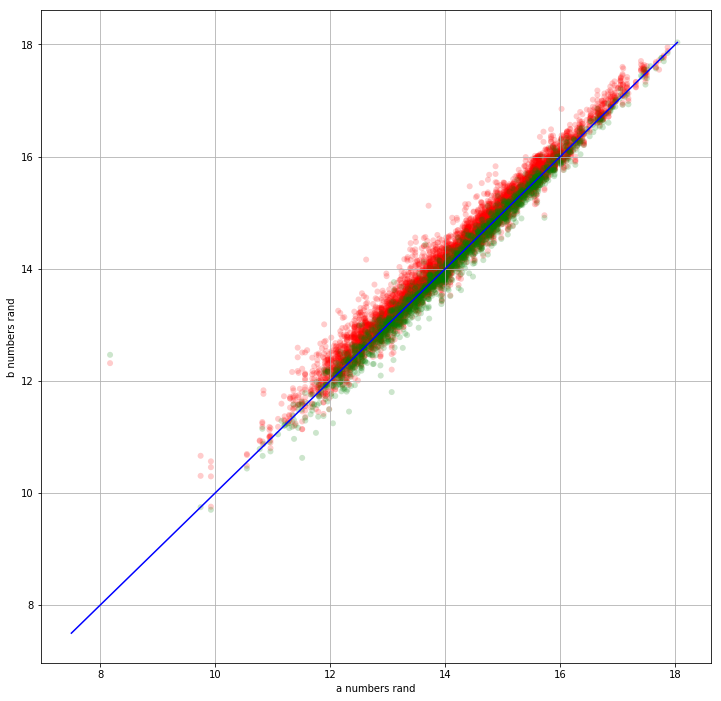

In [24]:
# The most obvious comparison

maximum = max(bidding_info['Engineers Estimate'].max(),
              bidding_info['Bid Total'].max())
minimum = min(bidding_info['Engineers Estimate'].min(),
              bidding_info['Bid Total'].min())


x0 = bidding_info[bidding_info['Awarded'] == 0]['Engineers Estimate']
y0 = bidding_info[bidding_info['Awarded'] == 0]['Bid Total']
x1 = bidding_info[bidding_info['Awarded'] == 1]['Engineers Estimate']
y1 = bidding_info[bidding_info['Awarded'] == 1]['Bid Total']


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)


ax.scatter(np.log(x0), np.log(y0), alpha=0.2, edgecolors='none', c='red')
ax.scatter(np.log(x1), np.log(y1), alpha=0.2, edgecolors='none', c='green')
#ax.scatter(x0, y0, alpha=0.2, edgecolors='none', c='red')
#ax.scatter(x1, y1, alpha=0.2, edgecolors='none', c='green')

#ax.plot([minimum, maximum], [minimum, maximum], c='blue', alpha=1)
ax.plot([7.5, np.log(maximum)], [7.5, np.log(maximum)], c='blue', alpha=1)

ax.grid(True)
ax.set_xlabel('a numbers rand')
ax.set_ylabel('b numbers rand')
plt.style.use('seaborn-bright')

plt.show()

In [25]:
bidding_info[bidding_info['Proposal Number'] == 'C14951']['Difference']

2    691595.32
3    237159.10
4    847967.00
Name: Difference, dtype: float64

In [26]:
string = '$123,345.98'
import locale
mylocale = 'en_US.UTF-8'
locale.setlocale(locale.LC_ALL, mylocale)
conv = locale.localeconv()
raw_numbers = string.strip(conv['currency_symbol'])
print(locale.atof(raw_numbers))

123345.98


In [27]:
list(bidding_info[bidding_info['Proposal Number'] == 'C14951']['Difference'])[0]

691595.32

In [28]:
cont_itm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232809 entries, 0 to 232808
Data columns (total 42 columns):
CONT_ID               232809 non-null object
PRJ_NBR               232809 non-null object
LN_ITM_NBR            232809 non-null int64
ITM_CD                232809 non-null object
LAST_CHNG_YR          232809 non-null int64
UNT_SYS_IND           232809 non-null object
SPC_YR                232809 non-null int64
CATG_NBR              232809 non-null int64
RMRKS_ID              40 non-null object
SUPL_DESC1            32094 non-null object
SUPL_DESC2            1511 non-null object
BID_QTY               232809 non-null float64
UNT_PRIC              232809 non-null float64
STAT_T                232809 non-null object
SPCLTY_ITM_IND        232809 non-null object
MAJ_MINR_ITM_IND      232809 non-null object
CRIT_ITM_IND          3793 non-null object
PAY_PLAN_QTY_IND      3779 non-null object
PRIC_ADJ_T            0 non-null float64
REL_LN_ITM            1039 non-null object
FNL_AMT 

In [29]:
cont_itm[cont_itm['CONT_ID'] == 'C14951'].sort_values(by='ITM_CD')

CONT_ID    PRJ_NBR  LN_ITM_NBR     ITM_CD  LAST_CHNG_YR UNT_SYS_IND  \
71864  C14951  14951-BID           5  202-00090          2002           E   
71865  C14951  14951-BID          10  202-01130          2002           E   
71866  C14951  14951-BID          15  202-01300          2002           E   
73178  C14951  14951-BID          20  203-00010          2002           E   
89833  C14951  14951-BID         170  203-01120          2002           E   
73179  C14951  14951-BID          25  203-01500          2002           E   
73180  C14951  14951-BID          30  203-01597          2002           E   
73181  C14951  14951-BID          35  208-00045          2002           E   
73182  C14951  14951-BID          40  210-00810          2002           E   
89907  C14951  14951-BID         175  210-04025          2002           E   
73262  C14951  14951-BID          45  304-06007          2002           E   
73263  C14951  14951-BID          50  403-00720          2002           E   
73264  C14951  14951-BID          55  606-20000          2002           E   
73265  C14951  14951-BID          60  606-21000          2002           E   
73266  C14951  14951-BID          65  612-00001          2002           E   
73267  C14951  14951-BID          70  612-00041          2002           E   
73268  C14951  14951-BID          75  614-01522          2002           E   
73269  C14951  14951-BID          80  614-01588          2002           E   
73270  C14951  14951-BID          85  625-00000          2002           E   
73271  C14951  14951-BID          90  626-00000          2002           E   
83242  C14951  14951-BID         165  626-00100          2002           E   
89908  C14951  14951-BID         180  626-00100          2002           E   
71882  C14951  14951-BID          95  630-00000          2002           E   
71883  C14951  14951-BID         100  630-00007          2002           E   
71884  C14951  14951-BID         105  630-00012          2002           E   
71885  C14951  14951-BID         110  630-80342          2002           E   
71886  C14951  14951-BID         115  630-80343          2002           E   
71887  C14951  14951-BID         120  630-80358          2002           E   
71888  C14951  14951-BID         125  630-80359          2002           E   
71889  C14951  14951-BID         130  630-80360          2002           E   
71890  C14951  14951-BID         135  630-80380          2002           E   
71891  C14951  14951-BID         140  700-70010          2002           E   
71892  C14951  14951-BID         145  700-70020          2002           E   
71893  C14951  14951-BID         150  700-70022          2002           E   
71894  C14951  14951-BID         155  700-70028          2002           E   
73205  C14951  14951-BID         160  700-70380          2002           E   

       SPC_YR  CATG_NBR RMRKS_ID          SUPL_DESC1 SUPL_DESC2  BID_QTY  \
71864    2002       200      NaN                 NaN        NaN    100.0   
71865    2002       200      NaN                 NaN        NaN    450.0   
71866    2002       200      NaN                 NaN        NaN      6.0   
73178    2002       200      NaN                 NaN        NaN    100.0   
89833    2002       200      NaN                 NaN        NaN      0.0   
73179    2002       200      NaN                 NaN        NaN     20.0   
73180    2002       200      NaN                 NaN        NaN     40.0   
73181    2002       200      NaN                 NaN        NaN      2.0   
73182    2002       200      NaN                 NaN        NaN     10.0   
89907    2002       200      NaN                 NaN        NaN      0.0   
73262    2002       200      NaN                 NaN        NaN   1800.0   
73263    2002       200      NaN                 NaN        NaN     54.0   
73264    2002       200      NaN                 NaN        NaN  35753.0   
73265    2002       200      NaN                 NaN        NaN     46.0   
73266    2002   

In [30]:
cont_itm['LAST_CHNG_YR'].max()

2005

In [63]:
print(cont_itm['CATG_NBR'].unique())

[ 200  400  300  301  500  302  303  201  304  305  306  210  202  203
  380  600  204  208  209  206  207  307  308  309  386  286  280  310
  320  205  680  480  360  325  370  580  581  281  330  340  318  311
  315  316  317  319  321  322  323  282  313  314  365  324  312  341
  369  367  368  366  350  355  335  342  343  326  390  401  381  501
  502  503  504  250  220  582  583  584  287  387  388  389  391  450
  252  253  352  351  251  254  353  240  354  327  451  328  329  331
  332  333  334  336  337  402 1300  345  260  215]


In [64]:
t_itm['ITM_FUNC_CLAS_T'].unique()

array(['615', '202', '203', 'NC', '607', '204', '206', '201', '210',
       '211', '208', '209', '207', '213', '214', '217', '212', '301',
       '303', '215', '304', '216', '403', '411', '409', '405', '406',
       '412', '407', '412R', '310', '307', '504', '420', '501', '410',
       '601', '502', '408', '509', '517', '506', '512', '603', '509P',
       '622', '508', '507', '514', '515', '306', '516', '601N', '518',
       '513', '519', '602', '521', '520', '606', '605', '604', '607S',
       '612', '609', '614', '613L', '608', '613C', '613', '611', '614S',
       '614P', '610', '618', '616', '630', '619', '623', '631', '620',
       '621', '627', '626', '629', '628', '625', '700', '000', nan, '950'],
      dtype=object)

In [32]:
cont_itm[cont_itm['DESC1'] == 'Removal of Delineator']

CONT_ID        PRJ_NBR  LN_ITM_NBR     ITM_CD  LAST_CHNG_YR  \
266            C10592      10592-BID          15  202-00090          1991   
932            C10309      10309-BID           3  202-00090          1991   
1078           C10506      10506-BID          15  202-00090          1994   
1543           C11182      11182-BID          20  202-00090          1994   
2340           C10827      10827-BID          20  202-00090          1991   
4848           C11588      11588-BID          30  202-00090          1994   
5003           C11582      11582-BID          30  202-00090          1999   
5238           C11723      11723-BID          10  202-00090          2002   
5856           C11691      11691-BID           5  202-00090          1991   
6168           C11581      11581-BID          10  202-00090          1999   
7758           C11846      11846-BID          30  202-00090          1991   
8624           C11918      11918-BID          40  202-00090          1994   
9386           C11861      11861-BID          10  202-00090          1999   
10177          C11932      11932-BID          40  202-00090          1991   
12342          C11964      11964-BID          40  202-00090          1998   
13649          C12017      12017-BID          20  202-00090          1994   
14300          C12018      12018-BID          10  202-00090          1998   
15290          C12153      12153-BID          20  202-00090          1998   
15847          C12124      12124-BID          20  202-00090          1999   
17308          C12278      12278-BID          25  202-00090          1998   
17546          C12211      12211-BID          35  202-00090          1994   
18594          C12280      12280-BID          10  202-00090          1994   
18920          C12319      12319-BID          25  202-00090          1999   
20126          C12306      12306-BID          10  202-00090          1999   
20499          C12393      12393-BID           5  202-00090          1999   
20713          C12395      12395-BID          10  202-00090          2002   
20742          C12487      12487-BID          15  202-00090          1999   
21660          C12379      12379-BID          25  202-00090          1999   
21793          C12359      12359-BID          15  202-00090          1994   
22142          C12482      12482-BID          20  202-00090          1991   
22274          C12414      12414-BID          25  202-00090          1999   
23250          C12460      12460-BID          20  202-00090          2002   
23525          C12394      12394-BID          10  202-00090          1999   
26474          C12548      12548-BID          20  202-00090          1999   
28154          C12609      12609-BID          20  202-00090          1999   
28503          C12797      12797-BID          25  202-00090          2002   
29099          C12685      12685-BID          25  202-00090          1999   
29121         C12793R     12793R-BID          20  202-00090          1999   
29944          C12606      12606-BID          15  202-00090          2002   
29952          C12778      12778-BID          15  202-00090          1999   
29974          C12762      12762-BID          20  202-00090          1999   
30008          C12794      12794-BID          25  202-00090          2002   
30238         C12800R     12800R-BID          20  202-00090          2002   
30452          C12801      12801-BID           5  202-00090          1999   
30529          C12803      12803-BID          35  202-00090          2002   
30891          C12829      12829-BID          10  202-00090          1999   
31152          C12834      12834-BID          15  202-00090          2002   
31665          C12858      12858-BID          20  202-00090          1998   
32622          C12966      12966-BID          10  202-00090          2002   
33108          C12851      12851-BID          45  202-00090          1998   
33191          C12963      12963-BID          40  202-00090          1999   
33305     

In [33]:
cont_itm['DESC1'].unique().size

9200

In [35]:
change_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6633 entries, 0 to 6632
Data columns (total 11 columns):
Vendor             6633 non-null object
Bid Amount         6633 non-null object
CONT_ID            6633 non-null object
LEV2_OFFICE_NBR    6633 non-null int64
DESC1              6633 non-null object
C_O_NBR            6633 non-null int64
CD_DESC            6633 non-null object
APPR_DT            6633 non-null int64
C_O_AMT            6633 non-null object
CHNG_DESC          6633 non-null object
C_O_T              6633 non-null object
dtypes: int64(3), object(8)
memory usage: 570.1+ KB


In [36]:
change_orders.CONT_ID.unique().size

987

In [37]:
bidding_info[(bidding_info['Proposal Number'].isin(change_orders['CONT_ID'].unique())) & (bidding_info['Awarded'])]

Vendor Number Proposal Number  \
1870           099H          C12623   
1879           703A          C13385   
1894           884A          C14811   
2006           169A    C14551RA-ALT   
2360           028B          C15746   
2669           090A          C13192   
2674           099H      C14959-ALT   
2879           099H      C13141-ALT   
3029           777A          C15676   
3039           801A         C16035R   
3097          1275A          C16416   
3128           870A          C13590   
3196           028B          C16222   
3300           668A         C16421R   
3304           005A          C16446   
3483          1275A          C15069   
3497           870A         C16042A   
3526           164A          C15555   
3537           147A          C15666   
3705           854A          C15504   
3761          1275A          C13808   
3809           232A         C15564S   
3903          S3913          C15049   
4043           005A          C15950   
4055           169A          C16025   
4215           884A          C15915   
4249           028B          C16522   
4263           409A          C16690   
4290           854A          C16214   
4296           701A          C16596   
4420           032A          C17255   
4472           870A          C17248   
4487           801A          C15575   
4492           884A          C16170   
4520          1275A          C17249   
4536           801A          C16068   
4538          1275A          C16819   
4554           450A          C17014   
4583           720A          C17214   
4590           163A          C15511   
4594           547A         C16909R   
4611          1275A          C17256   
4621           163A          C16386   
4654           450A          C17070   
4659           360A          C17115   
4679           547A          C17243   
4717           279A          C17187   
4723           696A          C17198   
4732           169A          C17261   
4736           043A          C17031   
4742          1098A          C17117   
4748           028B          C17167   
4764           697A          C17100   
4766           090A          C17169   
4773           091A          C17174   
4786           870A          C15548   
4793           697A          C16625   
4801          1275A          C17110   
4815           870A          C17245   
4824           055A          C16982   
4837           697A          C17332   
4839          1098A          C16941   
4851           159C          C17072   
4868           701A          C16967   
4876          S3913          C17304   
4884          1050A          C15901   
4890           697A          C16762   
4896           795A          C17265   
4906           854A          C14976   
4913           968A          C15491   
4925           870A          C17269   
4940          1086A          C16555   
4964          S2881          C17407   
4968          S3452          C17048   
4990          S3913          C17271   
5002          S3913          C16493   
5011           547A          C17109   
5026           173A          C17253   
5057           055A      C14089-ALT   
5063           447A          C17195   
5065           232A          C16689   
5075           692A          C16737   
5080           905A          C16807   
5089           854A          C17024   
5118          1039B          C16273   
5127           884A          C12854   
5140           696A          C16390   
5158           116B          C17242   
5163           696A          C17416   
5170           232A          C17172   
5177           192B          C17010   
5183           884A          C17395   
5187           017A          C15827   
5206           091A          C17452   
5214           061A          C17550   
5218           503F          C17121   
5224          1231A          C17366   
5241           696A          C17170   
5256           110E          C17208   
5261           232A          C17303   
5288           547C          C17282   
5304          S4792         

In [38]:
bidding_info[(bidding_info['Proposal Number'].isin(change_orders['CONT_ID'].unique())) & (bidding_info['Awarded'])]['Proposal Number'].unique().size

966

In [54]:
bidding_info[bidding_info['Proposal Number'] == 'C18842']

Vendor Number Proposal Number                Vendor Name   Bid Total  \
8537          695A          C18842  KIEWIT INFRASTRUCTURE CO.  51700000.0   

      Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
8537          51700000.0         0.0                              0.00%   

      Awarded Letting Date  
8537      1.0     3/5/2013

In [41]:
# Converting all fo the $ amount columns into numbers in
# change_orders  - in place
conv['currency_symbol']
columns_to_convert = ['C_O_AMT']
for col in columns_to_convert:
    tmp = change_orders[col]
    change_orders[col] = tmp.map(dollar_val, na_action='ignore')



In [42]:
change_orders.head()

Vendor      Bid Amount CONT_ID  LEV2_OFFICE_NBR  \
0  CONCRETE EXPRESS, INC.  $17,034,895.69  C11873                4   
1  CONCRETE EXPRESS, INC.  $17,034,895.69  C11873                4   
2  CONCRETE EXPRESS, INC.  $17,034,895.69  C11873                4   
3  CONCRETE EXPRESS, INC.  $17,034,895.69  C11873                4   
4  CONCRETE EXPRESS, INC.  $17,034,895.69  C11873                4   

                           DESC1  C_O_NBR  \
0  CHERRYVALE RD. TO N. 75TH ST.        7   
1  CHERRYVALE RD. TO N. 75TH ST.        8   
2  CHERRYVALE RD. TO N. 75TH ST.        9   
3  CHERRYVALE RD. TO N. 75TH ST.       10   
4  CHERRYVALE RD. TO N. 75TH ST.       11   

                                  CD_DESC   APPR_DT   C_O_AMT  \
0  Modifications With No CMO/MCR Required  20120606   4300.00   
1  Modifications With No CMO/MCR Required  20120607   3000.00   
2  Modifications With No CMO/MCR Required  20120607    500.00   
3  Modifications With No CMO/MCR Required  20120606  10079.59   
4  Modifications With No CMO/MCR Required  20120607   3000.00   

               CHNG_DESC C_O_T  
0        Added field lab    00  
1    FA for Century Link    00  
2      FA for Tetra Tech    00  
3  FA Trench Box Invoice    00  
4           F/A Xcel Gas    00

In [53]:
diff = pd.DataFrame(change_orders.groupby('CONT_ID')['C_O_AMT'].sum()).sort_values('C_O_AMT', ascending=False)
diff

C_O_AMT
CONT_ID                  
C18842        14672577.96
C18695        13901374.15
C19029        13578024.87
C19205-COMBO   8803481.76
C17083         8122707.21
C17783-ALT     7234678.78
C19282         6770168.54
C19626         6690293.85
C20085         6440360.69
C18149         6131554.52
C21325         6067771.00
C20068         5557419.92
C17170         5542295.41
C18158-COMBO   5361125.43
C19984-COMBO   4717675.19
C18889         4709849.16
C19458         4627607.79
C18242         4478615.84
C16259-ALT     4350145.47
C19036         4345148.43
C18789R        3997636.12
C19500S        3697493.08
C19669         3627032.00
C17018         3569983.52
C19192         3404649.58
C19202         3388890.67
C19910         3257435.05
C17757         3223166.86
C20575         3134659.25
C15790A        3105211.65
C17256         2964825.01
C21425         2838423.32
C18603         2769216.46
C15402         2712811.28
C16357         2654480.62
C16417         2623098.09
C15339         2493591.43
C18247         2469130.59
C16212         2456000.00
C20778         2339384.73
C17766         2331919.20
C16639         2256037.83
C17746         2252214.86
C20146         2232115.15
C16679         2230225.96
C17866         2163525.14
C17988         2162830.47
C19677         2102431.19
C16657         2096739.05
C19019         2071068.91
C17136R-ALT    2064099.20
C19358         2058735.76
C19171R        2023052.39
C18095-ALT     2013979.25
C13141-ALT     2000685.05
C15835         1976708.56
C19314         1968239.94
C20307         1968133.43
C18908-COMBO   1943373.65
C19557         1902114.85
C11873         1901228.28
C19735R        1817909.56
C19879         1813839.66
C18732         1755371.42
C16042A        1744532.94
C17864         1735539.44
C18316         1715887.60
C16650         1715743.75
C17846         1682450.00
C18465         1672172.64
C21267         1654035.81
C19462         1650500.00
C19228         1642482.79
C16664         1638614.65
C19339-COMBO   1638404.00
C17318         1619372.21
C15898         1604718.70
C16262         1602915.65
C19275         1602003.00
C20903         1564309.00
C19478A        1553468.77
C17679-ALT     1534677.34
C18727         1532964.17
C19751         1524201.10
C18414         1497973.61
C20365         1493699.20
C17826         1482950.00
C17357         1481863.36
C19014         1478814.00
C20549         1477370.12
C18797         1459056.47
C17280         1457408.26
C18147         1441832.06
C18070         1436875.50
C17813         1422925.10
C18449         1394460.00
C16602         1380312.13
C17765         1369515.49
C18556         1363511.00
C18530         1363340.00
C17860         1347206.56
C17987         1346908.66
C17583         1335873.09
C17847         1330463.74
C17138-ALT     1324582.86
C19107         1310533.30
C17635         1298282.67
C18955R        1293384.99
C18821         1289516.46
C18082         1288724.56
C17788         1280450.72
C17718         1280029.51
C19128         1275695.92
C20514         1272769.77
C17537         1272149.90
C19671         1262072.40
C18154         1243909.39
C18456         1236010.35
C15827         1234664.70
C17665         1229605.24
C18284         1220552.20
C14551RA-ALT   1204303.42
C19710         1202100.91
C19399R        1198800.00
C17622         1194332.57
C19341         1188313.41
C19185         1183560.00
C20583         1177611.05
C19411         1174969.10
C18081         1163013.71
C17282         1140923.16
C18333R        1140322.93
C15042         1138080.02
C17391         1137606.37
C17303         1128960.30
C19015         1127831.04
C18159R        1123298.48
C17890         1116844.00
C16696         1116042.78
C17113         1111168.35
C17825         1098467.00
C17617A        1096160.48
C15666         1086743.00
C19705         1077419.00
C20168         1072958.73
C17818         1065744.31
C17184         1059878.71
C17964R        1056885.00
C19303         1054397.20
C18220         1047314.52
C18264         1034437.03
C19633         1033700.00
C16376        

In [45]:
type(diff)

pandas.core.series.Series

In [21]:
project_dates[project_dates['Contract ID'] == 'C11873']

Contract ID  Bid Days  Time Type  Start Date  Accepted Date  Days Charged
1626      C11873       431  WORK DAYS    20111205       20150417           462

In [20]:
bidding_info[bidding_info['Proposal Number'] == 'C11873']

Vendor Number Proposal Number  \
7202          232A          C11873   
7203          011A          C11873   
7204          865A          C11873   
7205          065A          C11873   
7206          585A          C11873   
7207          870A          C11873   
7208          801A          C11873   

                                            Vendor Name       Bid Total  \
7202  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $17,756,068.60   
7203                     AMES CONSTRUCTION INCORPORATED  $17,641,300.00   
7204                             CONCRETE EXPRESS, INC.  $17,034,895.69   
7205            CONCRETE WORKS OF COLORADO INCORPORATED  $17,592,200.52   
7206                R.E. MONKS CONSTRUCTION COMPANY LLC  $19,346,156.95   
7207                            SEMA CONSTRUCTION, INC.  $19,537,303.00   
7208                              ZAK DIRT INCORPORATED  $17,303,850.74   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
7202     $17,101,039.00    $655,029.60                              3.83%   
7203     $17,101,039.00    $540,261.00                              3.16%   
7204     $17,101,039.00    -$66,143.31                             -0.39%   
7205     $17,101,039.00    $491,161.52                              2.87%   
7206     $17,101,039.00  $2,245,117.95                             13.13%   
7207     $17,101,039.00  $2,436,264.00                             14.25%   
7208     $17,101,039.00    $202,811.74                              1.19%   

      Awarded Letting Date  
7202      0.0   10/27/2011  
7203      0.0   10/27/2011  
7204      1.0   10/27/2011  
7205      0.0   10/27/2011  
7206      0.0   10/27/2011  
7207      0.0   10/27/2011  
7208      0.0   10/27/2011

```python
# Calculate and rename aggregations
all_together = (df.groupby(['start_station_name','end_station_name'])
                  .agg({'trip_duration_seconds': [np.size, np.mean, np.min, np.max]})
                  .rename(columns={'size': 'num_trips', 'mean': 'avg_duration_seconds', 'amin': 'min_duration_seconds', 'amax': 'max_duration_seconds'}))
```


In [ ]:
test = (bidding_info.groupby('Proposal Number').agg(['min', 'max', 'mean'])

In [50]:
#max_duration_seconds = df.groupby(['start_station_name','end_station_name'])['trip_duration_seconds'].max(
max_bid = bidding_info.groupby('Proposal Number')

In [51]:
type(max_bid)

pandas.core.groupby.DataFrameGroupBy

In [57]:
t =pd.DataFrame(bidding_info.groupby('Proposal Number').describe())

In [64]:
agg_funcs = dict(Size='size', Sum='sum', Mean='mean', Std='std')
bidding_info.set_index(['Proposal Number'])


KeyError: 'Awarded, count'

In [55]:
max_bid.agg([{'Bid Total': [np.size, np.mean, np.min, np.max]},
             {'Engineers Estimate': [np.size, np.mean, np.min, np.max]}])

/opt/Anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby.py:3198: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


SpecificationError: Function names must be unique, found multiple named None

C11725
     Vendor Number Proposal Number                    Vendor Name  \
1947          099H          C11725   FLATIRON CONSTRUCTORS,  INC.   
1948          884A          C11725     HAMON INFRASTRUCTURE, INC.   
1949          169A          C11725  LAWRENCE CONSTRUCTION COMPANY   
1950         1086A          C11725               STRUCTURES, INC.   
1951          801A          C11725          ZAK DIRT INCORPORATED   

          Bid Total Engineers Estimate   Difference  \
1947  $4,820,401.38      $4,162,315.40  $658,085.98   
1948  $4,291,121.42      $4,162,315.40  $128,806.02   
1949  $4,825,830.35      $4,162,315.40  $663,514.95   
1950  $4,465,799.21      $4,162,315.40  $303,483.81   
1951  $4,480,100.00      $4,162,315.40  $317,784.60   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1947                             15.81%      0.0    8/31/2006  
1948                              3.09%      1.0    8/31/2006  
1949                             15.94%      0.0    8/3

5134      0.0    9/24/2009  
C12854 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5135           NaN  C12854 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5135  $582,563.61                             33.28%      NaN          NaN  
C13003
    Vendor Number Proposal Number                           Vendor Name  \
442          164A          C13003  EDWARD KRAEMER AND SONS INCORPORATED   
443          159C          C13003                    KIEWIT WESTERN CO.   
444          169A          C13003         LAWRENCE CONSTRUCTION COMPANY   
445          870A          C13003               SEMA CONSTRUCTION, INC.   

          Bid Total Engineers Estimate     Difference  \
442  $12,035,000.00     $11,477,207.47    $557,792.53   
443  $11,874,901.50     $11,477,207.47    $397,694.03   
444  $12,585,900.49     $11,477,207.47  $1,108,693.02   
445  $11,925,925.00     $11,477,

618  $954,695.51                             18.91%      NaN          NaN  
C13224C
    Vendor Number Proposal Number                      Vendor Name  \
619          159C         C13224C               KIEWIT WESTERN CO.   
620          692A         C13224C  NEW DESIGN CONSTRUCTION COMPANY   

         Bid Total Engineers Estimate     Difference  \
619  $5,997,837.55      $4,981,168.20  $1,016,669.35   
620  $5,769,474.03      $4,981,168.20    $788,305.83   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
619                             20.41%      0.0    6/16/2005  
620                             15.83%      0.0    6/16/2005  
C13224C Average
    Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
621           NaN  C13224C Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
621  $902,487.59                             18.12%      NaN          NaN  
C13224R
    Vendor N

92                             24.26%      0.0    2/17/2005  
C13506R Average
   Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
93           NaN  C13506R Average         NaN       NaN                NaN   

     Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
93  $496,433.06                             17.73%      NaN          NaN  
C13579-ALT
     Vendor Number Proposal Number                           Vendor Name  \
1913          164A      C13579-ALT  EDWARD KRAEMER AND SONS INCORPORATED   
1914          696A      C13579-ALT           JALISCO INTERNATIONAL, INC.   
1915          169A      C13579-ALT         LAWRENCE CONSTRUCTION COMPANY   
1916          870A      C13579-ALT               SEMA CONSTRUCTION, INC.   

           Bid Total Engineers Estimate     Difference  \
1913  $14,731,461.60     $12,943,881.60  $1,787,580.00   
1914  $15,246,790.35     $12,943,881.60  $2,302,908.75   
1915  $16,597,716.95     $12,943,881.60  $3,653,8

0      0.0    1/20/2005  
C13970R-ALT A Average
  Vendor Number        Proposal Number Vendor Name Bid Total  \
1           NaN  C13970R-ALT A Average         NaN       NaN   

  Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
1                NaN  $1,425,445.17                             14.71%   

   Awarded Letting Date  
1      NaN          NaN  
C13970T-ALT A
    Vendor Number Proposal Number         Vendor Name       Bid Total  \
342          159C   C13970T-ALT A  KIEWIT WESTERN CO.  $11,334,604.05   

    Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
342     $11,625,035.56  -$290,431.51                             -2.50%   

     Awarded Letting Date  
342      1.0     4/7/2005  
C13970T-ALT A Average
    Vendor Number        Proposal Number Vendor Name Bid Total  \
343           NaN  C13970T-ALT A Average         NaN       NaN   

    Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
343                NaN  

    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
698           NaN  C14214 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
698  $1,390,303.10                             22.96%      NaN          NaN  
C14214R
    Vendor Number Proposal Number  \
875          232A         C14214R   
876          174A         C14214R   
877          084A         C14214R   

                                           Vendor Name      Bid Total  \
875  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $7,628,965.00   
876                     CONNELL RESOURCES INCORPORATED  $5,628,548.15   
877                  DUCKELS CONSTRUCTION INCORPORATED  $6,931,002.71   

    Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
875      $6,018,821.35  $1,610,143.65                             26.75%   
876      $6,018,821.35   -$390,273.20                             -6.48%   
877      

     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
1376           NaN  C14347R Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1376  $260,640.37                             10.64%      NaN          NaN  
C14368
     Vendor Number Proposal Number                              Vendor Name  \
1953          028B          C14368         AGGREGATE INDUSTRIES - WCR, INC.   
1954          071A          C14368  COULSON EXCAVATING COMPANY INCORPORATED   
1955          954A          C14368                   DURAN EXCAVATING, INC.   
1956         1055A          C14368                  J-2 CONTRACTING COMPANY   
1957          696A          C14368              JALISCO INTERNATIONAL, INC.   
1958          159C          C14368                       KIEWIT WESTERN CO.   
1959          360A          C14368              MOUNTAIN CONSTRUCTORS, INC.   
1960          801A          C14368            

    Vendor Number Proposal Number  \
699          232A          C14527   
700          692A          C14527   

                                           Vendor Name      Bid Total  \
699  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,227,133.00   
700                    NEW DESIGN CONSTRUCTION COMPANY  $1,264,783.40   

    Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
699      $1,061,643.00  $165,490.00                             15.59%   
700      $1,061,643.00  $203,140.40                             19.13%   

     Awarded Letting Date  
699      0.0    7/14/2005  
700      0.0    7/14/2005  
C14527 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
701           NaN  C14527 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
701  $184,315.20                             17.36%      NaN          NaN  
C14527R
    Vendor Number Proposal Nu

2456      0.0    2/22/2007  
C14557 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2457           NaN  C14557 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2457  $898,398.16                             11.04%      NaN          NaN  
C14584
    Vendor Number Proposal Number  \
918          232A          C14584   
919          011A          C14584   
920          865A          C14584   
921          164A          C14584   
922          870A          C14584   
923         1086A          C14584   
924          801A          C14584   

                                           Vendor Name      Bid Total  \
918  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $2,386,383.20   
919                     AMES CONSTRUCTION INCORPORATED  $2,116,200.00   
920                             CONCRETE EXPRESS, INC.  $2,748,730.74   
921               EDWARD KRAEMER AND SONS INCOR

    Vendor Number Proposal Number                    Vendor Name  \
98           017A          C14623             ASPHALT PAVING CO.   
99           924A          C14623  ASPHALT SPECIALTIES CO., INC.   
100          159C          C14623             KIEWIT WESTERN CO.   
101          163A          C14623     LAFARGE NORTH AMERICA INC.   
102         S2881          C14623           PREMIER PAVING, INC.   

         Bid Total Engineers Estimate   Difference  \
98   $1,746,398.10      $1,643,945.50  $102,452.60   
99   $1,851,965.90      $1,643,945.50  $208,020.40   
100  $2,116,687.50      $1,643,945.50  $472,742.00   
101  $1,836,278.42      $1,643,945.50  $192,332.92   
102  $1,919,466.70      $1,643,945.50  $275,521.20   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
98                               6.23%      1.0    2/17/2005  
99                              12.65%      0.0    2/17/2005  
100                             28.76%      0.0    2/17/2005  
101           

645  $82,804.80                             25.03%      NaN          NaN  
C14683B
    Vendor Number Proposal Number                      Vendor Name  \
646          692A         C14683B  NEW DESIGN CONSTRUCTION COMPANY   
647          903A         C14683B           TLM CONSTRUCTORS, INC.   

       Bid Total Engineers Estimate   Difference  \
646  $432,189.35        $285,565.45  $146,623.90   
647  $343,300.81        $285,565.45   $57,735.36   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
646                             51.35%      0.0    6/23/2005  
647                             20.22%      0.0    6/23/2005  
C14683B Average
    Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
648           NaN  C14683B Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
648  $102,179.63                             35.78%      NaN          NaN  
C14683C
    Vendor Number Proposa

    Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
548           NaN  C14783R Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
548  $190,418.33                             36.60%      NaN          NaN  
C14787
   Vendor Number Proposal Number                             Vendor Name  \
49          005A          C14787                A and S CONSTRUCTION CO.   
50          027A          C14787  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
51          163A          C14787              LAFARGE NORTH AMERICA INC.   

        Bid Total Engineers Estimate   Difference  \
49  $1,963,115.75      $1,801,346.15  $161,769.60   
50  $1,888,843.16      $1,801,346.15   $87,497.01   
51  $1,922,884.80      $1,801,346.15  $121,538.65   

   Percentage Bid Total Over Estimate  Awarded Letting Date  
49                              8.98%      0.0     2/3/2005  
50                              4.86%   

C14863 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1249           NaN  C14863 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1249  -$1,198,579.89                              2.94%      NaN          NaN  
C14890
     Vendor Number Proposal Number                           Vendor Name  \
1846          011A          C14890        AMES CONSTRUCTION INCORPORATED   
1847          164A          C14890  EDWARD KRAEMER AND SONS INCORPORATED   
1848          884A          C14890            HAMON INFRASTRUCTURE, INC.   
1849          169A          C14890         LAWRENCE CONSTRUCTION COMPANY   
1850          870A          C14890               SEMA CONSTRUCTION, INC.   

          Bid Total Engineers Estimate    Difference  \
1846  $5,117,945.00      $5,539,270.50  -$421,325.50   
1847  $5,566,907.50      $5,539,270.50    $27,637.00   
1848  $5,328,771.25      $5,539,27

766                             22.90%      0.0    8/11/2005  
C14942 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
767           NaN  C14942 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
767  $2,292,623.44                             29.35%      NaN          NaN  
C14942R
     Vendor Number Proposal Number                     Vendor Name  \
1174          011A         C14942R  AMES CONSTRUCTION INCORPORATED   
1175          865A         C14942R          CONCRETE EXPRESS, INC.   
1176          159C         C14942R              KIEWIT WESTERN CO.   
1177          169A         C14942R   LAWRENCE CONSTRUCTION COMPANY   
1178          870A         C14942R         SEMA CONSTRUCTION, INC.   

          Bid Total Engineers Estimate      Difference  \
1174  $8,626,000.00      $9,065,725.00    -$439,725.00   
1175  $9,518,632.65      $9,065,725.00     $452,907.65   
1176  

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1037           NaN  C14981 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1037  -$24,284.89                            -10.56%      NaN          NaN  
C14986
     Vendor Number Proposal Number  \
1680          924A          C14986   
1681          150B          C14986   
1682          090A          C14986   
1683         1021A          C14986   
1684          854A          C14986   
1685          692A          C14986   
1686          930A          C14986   
1687          329A          C14986   

                                          Vendor Name       Bid Total  \
1680                    ASPHALT SPECIALTIES CO., INC.             NaN   
1681                      CASTLE ROCK CONSTRUCTION CO             NaN   
1682                  INTERSTATE HIGHWAY CONSTRUCTION  $12,126,873.38   
1683                        KOSS CONSTRUCTION

247                             40.90%      1.0    3/17/2005  
C15028B Average
    Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
248           NaN  C15028B Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
248  $752,783.05                             50.30%      NaN          NaN  
C15028R
    Vendor Number Proposal Number  \
515          232A         C15028R   
516          940A         C15028R   
517         1068A         C15028R   

                                           Vendor Name      Bid Total  \
515  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,797,383.69   
516                MULTIPLE CONCRETE ENTERPRISES, INC.  $1,935,735.70   
517                                    PENHALL COMPANY  $1,863,079.50   

    Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
515      $2,110,550.75  -$313,167.06                            -14.84%   
516      $

965  -$221,796.01                             -5.63%      NaN          NaN  
C15052
     Vendor Number Proposal Number  \
4683          232A          C15052   
4684         1282A          C15052   
4685          968A          C15052   
4686         1358A          C15052   
4687          865A          C15052   
4688          173A          C15052   
4689          503F          C15052   
4690          107C          C15052   
4691          953A          C15052   
4692          692A          C15052   
4693         1086A          C15052   
4694          279A          C15052   
4695          055A          C15052   

                                            Vendor Name    Bid Total  \
4683  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $881,195.00   
4684                    AMERICAN WEST CONSTRUCTION, LLC  $731,761.00   
4685                        COLORADO CONSTRUCTORS, INC.  $725,407.00   
4686                     COLUMBINE HILLS CONCRETE, INC.  $523,799.56   
4687                   

1008  -$791,940.27                             -3.29%      NaN          NaN  
C15067A
     Vendor Number Proposal Number                     Vendor Name  \
1289          091A         C15067A  ELAM CONSTRUCTION INCORPORATED   
1290          159C         C15067A              KIEWIT WESTERN CO.   

          Bid Total Engineers Estimate     Difference  \
1289  $4,794,523.30      $3,768,543.68  $1,025,979.62   
1290  $4,245,564.20      $3,768,543.68    $477,020.52   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1289                             27.22%      0.0     3/2/2006  
1290                             12.66%      0.0     3/2/2006  
C15067A Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
1291           NaN  C15067A Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1291  $751,500.07                             19.94%      NaN          NaN  
C15067B


660  -$170,108.88                             16.59%      NaN          NaN  
C15074
    Vendor Number Proposal Number  \
120         1098A          C15074   
121         1095A          C15074   
122         1235A          C15074   
123          503F          C15074   
124          720A          C15074   
125          697A          C15074   

                                           Vendor Name    Bid Total  \
120                               DKS ENTERPRISES INC.  $449,882.50   
121  DOUBLE E, INC. DBA ELECTRICAL EXCELLENCE ENTER...  $563,208.22   
122                          INTEGRATED ELECTRIC, INC.  $476,322.80   
123                     K.E.C.I. COLORADO INCORPORATED  $503,246.00   
124                    STURGEON ELECTRIC COMPANY, INC.  $458,220.20   
125                             W.L. CONTRACTORS, INC.  $455,928.25   

    Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
120        $434,405.00   $15,477.50                              3.56%   
121       

     Vendor Number Proposal Number                    Vendor Name  \
1602          435A          C15107  G.A. WESTERN CONSTRUCTION CO.   

          Bid Total Engineers Estimate   Difference  \
1602  $1,375,103.72      $1,136,312.50  $238,791.22   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1602                             21.01%      0.0     5/4/2006  
C15107 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1603           NaN  C15107 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1603  $238,791.22                             21.01%      NaN          NaN  
C15107R
     Vendor Number Proposal Number                    Vendor Name  \
1739          435A         C15107R  G.A. WESTERN CONSTRUCTION CO.   

          Bid Total Engineers Estimate   Difference  \
1739  $1,373,363.18      $1,420,828.60  -$47,465.42   

     Percentage Bid Total Over Estim

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1052           NaN  C15137 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1052  -$905,120.16                             12.89%      NaN          NaN  
C15139
    Vendor Number Proposal Number                      Vendor Name  \
661          865A          C15139           CONCRETE EXPRESS, INC.   
662          090A          C15139  INTERSTATE HIGHWAY CONSTRUCTION   
663          854A          C15139          LAWSON CONSTRUCTION CO.   
664          870A          C15139          SEMA CONSTRUCTION, INC.   

         Bid Total Engineers Estimate     Difference  \
661  $8,527,454.83      $6,172,334.20  $2,355,120.63   
662  $7,247,389.13      $6,172,334.20  $1,075,054.93   
663  $6,911,464.34      $6,172,334.20    $739,130.14   
664  $7,057,634.70      $6,172,334.20    $885,300.50   

    Percentage Bid Total Over Estimate  Awarde

2702  $110,071.55                              1.71%      NaN          NaN  
C15148
     Vendor Number Proposal Number  \
1295          668A          C15148   
1296          159C          C15148   
1297          163A          C15148   
1298          701A          C15148   

                                            Vendor Name      Bid Total  \
1295  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $1,395,084.77   
1296                                 KIEWIT WESTERN CO.  $1,488,407.50   
1297                         LAFARGE NORTH AMERICA INC.  $1,636,788.93   
1298         ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $1,403,347.30   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
1295      $1,088,469.95  $306,614.82                             28.17%   
1296      $1,088,469.95  $399,937.55                             36.74%   
1297      $1,088,469.95  $548,318.98                             50.38%   
1298      $1,088,469.95  $314,877.35                  

273                              0.00%      0.0    3/17/2005  
C15158 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
274           NaN  C15158 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
274  -$1,988,171.66                             -2.46%      NaN          NaN  
C15159
     Vendor Number Proposal Number  \
1300          005A          C15159   
1301          017A          C15159   
1302          073A          C15159   
1303          159C          C15159   
1304          163A          C15159   

                                            Vendor Name      Bid Total  \
1300                           A and S CONSTRUCTION CO.  $8,267,002.50   
1301                                 ASPHALT PAVING CO.  $8,186,687.46   
1302  FISHER SAND & GRAVEL CO.  dba SOUTHWEST ASPHAL...  $7,864,907.23   
1303                                 KIEWIT WESTERN CO.  $9,453,622.90   
1

    Vendor Number Proposal Number                           Vendor Name  \
719          164A          C15174  EDWARD KRAEMER AND SONS INCORPORATED   

         Bid Total Engineers Estimate   Difference  \
719  $2,695,299.00      $2,322,599.00  $372,700.00   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
719                             16.05%      1.0    7/28/2005  
C15174 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
720           NaN  C15174 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
720  $372,700.00                             16.05%      NaN          NaN  
C15174R
     Vendor Number Proposal Number  \
1090          232A         C15174R   
1091          164A         C15174R   
1092          099H         C15174R   
1093          159C         C15174R   
1094          169A         C15174R   

                                            Vendor Na

555    5/19/2005  
C15199 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
556           NaN  C15199 Average         NaN       NaN                NaN   

    Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
556  $5,616.83                             11.76%      NaN          NaN  
C15200
    Vendor Number Proposal Number                              Vendor Name  \
327          028B          C15200         AGGREGATE INDUSTRIES - WCR, INC.   
328          017A          C15200                       ASPHALT PAVING CO.   
329          924A          C15200            ASPHALT SPECIALTIES CO., INC.   
330          032A          C15200             BRANNAN SAND AND GRAVEL, LLC   
331          174A          C15200           CONNELL RESOURCES INCORPORATED   
332          071A          C15200  COULSON EXCAVATING COMPANY INCORPORATED   
333          163A          C15200               LAFARGE NORTH AMERICA INC.   
334         S2881          C15

634      0.0    6/16/2005  
C15204RB Average
    Vendor Number   Proposal Number Vendor Name Bid Total Engineers Estimate  \
635           NaN  C15204RB Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
635  -$65,789.55                            -13.30%      NaN          NaN  
C15205
    Vendor Number Proposal Number                  Vendor Name      Bid Total  \
505          696A          C15205  JALISCO INTERNATIONAL, INC.  $1,795,095.84   

    Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
505      $1,619,673.00  $175,422.84                             10.83%   

     Awarded Letting Date  
505      0.0     5/5/2005  
C15205 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
506           NaN  C15205 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
506  $175,422.84   

572  $3,757.15                              0.58%      NaN          NaN  
C15229
    Vendor Number Proposal Number  \
988          807A          C15229   
989          621A          C15229   
990          110E          C15229   
991          160A          C15229   
992          547C          C15229   
993          547A          C15229   
994          903A          C15229   

                                           Vendor Name    Bid Total  \
988                  ASPHALT CONSTRUCTORS INCORPORATED  $486,239.55   
989         GMCO LIMITED LIABILITY COMPANY OF COLORADO  $456,347.65   
990                    INTERMOUNTAIN SLURRY SEAL, INC.          NaN   
991                    KIRKLAND CONSTRUCTION, L.L.L.P.  $460,155.14   
992  OLDCASTLE SW GROUP INC. dba FOUR CORNER MATERIALS          NaN   
993  OLDCASTLE SW GROUP, INC. dba UNITED COMPANIES ...  $368,801.18   
994                             TLM CONSTRUCTORS, INC.          NaN   

    Engineers Estimate    Difference Percentage Bid T

3166  -$37,339.22                             -7.17%      NaN          NaN  
C15288
     Vendor Number Proposal Number                     Vendor Name  \
2080          503F          C15288  K.E.C.I. COLORADO INCORPORATED   

        Bid Total Engineers Estimate    Difference  \
2080  $466,700.50        $595,860.00  -$129,159.50   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2080                            -21.68%      1.0   10/19/2006  
C15288 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2081           NaN  C15288 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2081  -$129,159.50                            -21.68%      NaN          NaN  
C15289
    Vendor Number Proposal Number                      Vendor Name  \
856          674A          C15289   KAESS CONTRACTING INCORPORATED   
857          279A          C15289  TEZAK HEAVY EQUIPMENT CO.,

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2385           NaN  C15326 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2385  -$25,666.55                             -6.91%      NaN          NaN  
C15338
     Vendor Number Proposal Number                               Vendor Name  \
2061          023A          C15338  CANYON VALLEY ELECTRIC A DIVISION OF TIC   
2062         1098A          C15338                      DKS ENTERPRISES INC.   
2063         1384A          C15338    INFRASOURCE UNDERGROUND  SERVICES, INC   
2064          913A          C15338   INTERSTATE ELECTRICAL CONTRACTORS, INC.   
2065          908A          C15338                    POWER ELECTRIC COMPANY   
2066          720A          C15338           STURGEON ELECTRIC COMPANY, INC.   
2067          697A          C15338                    W.L. CONTRACTORS, INC.   

          Bid Total Engineers Estimate 

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2438           NaN  C15362 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2438  -$61,714.35                             -3.52%      NaN          NaN  
C15363
     Vendor Number Proposal Number                    Vendor Name  \
1821          924A          C15363  ASPHALT SPECIALTIES CO., INC.   
1822          032A          C15363   BRANNAN SAND AND GRAVEL, LLC   
1823          159C          C15363             KIEWIT WESTERN CO.   
1824          163A          C15363     LAFARGE NORTH AMERICA INC.   

          Bid Total Engineers Estimate   Difference  \
1821  $1,148,761.70      $1,162,824.80  -$14,063.10   
1822  $1,383,189.40      $1,162,824.80  $220,364.60   
1823  $1,383,525.00      $1,162,824.80  $220,700.20   
1824  $1,303,500.00      $1,162,824.80  $140,675.20   

     Percentage Bid Total Over Estimate  Awarded Letting D

775  -$73,459.40                             25.47%      NaN          NaN  
C15374R
    Vendor Number Proposal Number                          Vendor Name  \
849          012A         C15374R             AIS CONSTRUCTION COMPANY   
850          062A         C15374R                  HARK DRILLING, INC.   
851         1116A         C15374R  HI-TECH ROCKFALL CONSTRUCTION, INC.   
852          793A         C15374R               YENTER COMPANIES, INC.   

       Bid Total Engineers Estimate    Difference  \
849  $218,355.00        $244,473.00   -$26,118.00   
850          NaN        $244,473.00  -$244,473.00   
851  $353,036.00        $244,473.00   $108,563.00   
852  $331,705.00        $244,473.00    $87,232.00   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
849                            -10.68%      1.0     9/8/2005  
850                              0.00%      0.0     9/8/2005  
851                             44.41%      0.0     9/8/2005  
852                        

8400  $6,781,058.00                             18.76%      NaN          NaN  
C15404
    Vendor Number Proposal Number                     Vendor Name  \
666          011A          C15404  AMES CONSTRUCTION INCORPORATED   
667          159C          C15404              KIEWIT WESTERN CO.   
668          169A          C15404   LAWRENCE CONSTRUCTION COMPANY   

         Bid Total Engineers Estimate   Difference  \
666    $760,000.00        $760,000.00        $0.00   
667  $1,063,200.00        $760,000.00  $303,200.00   
668    $762,002.00        $760,000.00    $2,002.00   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
666                              0.00%      1.0    6/24/2005  
667                             39.89%      0.0    6/24/2005  
668                              0.26%      0.0    6/24/2005  
C15404 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
669           NaN  C15404 Average         NaN       NaN                NaN 

1933                             11.14%      0.0    8/24/2006  
C15445A Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
1934           NaN  C15445A Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1934  $4,794,816.81                             18.18%      NaN          NaN  
C15445B
     Vendor Number Proposal Number                   Vendor Name  \
1935          099H         C15445B  FLATIRON CONSTRUCTORS,  INC.   
1936          159C         C15445B            KIEWIT WESTERN CO.   
1937          870A         C15445B       SEMA CONSTRUCTION, INC.   

           Bid Total Engineers Estimate     Difference  \
1935  $30,193,689.70     $24,247,097.90  $5,946,591.80   
1936  $29,977,700.55     $24,247,097.90  $5,730,602.65   
1937  $26,246,892.86     $24,247,097.90  $1,999,794.96   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1935                   

     Vendor Number Proposal Number  \
7125          232A          C15494   
7126          045A          C15494   
7127          672A          C15494   
7128         1058A          C15494   
7129          055A          C15494   

                                            Vendor Name      Bid Total  \
7125  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...    $597,126.00   
7126  HANK WILLIAMS, INC. dba WILLIAMS CONSTRUCTION ...  $1,153,878.00   
7127                           OLDCASTLE SW GROUP, INC.    $796,631.00   
7128                        PALISADE CONSTRUCTORS, INC.    $761,413.86   
7129                                      TRICON 2, LLC    $796,663.27   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
7125        $899,878.00  -$302,752.00                            -33.64%   
7126        $899,878.00   $254,000.00                             28.23%   
7127        $899,878.00  -$103,247.00                            -11.47%   
7128        $899,878.0

4590      1.0    5/14/2009  
C15511 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4591           NaN  C15511 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4591  $546,902.08                             13.41%      NaN          NaN  
C15514
     Vendor Number Proposal Number                              Vendor Name  \
3184          028B          C15514         AGGREGATE INDUSTRIES - WCR, INC.   
3185          174A          C15514           CONNELL RESOURCES INCORPORATED   
3186          071A          C15514  COULSON EXCAVATING COMPANY INCORPORATED   
3187          163A          C15514               LAFARGE NORTH AMERICA INC.   

          Bid Total Engineers Estimate   Difference  \
3184  $4,992,480.57      $4,867,600.58  $124,879.99   
3185  $5,422,428.10      $4,867,600.58  $554,827.52   
3186  $4,773,079.65      $4,867,600.58  -$94,520.93   
3187  $5,165,818.95 

1071                            -25.26%      0.0     1/5/2006  
C15527 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1072           NaN  C15527 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1072  -$33,979.68                            -16.79%      NaN          NaN  
C15543
     Vendor Number Proposal Number                       Vendor Name  \
1222         1231A          C15543  INTERFACE COMMUNICATIONS COMPANY   
1223          503F          C15543    K.E.C.I. COLORADO INCORPORATED   
1224          908A          C15543            POWER ELECTRIC COMPANY   
1225          061A          C15543  ROCKY MOUNTAIN ENTERPRISES, INC.   
1226          720A          C15543   STURGEON ELECTRIC COMPANY, INC.   
1227          697A          C15543            W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate   Difference  \
1222  $355,247.78        $443,435.00  -$88,

     Vendor Number Proposal Number                       Vendor Name  \
1451          028B          C15560  AGGREGATE INDUSTRIES - WCR, INC.   
1452          017A          C15560                ASPHALT PAVING CO.   
1453          924A          C15560     ASPHALT SPECIALTIES CO., INC.   
1454          032A          C15560      BRANNAN SAND AND GRAVEL, LLC   
1455          159C          C15560                KIEWIT WESTERN CO.   
1456          163A          C15560        LAFARGE NORTH AMERICA INC.   

          Bid Total Engineers Estimate   Difference  \
1451    $986,996.45        $943,961.00   $43,035.45   
1452    $871,333.63        $943,961.00  -$72,627.37   
1453  $1,129,662.00        $943,961.00  $185,701.00   
1454  $1,118,520.18        $943,961.00  $174,559.18   
1455  $1,211,439.50        $943,961.00  $267,478.50   
1456    $976,551.35        $943,961.00   $32,590.35   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1451                              4.56%      

     Vendor Number Proposal Number                             Vendor Name  \
2523          159C          C15570                      KIEWIT WESTERN CO.   
2524          160A          C15570         KIRKLAND CONSTRUCTION, L.L.L.P.   
2525         S3913          C15570                  SCOTT CONTRACTING INC.   
2526          279A          C15570         TEZAK HEAVY EQUIPMENT CO., INC.   
2527          025A          C15570  TONY J. BELTRAMO AND SONS INCORPORATED   
2528          055A          C15570                           TRICON 2, LLC   

        Bid Total Engineers Estimate   Difference  \
2523  $489,765.00        $396,002.00   $93,763.00   
2524  $538,904.50        $396,002.00  $142,902.50   
2525  $418,157.50        $396,002.00   $22,155.50   
2526  $399,752.79        $396,002.00    $3,750.79   
2527  $486,180.76        $396,002.00   $90,178.76   
2528  $470,077.60        $396,002.00   $74,075.60   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2523             

1672  -$63,965.50                             13.46%      NaN          NaN  
C15591
     Vendor Number Proposal Number                       Vendor Name  \
1693         1098A          C15591              DKS ENTERPRISES INC.   
1694          060A          C15591        HIGHWAY TECHNOLOGIES, INC.   
1695         1231A          C15591  INTERFACE COMMUNICATIONS COMPANY   
1696          720A          C15591   STURGEON ELECTRIC COMPANY, INC.   
1697          697A          C15591            W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate   Difference  \
1693  $414,067.00        $402,914.20   $11,152.80   
1694  $390,970.00        $402,914.20  -$11,944.20   
1695  $422,307.98        $402,914.20   $19,393.78   
1696  $482,366.50        $402,914.20   $79,452.30   
1697  $362,927.25        $402,914.20  -$39,986.95   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1693                              2.77%      0.0    6/15/2006  
1694                             -2.

1076  $55,500.00                            108.82%      NaN          NaN  
C15617
     Vendor Number Proposal Number  \
1673          668A          C15617   
1674          159C          C15617   

                                            Vendor Name    Bid Total  \
1673  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $456,066.97   
1674                                 KIEWIT WESTERN CO.  $534,973.85   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
1673        $380,160.70   $75,906.27                             19.97%   
1674        $380,160.70  $154,813.15                             40.72%   

      Awarded Letting Date  
1673      1.0     6/8/2006  
1674      0.0     6/8/2006  
C15617 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1675           NaN  C15617 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1675  $115,359.71    

3195  $73,331.17                              2.61%      NaN          NaN  
C15653
     Vendor Number Proposal Number                       Vendor Name  \
5529          028B          C15653  AGGREGATE INDUSTRIES - WCR, INC.   
5530          637A          C15653         APC CONSTRUCTION CO., LLC   
5531          924A          C15653     ASPHALT SPECIALTIES CO., INC.   
5532          032A          C15653      BRANNAN SAND AND GRAVEL, LLC   
5533          163A          C15653        LAFARGE NORTH AMERICA INC.   
5534         S2881          C15653              PREMIER PAVING, INC.   

          Bid Total Engineers Estimate    Difference  \
5529  $2,649,900.00      $2,667,747.36   -$17,847.36   
5530  $2,956,381.65      $2,667,747.36   $288,634.29   
5531  $2,837,652.80      $2,667,747.36   $169,905.44   
5532  $2,378,047.60      $2,667,747.36  -$289,699.76   
5533  $2,549,777.41      $2,667,747.36  -$117,969.95   
5534  $2,793,888.61      $2,667,747.36   $126,141.25   

     Percentage Bid

1782  $178,199.50                             44.55%      NaN          NaN  
C15661R
     Vendor Number Proposal Number  \
2975          232A         C15661R   
2976         1282A         C15661R   
2977         1369A         C15661R   

                                            Vendor Name      Bid Total  \
2975  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,448,860.00   
2976                    AMERICAN WEST CONSTRUCTION, LLC    $985,828.25   
2977                        W.L.H. CONSTRUCTION COMPANY  $1,021,909.20   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
2975        $978,094.50  $470,765.50                             48.13%   
2976        $978,094.50    $7,733.75                              0.79%   
2977        $978,094.50   $43,814.70                              4.48%   

      Awarded Letting Date  
2975      0.0   10/18/2007  
2976      1.0   10/18/2007  
2977      0.0   10/18/2007  
C15661R Average
     Vendor Number  Proposal Num

2284  -$766,637.82                            -11.22%      NaN          NaN  
C15675
     Vendor Number Proposal Number  \
2199          232A          C15675   
2200         1348A          C15675   
2201          857A          C15675   
2202          696A          C15675   
2203          503F          C15675   
2204          692A          C15675   
2205          632A          C15675   
2206          801A          C15675   

                                            Vendor Name    Bid Total  \
2199  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $570,271.00   
2200             CONCRETE CONSTRUCTION SPECIALTIES, LLC  $463,473.00   
2201  H & L CONCRETE, INC DBA NARANJO CIVIL CONSTRUC...  $461,487.90   
2202                        JALISCO INTERNATIONAL, INC.  $450,076.00   
2203                     K.E.C.I. COLORADO INCORPORATED  $545,347.00   
2204                    NEW DESIGN CONSTRUCTION COMPANY          NaN   
2205                      TIERDAEL CONSTRUCTION COMPANY  $547,129.85

2721  $150,573.09                             22.68%      NaN          NaN  
C15748
     Vendor Number Proposal Number  \
2649          232A          C15748   
2650          074A          C15748   
2651          060A          C15748   
2652          447A          C15748   
2653         1224T          C15748   

                                            Vendor Name    Bid Total  \
2649  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $661,717.00   
2650                     CRUZ CONSTRUCTION INCORPORATED  $617,652.82   
2651                         HIGHWAY TECHNOLOGIES, INC.  $584,933.50   
2652                          IDEAL FENCING CORPORATION  $528,135.17   
2653                              KB CONSTRUCTION, INC.  $661,573.02   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
2649        $590,480.00   $71,237.00                             12.06%   
2650        $590,480.00   $27,172.82                              4.60%   
2651        $590,480.00   -$5

2536  $43,186.07                              1.39%      NaN          NaN  
C15770
     Vendor Number Proposal Number                        Vendor Name  \
2606          009A          C15770  ADARAND CONSTRUCTORS INCORPORATED   
2607          074A          C15770     CRUZ CONSTRUCTION INCORPORATED   
2608         1109A          C15770          DOUBLE D CONSTRUCTION LLC   
2609          060A          C15770         HIGHWAY TECHNOLOGIES, INC.   
2610          447A          C15770          IDEAL FENCING CORPORATION   

        Bid Total Engineers Estimate    Difference  \
2606  $706,432.45        $886,881.00  -$180,448.55   
2607  $793,730.85        $886,881.00   -$93,150.15   
2608  $724,553.75        $886,881.00  -$162,327.25   
2609  $795,250.00        $886,881.00   -$91,631.00   
2610  $899,029.81        $886,881.00    $12,148.81   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2606                            -20.35%      1.0    4/26/2007  
2607                     

C15813
     Vendor Number Proposal Number  \
2883         1272A          C15813   
2884          697A          C15813   

                                            Vendor Name      Bid Total  \
2883  CUSTOM LIGHTING SERVICES COLORADO, LLC dba Bla...  $2,109,992.00   
2884                             W.L. CONTRACTORS, INC.  $1,673,242.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
2883      $1,580,284.00  $529,708.00                             33.52%   
2884      $1,580,284.00   $92,958.00                              5.88%   

      Awarded Letting Date  
2883      0.0    8/30/2007  
2884      1.0    8/30/2007  
C15813 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2885           NaN  C15813 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2885  $311,333.00                             19.70%      NaN          NaN  
C15815R
     V

C15832R
     Vendor Number Proposal Number                     Vendor Name  \
2519          017A         C15832R              ASPHALT PAVING CO.   
2520          091A         C15832R  ELAM CONSTRUCTION INCORPORATED   
2521          159C         C15832R              KIEWIT WESTERN CO.   

          Bid Total Engineers Estimate    Difference  \
2519  $5,359,129.22      $5,490,036.20  -$130,906.98   
2520  $6,196,759.00      $5,490,036.20   $706,722.80   
2521  $5,743,485.00      $5,490,036.20   $253,448.80   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2519                             -2.38%      1.0    3/15/2007  
2520                             12.87%      0.0    3/15/2007  
2521                              4.62%      0.0    3/15/2007  
C15832R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
2522           NaN  C15832R Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate 

C15879
     Vendor Number Proposal Number  \
3002          091A          C15879   
3003          159C          C15879   
3004          547A          C15879   
3005          870A          C15879   

                                            Vendor Name      Bid Total  \
3002                     ELAM CONSTRUCTION INCORPORATED  $3,795,553.40   
3003                                 KIEWIT WESTERN CO.  $4,686,133.75   
3004  OLDCASTLE SW GROUP, INC. dba UNITED COMPANIES ...  $5,607,249.55   
3005                            SEMA CONSTRUCTION, INC.  $3,948,198.70   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
3002      $3,314,997.80    $480,555.60                             14.50%   
3003      $3,314,997.80  $1,371,135.95                             41.36%   
3004      $3,314,997.80  $2,292,251.75                             69.15%   
3005      $3,314,997.80    $633,200.90                             19.10%   

      Awarded Letting Date  
3002      1.0   

2811      0.0     8/2/2007  
C15903R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
2812           NaN  C15903R Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2812  $586,144.54                             25.91%      NaN          NaN  
C15904
     Vendor Number Proposal Number  \
3543          668A          C15904   
3544          503F          C15904   
3545          159C          C15904   
3546         S3913          C15904   
3547          055A          C15904   

                                            Vendor Name      Bid Total  \
3543  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $1,524,540.55   
3544                     K.E.C.I. COLORADO INCORPORATED  $1,647,650.00   
3545                                 KIEWIT WESTERN CO.  $1,047,059.00   
3546                             SCOTT CONTRACTING INC.  $1,065,080.35   
3547                              

3234      0.0     2/7/2008  
C15918 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3235           NaN  C15918 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3235  $204,252.16                             10.09%      NaN          NaN  
C15919
     Vendor Number Proposal Number  \
2409          005A          C15919   
2410          027A          C15919   
2411          174A          C15919   
2412          091A          C15919   
2413          073A          C15919   
2414          159C          C15919   

                                            Vendor Name      Bid Total  \
2409                           A and S CONSTRUCTION CO.  $4,937,276.78   
2410             APC SOUTHERN CONSTRUCTION COMPANY, LLC  $4,741,790.93   
2411                     CONNELL RESOURCES INCORPORATED  $4,532,427.70   
2412                     ELAM CONSTRUCTION INCORPORATED  $5,499,037.40   

3318                             17.24%      0.0    2/28/2008  
C15928 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3319           NaN  C15928 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3319  $196,103.20                             12.23%      NaN          NaN  
C15929
     Vendor Number Proposal Number             Vendor Name    Bid Total  \
2658          697A          C15929  W.L. CONTRACTORS, INC.  $432,723.50   

     Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
2658        $418,183.76  $14,539.74                              3.48%   

      Awarded Letting Date  
2658      1.0    5/17/2007  
C15929 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2659           NaN  C15929 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting 

2421      1.0     2/8/2007  
C15968R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
2422           NaN  C15968R Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2422  $87,319.70                             27.30%      NaN          NaN  
C15976
     Vendor Number Proposal Number  \
2612          017A          C15976   
2613          924A          C15976   
2614         1358A          C15976   
2615          073A          C15976   
2616          159C          C15976   

                                            Vendor Name      Bid Total  \
2612                                 ASPHALT PAVING CO.  $1,356,476.52   
2613                      ASPHALT SPECIALTIES CO., INC.  $1,128,447.79   
2614                     COLUMBINE HILLS CONCRETE, INC.  $1,063,692.61   
2615  FISHER SAND & GRAVEL CO.  dba SOUTHWEST ASPHAL...  $1,304,637.50   
2616                                

2448  -$16,118.42                             -4.16%      NaN          NaN  
C16012
     Vendor Number Proposal Number  \
2507          032A          C16012   
2508          668A          C16012   
2509          159C          C16012   
2510          163A          C16012   
2511         S2881          C16012   

                                            Vendor Name      Bid Total  \
2507                       BRANNAN SAND AND GRAVEL, LLC  $5,123,467.19   
2508  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY            NaN   
2509                                 KIEWIT WESTERN CO.  $5,461,028.00   
2510                         LAFARGE NORTH AMERICA INC.  $4,899,999.99   
2511                               PREMIER PAVING, INC.  $5,155,502.55   

     Engineers Estimate      Difference Percentage Bid Total Over Estimate  \
2507      $4,601,333.00     $522,134.19                             11.35%   
2508      $4,601,333.00  -$4,601,333.00                              0.00%   
2509    

2666  -$16,818.22                             -0.57%      NaN          NaN  
C16034
     Vendor Number Proposal Number  \
2370         1370A          C16034   
2371          906A          C16034   
2372         S3913          C16034   
2373          720A          C16034   

                                            Vendor Name    Bid Total  \
2370  GECO/KIMSEY LLC dba GUARANTEE ELECTRICAL CONTR...  $542,660.97   
2371             NATIONAL ELECTRICAL CONSTRUCTION, INC.  $959,985.00   
2372                             SCOTT CONTRACTING INC.          NaN   
2373                    STURGEON ELECTRIC COMPANY, INC.  $874,507.88   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
2370        $787,375.00  -$244,714.03                            -31.08%   
2371        $787,375.00   $172,610.00                             21.92%   
2372        $787,375.00  -$787,375.00                              0.00%   
2373        $787,375.00    $87,132.88                       

3009  $99,883.00                             57.46%      NaN          NaN  
C16043R
     Vendor Number Proposal Number  \
3167          232A         C16043R   
3168          503F         C16043R   

                                            Vendor Name    Bid Total  \
3167  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $245,745.00   
3168                     K.E.C.I. COLORADO INCORPORATED  $260,675.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
3167        $286,528.00  -$40,783.00                            -14.23%   
3168        $286,528.00  -$25,853.00                             -9.02%   

      Awarded Letting Date  
3167      1.0    1/17/2008  
3168      0.0    1/17/2008  
C16043R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
3169           NaN  C16043R Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3169  -$33,318.00

     Vendor Number Proposal Number                    Vendor Name  \
3329          924A          C16055  ASPHALT SPECIALTIES CO., INC.   
3330          032A          C16055   BRANNAN SAND AND GRAVEL, LLC   
3331          163A          C16055     LAFARGE NORTH AMERICA INC.   
3332         S2881          C16055           PREMIER PAVING, INC.   

          Bid Total Engineers Estimate     Difference  \
3329  $4,752,550.40      $3,620,534.00  $1,132,016.40   
3330  $4,028,323.14      $3,620,534.00    $407,789.14   
3331  $3,964,157.97      $3,620,534.00    $343,623.97   
3332  $3,399,903.26      $3,620,534.00   -$220,630.74   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
3329                             31.27%      0.0    2/28/2008  
3330                             11.26%      0.0    2/28/2008  
3331                              9.49%      0.0    2/28/2008  
3332                             -6.09%      1.0    2/28/2008  
C16055 Average
     Vendor Number Proposal Numbe

3387  $3,037,794.36                             20.10%      NaN          NaN  
C16080
     Vendor Number Proposal Number  \
2688          005A          C16080   
2689          002A          C16080   
2690          073A          C16080   
2691          257A          C16080   

                                            Vendor Name      Bid Total  \
2688                           A and S CONSTRUCTION CO.  $3,271,020.08   
2689                             CACTUS TRANSPORT, INC.            NaN   
2690  FISHER SAND & GRAVEL CO.  dba SOUTHWEST ASPHAL...  $3,280,748.80   
2691                                  SIMON CONTRACTORS  $2,499,967.11   

     Engineers Estimate      Difference Percentage Bid Total Over Estimate  \
2688      $2,375,430.77     $895,589.31                             37.70%   
2689      $2,375,430.77  -$2,375,430.77                              0.00%   
2690      $2,375,430.77     $905,318.03                             38.11%   
2691      $2,375,430.77     $124,536.34 

2889                             -9.38%      1.0    8/30/2007  
C16106 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2890           NaN  C16106 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2890  $42,300.03                              3.79%      NaN          NaN  
C16108
     Vendor Number Proposal Number                   Vendor Name  \
2731          017A          C16108            ASPHALT PAVING CO.   
2732          032A          C16108  BRANNAN SAND AND GRAVEL, LLC   
2733          159C          C16108            KIEWIT WESTERN CO.   
2734          163A          C16108    LAFARGE NORTH AMERICA INC.   
2735         S2881          C16108          PREMIER PAVING, INC.   

          Bid Total Engineers Estimate     Difference  \
2731  $6,368,838.65      $6,299,855.18     $68,983.47   
2732  $6,112,092.41      $6,299,855.18   -$187,762.77   
2733  $7,481,724.50    

     Vendor Number Proposal Number                  Vendor Name  \
2622          060A          C16157   HIGHWAY TECHNOLOGIES, INC.   
2623          162A          C16157  KOLBE STRIPING INCORPORATED   
2624          595A          C16157                    ROAD SAFE   

          Bid Total Engineers Estimate    Difference  \
2622  $1,589,253.00      $1,854,928.00  -$265,675.00   
2623  $1,709,489.00      $1,854,928.00  -$145,439.00   
2624  $1,755,474.95      $1,854,928.00   -$99,453.05   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2622                            -14.32%      1.0    4/26/2007  
2623                             -7.84%      0.0    4/26/2007  
2624                             -5.36%      0.0    4/26/2007  
C16157 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2625           NaN  C16157 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date 

2894  $6,576.67                             10.00%      NaN          NaN  
C16188A
     Vendor Number Proposal Number  \
4229          005A         C16188A   
4230          865A         C16188A   
4231          534A         C16188A   
4232          547A         C16188A   
4233         S3913         C16188A   
4234          870A         C16188A   
4235          147A         C16188A   
4236          055A         C16188A   
4237          801A         C16188A   

                                            Vendor Name      Bid Total  \
4229                           A and S CONSTRUCTION CO.  $8,423,848.78   
4230                             CONCRETE EXPRESS, INC.  $9,006,644.97   
4231                           GOULD CONSTRUCTION, INC.  $8,817,359.91   
4232  OLDCASTLE SW GROUP, INC. dba UNITED COMPANIES ...  $7,418,598.30   
4233                             SCOTT CONTRACTING INC.  $7,482,018.03   
4234                            SEMA CONSTRUCTION, INC.  $8,891,741.82   
4235  SKANSKA USA 

6627                            -11.72%      0.0    3/24/2011  
C16212 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6628           NaN  C16212 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6628  -$1,709,977.80                             -8.32%      NaN          NaN  
C16213R
     Vendor Number Proposal Number                    Vendor Name  \
2914          435A         C16213R  G.A. WESTERN CONSTRUCTION CO.   
2915          159C         C16213R             KIEWIT WESTERN CO.   
2916          953A         C16213R                  MAYS CONCRETE   
2917          870A         C16213R        SEMA CONSTRUCTION, INC.   
2918         1086A         C16213R               STRUCTURES, INC.   

        Bid Total Engineers Estimate   Difference  \
2914  $657,969.25        $742,867.00  -$84,897.75   
2915  $784,701.00        $742,867.00   $41,834.00   
2916  $672,992.00   

3199  $105,728.13                              0.67%      NaN          NaN  
C16225
     Vendor Number Proposal Number                      Vendor Name  \
2626          109A          C16225  HIGHMARK TRAFFIC SERVICES, INC.   
2627          060A          C16225       HIGHWAY TECHNOLOGIES, INC.   
2628          162A          C16225      KOLBE STRIPING INCORPORATED   
2629          595A          C16225                        ROAD SAFE   

        Bid Total Engineers Estimate   Difference  \
2626  $499,639.75        $544,070.00  -$44,430.25   
2627  $562,144.75        $544,070.00   $18,074.75   
2628  $526,721.60        $544,070.00  -$17,348.40   
2629  $589,783.75        $544,070.00   $45,713.75   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2626                             -8.17%      1.0    4/26/2007  
2627                              3.32%      0.0    4/26/2007  
2628                             -3.19%      0.0    4/26/2007  
2629                              8.40

3820                              8.34%      0.0    7/10/2008  
C16263 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3821           NaN  C16263 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3821  $188,588.75                              8.65%      NaN          NaN  
C16272A
     Vendor Number Proposal Number                             Vendor Name  \
3014         1384B         C16272A  INFRASOURCE CONSTRUCTION SERVICES, LLC   
3015         1363A         C16272A                   POWER ENGINEERS, INC.   

          Bid Total Engineers Estimate     Difference  \
3014  $8,332,688.22      $5,265,981.80  $3,066,706.42   
3015  $6,712,794.09      $5,265,981.80  $1,446,812.29   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
3014                             58.24%      0.0    11/8/2007  
3015                             27.47%      0.0    11/8/2007  
C

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5119           NaN  C16273 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5119  $18,686.89                             23.06%      NaN          NaN  
C16274
     Vendor Number Proposal Number                     Vendor Name  \
3440          005A          C16274        A and S CONSTRUCTION CO.   
3441          017A          C16274              ASPHALT PAVING CO.   
3442          924A          C16274   ASPHALT SPECIALTIES CO., INC.   
3443          032A          C16274    BRANNAN SAND AND GRAVEL, LLC   
3444          091A          C16274  ELAM CONSTRUCTION INCORPORATED   
3445          159C          C16274              KIEWIT WESTERN CO.   
3446          163A          C16274      LAFARGE NORTH AMERICA INC.   
3447         S3913          C16274          SCOTT CONTRACTING INC.   

          Bid Total Engineers Estimate    Differenc

2924  $351,950.00                             46.37%      NaN          NaN  
C16312B
     Vendor Number Proposal Number                    Vendor Name  \
2925          017A         C16312B             ASPHALT PAVING CO.   
2926          924A         C16312B  ASPHALT SPECIALTIES CO., INC.   
2927          032A         C16312B   BRANNAN SAND AND GRAVEL, LLC   
2928          159C         C16312B             KIEWIT WESTERN CO.   

        Bid Total Engineers Estimate   Difference  \
2925  $456,659.90        $435,753.00   $20,906.90   
2926  $667,766.00        $435,753.00  $232,013.00   
2927  $433,045.13        $435,753.00   -$2,707.87   
2928  $497,377.00        $435,753.00   $61,624.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
2925                              4.80%      0.0     9/6/2007  
2926                             53.24%      0.0     9/6/2007  
2927                             -0.62%      1.0     9/6/2007  
2928                             14.14%      0.

7065  $695,577.00                             12.60%      NaN          NaN  
C16378
     Vendor Number Proposal Number  \
2941          905A          C16378   
2942          232A          C16378   
2943          164A          C16378   
2944         1086A          C16378   
2945          255D          C16378   

                                            Vendor Name      Bid Total  \
2941                             ABCO CONTRACTING, INC.    $964,291.80   
2942  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,138,888.00   
2943               EDWARD KRAEMER AND SONS INCORPORATED  $1,005,539.46   
2944                                   STRUCTURES, INC.  $1,253,149.33   
2945                     WILDCAT CONSTRUCTION CO., INC.  $1,924,138.40   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
2941      $1,058,714.00  -$94,422.20                             -8.92%   
2942      $1,058,714.00   $80,174.00                              7.57%   
2943      $1,058,

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3344           NaN  C16408 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3344  $36,538.10                              4.41%      NaN          NaN  
C16410
     Vendor Number Proposal Number                      Vendor Name  \
3728         1098A          C16410             DKS ENTERPRISES INC.   
3729          720A          C16410  STURGEON ELECTRIC COMPANY, INC.   

          Bid Total Engineers Estimate   Difference  \
3728  $1,398,971.50      $1,287,568.75  $111,402.75   
3729  $1,418,889.54      $1,287,568.75  $131,320.79   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
3728                              8.65%      1.0    6/12/2008  
3729                             10.20%      0.0    6/12/2008  
C16410 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3730           N

     Vendor Number Proposal Number  \
3300          668A         C16421R   
3301          159C         C16421R   
3302          163A         C16421R   

                                            Vendor Name      Bid Total  \
3300  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $6,133,402.89   
3301                                 KIEWIT WESTERN CO.  $6,467,617.50   
3302                         LAFARGE NORTH AMERICA INC.  $6,978,614.32   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
3300      $6,921,253.80  -$787,850.91                            -11.38%   
3301      $6,921,253.80  -$453,636.30                             -6.55%   
3302      $6,921,253.80    $57,360.52                              0.83%   

      Awarded Letting Date  
3300      1.0    2/14/2008  
3301      0.0    2/14/2008  
3302      0.0    2/14/2008  
C16421R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
3303           NaN  C16421R Avera

2899      0.0    8/30/2007  
C16447 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2900           NaN  C16447 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2900  $54,131.57                             24.47%      NaN          NaN  
C16448
     Vendor Number Proposal Number                       Vendor Name  \
3206          028B          C16448  AGGREGATE INDUSTRIES - WCR, INC.   
3207          924A          C16448     ASPHALT SPECIALTIES CO., INC.   
3208          032A          C16448      BRANNAN SAND AND GRAVEL, LLC   
3209          159C          C16448                KIEWIT WESTERN CO.   
3210          163A          C16448        LAFARGE NORTH AMERICA INC.   
3211         S2881          C16448              PREMIER PAVING, INC.   

        Bid Total Engineers Estimate   Difference  \
3206  $521,358.25        $548,248.00  -$26,889.75   
3207  $654,654.00        $5

3124  -$4,314.83                             -0.37%      NaN          NaN  
C16492
     Vendor Number Proposal Number  \
3178          005A          C16492   
3179          027A          C16492   
3180          091A          C16492   
3181          073A          C16492   
3182          547A          C16492   

                                            Vendor Name      Bid Total  \
3178                           A and S CONSTRUCTION CO.  $6,637,509.80   
3179             APC SOUTHERN CONSTRUCTION COMPANY, LLC  $5,928,101.36   
3180                     ELAM CONSTRUCTION INCORPORATED  $6,036,995.70   
3181  FISHER SAND & GRAVEL CO.  dba SOUTHWEST ASPHAL...  $7,768,467.60   
3182  OLDCASTLE SW GROUP, INC. dba UNITED COMPANIES ...  $5,293,502.15   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
3178      $5,102,080.90  $1,535,428.90                             30.09%   
3179      $5,102,080.90    $826,020.46                             16.19%   
3180      $5

3218  -$53,616.05                              6.22%      NaN          NaN  
C16521
     Vendor Number Proposal Number                                Vendor Name  \
4359          012A          C16521                   AIS CONSTRUCTION COMPANY   
4360          379A          C16521  HARRISON WESTERN CONSTRUCTION CORPORATION   
4361         1116A          C16521        HI-TECH ROCKFALL CONSTRUCTION, INC.   
4362          192B          C16521                     MIDWEST ROCKFALL, INC.   
4363         1273A          C16521                               ROCK and CO.   
4364          793A          C16521                     YENTER COMPANIES, INC.   

        Bid Total Engineers Estimate   Difference  \
4359  $394,924.00        $298,865.00   $96,059.00   
4360  $496,850.00        $298,865.00  $197,985.00   
4361  $320,846.00        $298,865.00   $21,981.00   
4362  $280,777.00        $298,865.00  -$18,088.00   
4363  $257,116.59        $298,865.00  -$41,748.41   
4364  $231,379.10        $298,

2933  $620,442.60                             26.95%      NaN          NaN  
C16552
     Vendor Number Proposal Number  \
3053          977A          C16552   
3054         1231A          C16552   
3055          061A          C16552   
3056          697A          C16552   

                                          Vendor Name    Bid Total  \
3053  EVEN CONSTRUCTION, INC. dba EVEN-PREISSER, INC.  $248,810.00   
3054                 INTERFACE COMMUNICATIONS COMPANY  $227,108.79   
3055                 ROCKY MOUNTAIN ENTERPRISES, INC.  $266,063.42   
3056                           W.L. CONTRACTORS, INC.  $235,270.00   

     Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
3053        $220,763.20  $28,046.80                             12.70%   
3054        $220,763.20   $6,345.59                              2.87%   
3055        $220,763.20  $45,300.22                             20.52%   
3056        $220,763.20  $14,506.80                              6.57%   

   

     Vendor Number Proposal Number             Vendor Name    Bid Total  \
3219         1098A          C16564    DKS ENTERPRISES INC.  $602,474.00   
3220         1363A          C16564   POWER ENGINEERS, INC.  $930,667.74   
3221          697A          C16564  W.L. CONTRACTORS, INC.  $714,586.00   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
3219        $722,860.00  -$120,386.00                            -16.65%   
3220        $722,860.00   $207,807.74                             28.75%   
3221        $722,860.00    -$8,274.00                             -1.14%   

      Awarded Letting Date  
3219      1.0    1/31/2008  
3220      0.0    1/31/2008  
3221      0.0    1/31/2008  
C16564 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3222           NaN  C16564 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3222  $26,382.58            

C16586
     Vendor Number Proposal Number                           Vendor Name  \
4095          865A          C16586                CONCRETE EXPRESS, INC.   
4096          164A          C16586  EDWARD KRAEMER AND SONS INCORPORATED   
4097          884A          C16586            HAMON INFRASTRUCTURE, INC.   
4098          696A          C16586           JALISCO INTERNATIONAL, INC.   
4099          169A          C16586         LAWRENCE CONSTRUCTION COMPANY   
4100          870A          C16586               SEMA CONSTRUCTION, INC.   
4101         1086A          C16586                      STRUCTURES, INC.   

          Bid Total Engineers Estimate    Difference  \
4095  $3,549,000.00      $3,120,689.20   $428,310.80   
4096  $2,788,253.62      $3,120,689.20  -$332,435.58   
4097  $2,712,914.95      $3,120,689.20  -$407,774.25   
4098  $2,833,274.20      $3,120,689.20  -$287,415.00   
4099  $3,490,176.59      $3,120,689.20   $369,487.39   
4100  $2,959,024.24      $3,120,689.20  -$161,66

3643                              9.82%      1.0     5/1/2008  
C16600 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3644           NaN  C16600 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3644  $47,684.18                             22.17%      NaN          NaN  
C16602
     Vendor Number Proposal Number  \
9516         1275A          C16602   
9517          065A          C16602   
9518          090A          C16602   
9519          854A          C16602   
9520         S3913          C16602   
9521          870A          C16602   

                                            Vendor Name       Bid Total  \
9516  CASTLE ROCK CONSTRUCTION COMPANY OF COLORADO, LLC  $34,956,995.84   
9517            CONCRETE WORKS OF COLORADO INCORPORATED  $30,141,436.91   
9518                    INTERSTATE HIGHWAY CONSTRUCTION  $26,867,019.60   
9519                            LAWS

3264      0.0     2/7/2008  
C16617 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3265           NaN  C16617 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3265  -$455,621.05                             -7.58%      NaN          NaN  
C16618
     Vendor Number Proposal Number  \
3606          012A          C16618   
3607          449T          C16618   
3608          061A          C16618   
3609          055A          C16618   

                                     Vendor Name    Bid Total  \
3606                    AIS CONSTRUCTION COMPANY  $477,183.55   
3607  J. P. MEYER TRUCKING AND CONSTRUCTION INC.  $323,017.00   
3608            ROCKY MOUNTAIN ENTERPRISES, INC.  $559,288.40   
3609                               TRICON 2, LLC  $299,000.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
3606        $247,485.00  $229,698.55      

3062  $121,446.98                             17.39%      NaN          NaN  
C16625
     Vendor Number Proposal Number                      Vendor Name  \
4788         1098A          C16625             DKS ENTERPRISES INC.   
4789          503F          C16625   K.E.C.I. COLORADO INCORPORATED   
4790          360A          C16625      MOUNTAIN CONSTRUCTORS, INC.   
4791          720A          C16625  STURGEON ELECTRIC COMPANY, INC.   
4792          276A          C16625    TECHNOLOGY CONSTRUCTORS, INC.   
4793          697A          C16625           W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate  Difference  \
4788  $205,145.00        $166,472.00  $38,673.00   
4789  $184,851.00        $166,472.00  $18,379.00   
4790  $206,596.00        $166,472.00  $40,124.00   
4791  $221,974.30        $166,472.00  $55,502.30   
4792  $220,462.00        $166,472.00  $53,990.00   
4793  $182,272.40        $166,472.00  $15,800.40   

     Percentage Bid Total Over Estimate  Awarded Lett

3065      0.0    12/5/2007  
C16645 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3066           NaN  C16645 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3066  $18,002.80                             12.00%      NaN          NaN  
C16646
     Vendor Number Proposal Number                             Vendor Name  \
3948          224A          C16646           AZTEC GENERAL CONTRACTORS LLC   
3949          503F          C16646          K.E.C.I. COLORADO INCORPORATED   
3950          126A          C16646  KEN'S LANDSCAPING AND IRRIGATION, INC.   
3951          585A          C16646     R.E. MONKS CONSTRUCTION COMPANY LLC   
3952         S3913          C16646                  SCOTT CONTRACTING INC.   
3953          055A          C16646                           TRICON 2, LLC   

        Bid Total Engineers Estimate   Difference  \
3948  $305,728.95        $199,896.15  

3828      0.0    7/10/2008  
C16658 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3829           NaN  C16658 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
3829  $105,751.25                             26.68%      NaN          NaN  
C16661
     Vendor Number Proposal Number                      Vendor Name  \
4127          160A          C16661  KIRKLAND CONSTRUCTION, L.L.L.P.   
4128          169A          C16661    LAWRENCE CONSTRUCTION COMPANY   
4129          870A          C16661          SEMA CONSTRUCTION, INC.   
4130          279A          C16661  TEZAK HEAVY EQUIPMENT CO., INC.   

          Bid Total Engineers Estimate     Difference  \
4127  $5,594,627.00      $4,349,481.50  $1,245,145.50   
4128  $4,297,336.90      $4,349,481.50    -$52,144.60   
4129  $4,108,320.58      $4,349,481.50   -$241,160.92   
4130  $4,874,553.58      $4,349,481.50    $525,072.0

3800  $145,765.61                             30.90%      NaN          NaN  
C16689
     Vendor Number Proposal Number  \
5065          232A          C16689   
5066          435A          C16689   
5067          870A          C16689   
5068         1086A          C16689   

                                            Vendor Name      Bid Total  \
5065  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,595,000.00   
5066                      G.A. WESTERN CONSTRUCTION CO.            NaN   
5067                            SEMA CONSTRUCTION, INC.  $1,816,959.01   
5068                                   STRUCTURES, INC.  $1,907,777.93   

     Engineers Estimate      Difference Percentage Bid Total Over Estimate  \
5065      $1,443,450.00     $151,550.00                             10.50%   
5066      $1,443,450.00  -$1,443,450.00                              0.00%   
5067      $1,443,450.00     $373,509.01                             25.88%   
5068      $1,443,450.00     $464,327.93   

9627      0.0    8/21/2014  
C16698 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9628           NaN  C16698 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9628  $110,837.65                              5.37%      NaN          NaN  
C16700
     Vendor Number Proposal Number  \
6207          232A          C16700   
6208         1275A          C16700   
6209          865A          C16700   
6210          174A          C16700   
6211          164A          C16700   
6212          099H          C16700   
6213          884A          C16700   
6214          696A          C16700   
6215          163A          C16700   
6216          360A          C16700   
6217          010A          C16700   
6218          903A          C16700   
6219          801A          C16700   

                                            Vendor Name      Bid Total  \
6207  AMERICAN CIVIL CONSTRUC

4304                            -12.10%      0.0    2/26/2009  
C16705 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4305           NaN  C16705 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4305  -$126,869.62                             -8.59%      NaN          NaN  
C16706
     Vendor Number Proposal Number               Vendor Name      Bid Total  \
4062          005A          C16706  A and S CONSTRUCTION CO.  $2,987,574.90   
4063          159C          C16706        KIEWIT WESTERN CO.  $3,435,905.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
4062      $2,719,803.70  $267,771.20                              9.85%   
4063      $2,719,803.70  $716,101.30                             26.33%   

      Awarded Letting Date  
4062      1.0    10/9/2008  
4063      0.0    10/9/2008  
C16706 Average
     Vendor Number Proposal Numbe

5078                              2.90%      0.0     9/3/2009  
C16737 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5079           NaN  C16737 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5079  $36,134.81                              8.07%      NaN          NaN  
C16744
     Vendor Number Proposal Number                       Vendor Name  \
3712          109A          C16744   HIGHMARK TRAFFIC SERVICES, INC.   
3713          060A          C16744        HIGHWAY TECHNOLOGIES, INC.   
3714          162A          C16744       KOLBE STRIPING INCORPORATED   
3715          595A          C16744                         ROAD SAFE   
3716          061A          C16744  ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate   Difference  \
3712  $536,535.00        $387,785.00  $148,750.00   
3713  $439,015.00        $387,785.00   $51,230.00   
3714  $424,

3413      $0.00                              0.00%      NaN          NaN  
C16759
     Vendor Number Proposal Number                      Vendor Name  \
4306          109A          C16759  HIGHMARK TRAFFIC SERVICES, INC.   
4307          060A          C16759       HIGHWAY TECHNOLOGIES, INC.   
4308          162A          C16759      KOLBE STRIPING INCORPORATED   
4309          259A          C16759         STREAMLINE MARKINGS, INC   

        Bid Total Engineers Estimate   Difference  \
4306  $722,427.90        $768,571.06  -$46,143.16   
4307  $723,447.60        $768,571.06  -$45,123.46   
4308  $734,460.36        $768,571.06  -$34,110.70   
4309  $719,276.68        $768,571.06  -$49,294.38   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4306                             -6.00%      0.0    2/26/2009  
4307                             -5.87%      0.0    2/26/2009  
4308                             -4.44%      0.0    2/26/2009  
4309                             -6.41% 

     Vendor Number Proposal Number                      Vendor Name  \
3966          109A          C16778  HIGHMARK TRAFFIC SERVICES, INC.   
3967          060A          C16778       HIGHWAY TECHNOLOGIES, INC.   
3968          162A          C16778      KOLBE STRIPING INCORPORATED   

        Bid Total Engineers Estimate   Difference  \
3966  $414,150.00        $452,860.00  -$38,710.00   
3967  $495,523.60        $452,860.00   $42,663.60   
3968  $510,896.00        $452,860.00   $58,036.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
3966                             -8.55%      1.0    8/21/2008  
3967                              9.42%      0.0    8/21/2008  
3968                             12.82%      0.0    8/21/2008  
C16778 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
3969           NaN  C16778 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Dat

4432                              4.82%      1.0     4/9/2009  
C16806 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4433           NaN  C16806 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4433  $14,190.00                              6.27%      NaN          NaN  
C16807
     Vendor Number Proposal Number  \
5080          905A          C16807   
5081          232A          C16807   
5082          525A          C16807   
5083          720A          C16807   
5084          450A          C16807   

                                            Vendor Name      Bid Total  \
5080                             ABCO CONTRACTING, INC.  $1,562,460.74   
5081  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $2,097,176.00   
5082                           GIBSON & ASSOCIATES, INC  $1,761,906.90   
5083                    STURGEON ELECTRIC COMPANY, INC.  $1,610,468.00   
5084

4017  $97,227.70                             10.44%      NaN          NaN  
C16819
     Vendor Number Proposal Number  \
4538         1275A          C16819   
4539          090A          C16819   
4540          854A          C16819   

                                            Vendor Name       Bid Total  \
4538  CASTLE ROCK CONSTRUCTION COMPANY OF COLORADO, LLC   $9,088,058.83   
4539                    INTERSTATE HIGHWAY CONSTRUCTION  $11,930,383.64   
4540                            LAWSON CONSTRUCTION CO.  $11,634,153.70   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
4538     $10,074,703.45   -$986,644.62                             -9.79%   
4539     $10,074,703.45  $1,855,680.19                             18.42%   
4540     $10,074,703.45  $1,559,450.25                             15.48%   

      Awarded Letting Date  
4538      1.0    4/30/2009  
4539      0.0    4/30/2009  
4540      0.0    4/30/2009  
C16819 Average
     Vendor Number Prop

4395                              9.67%      0.0     4/2/2009  
C16869 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4396           NaN  C16869 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4396  $985,033.06                             13.30%      NaN          NaN  
C16870
     Vendor Number Proposal Number  \
4443          005A          C16870   
4444          027A          C16870   
4445          091A          C16870   
4446          073A          C16870   
4447          159C          C16870   
4448          163A          C16870   
4449          547A          C16870   
4450          147A          C16870   

                                            Vendor Name      Bid Total  \
4443                           A and S CONSTRUCTION CO.  $7,823,412.70   
4444             APC SOUTHERN CONSTRUCTION COMPANY, LLC  $6,919,621.03   
4445                     ELAM CONSTR

4088                             -6.66%      1.0    10/9/2008  
C16890 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4089           NaN  C16890 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4089  $14,807.16                              3.09%      NaN          NaN  
C16891
     Vendor Number Proposal Number  \
4795          005A          C16891   
4796          091A          C16891   
4797          116B          C16891   
4798          163A          C16891   
4799          547A          C16891   

                                            Vendor Name      Bid Total  \
4795                           A and S CONSTRUCTION CO.  $4,546,995.85   
4796                     ELAM CONSTRUCTION INCORPORATED  $3,957,276.90   
4797                       GRAND RIVER CONSTRUCTION CO.  $3,823,737.77   
4798                         LAFARGE NORTH AMERICA INC.  $3,347,327.75   
4799

C16944 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4945           NaN  C16944 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4945  $15,762.40                              2.33%      NaN          NaN  
C16948
     Vendor Number Proposal Number                        Vendor Name  \
4502          009A          C16948  ADARAND CONSTRUCTORS INCORPORATED   
4503          074A          C16948     CRUZ CONSTRUCTION INCORPORATED   
4504         1109A          C16948          DOUBLE D CONSTRUCTION LLC   
4505          447A          C16948          IDEAL FENCING CORPORATION   

        Bid Total Engineers Estimate   Difference  \
4502  $371,198.20        $359,316.00   $11,882.20   
4503  $307,250.25        $359,316.00  -$52,065.75   
4504  $345,999.50        $359,316.00  -$13,316.50   
4505  $346,336.85        $359,316.00  -$12,979.15   

     Percentage Bid Total Over Esti

4108  -$54,770.33                            -34.27%      NaN          NaN  
C16961
     Vendor Number Proposal Number  \
4631         1098A          C16961   
4632          158A          C16961   
4633          138B          C16961   
4634          061A          C16961   
4635          720A          C16961   
4636          697A          C16961   

                                            Vendor Name    Bid Total  \
4631                               DKS ENTERPRISES INC.  $619,205.00   
4632                       GLASER ELECTRIC COMPANY, LLC          NaN   
4633  RMD HOLDINGS, LTD dba NATIONWIDE CONSTRUCTION ...  $707,263.50   
4634                   ROCKY MOUNTAIN ENTERPRISES, INC.  $613,325.00   
4635                    STURGEON ELECTRIC COMPANY, INC.  $598,898.00   
4636                             W.L. CONTRACTORS, INC.  $580,526.00   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
4631        $580,960.00    $38,245.00                              6

4338  -$56,026.64                             -7.51%      NaN          NaN  
C16989
     Vendor Number Proposal Number                                Vendor Name  \
5702          012A          C16989                   AIS CONSTRUCTION COMPANY   
5703          046A          C16989                         BTE /ATKINSON J.V.   
5704          320A          C16989                     GEOSTABILIZATION, INC.   
5705          379A          C16989  HARRISON WESTERN CONSTRUCTION CORPORATION   
5706         1116A          C16989        HI-TECH ROCKFALL CONSTRUCTION, INC.   
5707          047A          C16989                                 JANOD, INC   
5708          160A          C16989            KIRKLAND CONSTRUCTION, L.L.L.P.   
5709          192B          C16989                     MIDWEST ROCKFALL, INC.   
5710         1273A          C16989                               ROCK and CO.   
5711          297A          C16989           ROCK SOLID SOLUTIONS CORPORATION   
5712          793A       

4146  -$6,333.20                             -3.28%      NaN          NaN  
C16998
     Vendor Number Proposal Number                               Vendor Name  \
4697         1282A          C16998           AMERICAN WEST CONSTRUCTION, LLC   
4698          283A          C16998  TRIAD WESTERN CONSTRUCTORS, INCORPORATED   

        Bid Total Engineers Estimate   Difference  \
4697  $498,009.60        $379,819.90  $118,189.70   
4698  $598,846.00        $379,819.90  $219,026.10   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4697                             31.12%      0.0    5/28/2009  
4698                             57.67%      0.0    5/28/2009  
C16998 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4699           NaN  C16998 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4699  $168,607.90                             44.39%      NaN          Na

4954  $70,031.09                             66.60%      NaN          NaN  
C17014
     Vendor Number Proposal Number                       Vendor Name  \
4550         1098A          C17014              DKS ENTERPRISES INC.   
4551         1231A          C17014  INTERFACE COMMUNICATIONS COMPANY   
4552         1363A          C17014             POWER ENGINEERS, INC.   
4553          720A          C17014   STURGEON ELECTRIC COMPANY, INC.   
4554          450A          C17014     TETRA TECH CONSTRUCTION, INC.   

          Bid Total Engineers Estimate   Difference  \
4550  $1,364,227.00        $862,033.75  $502,193.25   
4551  $1,035,681.90        $862,033.75  $173,648.15   
4552  $1,199,043.53        $862,033.75  $337,009.78   
4553    $947,674.00        $862,033.75   $85,640.25   
4554    $834,858.65        $862,033.75  -$27,175.10   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4550                             58.26%      0.0    4/30/2009  
4551                     

4741  $79,921.66                             18.00%      NaN          NaN  
C17032
     Vendor Number Proposal Number  \
4172         1272A          C17032   
4173         1276A          C17032   
4174         1098A          C17032   
4175         1095A          C17032   
4176          977A          C17032   
4177          060A          C17032   
4178         1231A          C17032   
4179          138A          C17032   
4180          720A          C17032   
4181          450A          C17032   
4182          697A          C17032   

                                            Vendor Name    Bid Total  \
4172  CUSTOM LIGHTING SERVICES COLORADO, LLC dba Bla...  $998,720.00   
4173                               DILLIE AND KUHN, INC  $874,156.25   
4174                               DKS ENTERPRISES INC.  $711,027.40   
4175  DOUBLE E, INC. DBA ELECTRICAL EXCELLENCE ENTER...  $955,507.20   
4176    EVEN CONSTRUCTION, INC. dba EVEN-PREISSER, INC.  $723,489.50   
4177                        

4284                              4.01%      0.0    2/12/2009  
C17060 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4285           NaN  C17060 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4285  $41,032.50                              3.04%      NaN          NaN  
C17066
     Vendor Number Proposal Number  \
4452         1109A          C17066   
4453          447A          C17066   
4454          138A          C17066   

                                            Vendor Name      Bid Total  \
4452                          DOUBLE D CONSTRUCTION LLC  $1,892,162.13   
4453                          IDEAL FENCING CORPORATION  $1,965,532.60   
4454  RMD Holdings, Ltd. dba Nationwide Fence & Supp...  $4,435,260.85   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
4452      $2,815,128.00   -$922,965.87                            -32.79%   

C17110 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4804           NaN  C17110 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4804  -$292,069.74                             -2.64%      NaN          NaN  
C17113
     Vendor Number Proposal Number                              Vendor Name  \
5951          005A          C17113                 A and S CONSTRUCTION CO.   
5952          017A          C17113                       ASPHALT PAVING CO.   
5953          174A          C17113           CONNELL RESOURCES INCORPORATED   
5954          071A          C17113  COULSON EXCAVATING COMPANY INCORPORATED   
5955          163A          C17113               LAFARGE NORTH AMERICA INC.   
5956          257A          C17113                        SIMON CONTRACTORS   

          Bid Total Engineers Estimate      Difference  \
5951  $8,387,000.00      $6,204,335.00   $2,182,665

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4747           NaN  C17117 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4747  $32,077.31                             15.00%      NaN          NaN  
C17118
     Vendor Number Proposal Number                      Vendor Name  \
4855         1098A          C17118             DKS ENTERPRISES INC.   
4856          720A          C17118  STURGEON ELECTRIC COMPANY, INC.   
4857          697A          C17118           W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate  Difference  \
4855  $296,276.45        $292,605.00   $3,671.45   
4856  $317,355.00        $292,605.00  $24,750.00   
4857  $297,687.50        $292,605.00   $5,082.50   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4855                              1.25%      1.0     7/2/2009  
4856                              8.46%      0.0     7/2/200

4600                             14.22%      0.0    5/14/2009  
C17144 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4601           NaN  C17144 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
4601  $506,140.22                             23.73%      NaN          NaN  
C17145
     Vendor Number Proposal Number  \
4602          005A          C17145   
4603          027A          C17145   
4604          091A          C17145   
4605          073A          C17145   
4606          163A          C17145   
4607          547A          C17145   
4608          147A          C17145   

                                            Vendor Name      Bid Total  \
4602                           A and S CONSTRUCTION CO.  $3,067,693.25   
4603             APC SOUTHERN CONSTRUCTION COMPANY, LLC  $3,251,502.17   
4604                     ELAM CONSTRUCTION INCORPORATED  $2,839,072.81   


5582  $53,487.95                              1.30%      NaN          NaN  
C17169
     Vendor Number Proposal Number                      Vendor Name  \
4766          090A          C17169  INTERSTATE HIGHWAY CONSTRUCTION   
4767          854A          C17169          LAWSON CONSTRUCTION CO.   
4768          117A          C17169   UPPER PLAINS CONTRACTING, INC.   

           Bid Total Engineers Estimate    Difference  \
4766  $11,337,839.38     $12,120,542.44  -$782,703.06   
4767  $12,318,707.64     $12,120,542.44   $198,165.20   
4768  $12,050,907.42     $12,120,542.44   -$69,635.02   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4766                             -6.46%      1.0    6/11/2009  
4767                              1.63%      0.0    6/11/2009  
4768                             -0.57%      0.0    6/11/2009  
C17169 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4769           NaN  C17169 Average         NaN       

4719  -$540,255.02                             -6.65%      NaN          NaN  
C17190
     Vendor Number Proposal Number                      Vendor Name  \
4805         1098A          C17190             DKS ENTERPRISES INC.   
4806          720A          C17190  STURGEON ELECTRIC COMPANY, INC.   
4807          697A          C17190           W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate   Difference  \
4805  $218,706.00        $231,298.00  -$12,592.00   
4806  $241,831.00        $231,298.00   $10,533.00   
4807  $196,418.00        $231,298.00  -$34,880.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4805                             -5.44%      0.0    6/18/2009  
4806                              4.55%      0.0    6/18/2009  
4807                            -15.08%      1.0    6/18/2009  
C17190 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
4808           NaN  C17190 Average         NaN       NaN           

C17202
     Vendor Number Proposal Number  \
4971          009A          C17202   
4972          074A          C17202   
4973          382A          C17202   
4974          854A          C17202   
4975          692A          C17202   
4976          138B          C17202   
4977          061A          C17202   
4978         S3913          C17202   
4979          903A          C17202   

                                            Vendor Name    Bid Total  \
4971                  ADARAND CONSTRUCTORS INCORPORATED  $719,934.39   
4972                     CRUZ CONSTRUCTION INCORPORATED  $671,219.25   
4973                            HABITAT MANAGEMENT, INC  $838,782.75   
4974                            LAWSON CONSTRUCTION CO.  $717,367.25   
4975                    NEW DESIGN CONSTRUCTION COMPANY  $644,984.30   
4976  RMD HOLDINGS, LTD dba NATIONWIDE CONSTRUCTION ...  $732,567.75   
4977                   ROCKY MOUNTAIN ENTERPRISES, INC.  $772,659.50   
4978                             SCO

5585      0.0     4/1/2010  
C17221 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5586           NaN  C17221 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5586  -$181,585.26                             -6.26%      NaN          NaN  
C17233
     Vendor Number Proposal Number                       Vendor Name  \
4955          060A          C17233        HIGHWAY TECHNOLOGIES, INC.   
4956          162A          C17233       KOLBE STRIPING INCORPORATED   
4957          061A          C17233  ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate   Difference  \
4955  $595,683.00        $502,109.00   $93,574.00   
4956  $499,360.00        $502,109.00   -$2,749.00   
4957  $452,082.50        $502,109.00  -$50,026.50   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
4955                             18.64%      0.0    7/30/2009  
4956

5032      0.0    8/13/2009  
C17253 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5033           NaN  C17253 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5033  $72,374.19                              6.07%      NaN          NaN  
C17254
     Vendor Number Proposal Number                             Vendor Name  \
5120          005A          C17254                A and S CONSTRUCTION CO.   
5121          027A          C17254  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
5122          163A          C17254              LAFARGE NORTH AMERICA INC.   

          Bid Total Engineers Estimate   Difference  \
5120  $1,083,928.48        $678,400.80  $405,527.68   
5121    $953,493.64        $678,400.80  $275,092.84   
5122    $824,395.63        $678,400.80  $145,994.83   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
5120                             59.78% 

C17265
     Vendor Number Proposal Number  \
4892          232A          C17265   
4893          011A          C17265   
4894          865A          C17265   
4895          884A          C17265   
4896          795A          C17265   
4897          169A          C17265   
4898         S1698          C17265   
4899         S3913          C17265   
4900          870A          C17265   

                                            Vendor Name      Bid Total  \
4892  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $7,974,639.00   
4893                     AMES CONSTRUCTION INCORPORATED  $8,776,800.00   
4894                             CONCRETE EXPRESS, INC.  $9,803,965.47   
4895                         HAMON INFRASTRUCTURE, INC.  $8,325,940.92   
4896                            HUDICK EXCAVATING, INC.  $7,361,000.00   
4897                      LAWRENCE CONSTRUCTION COMPANY  $9,093,897.37   
4898                                              MICON            NaN   
4899                

5203      0.0    12/3/2009  
C17298 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5204           NaN  C17298 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5204  $65,293.80                             33.51%      NaN          NaN  
C17303
     Vendor Number Proposal Number  \
5261          232A          C17303   
5262         1275A          C17303   
5263          865A          C17303   
5264          065A          C17303   
5265          099H          C17303   
5266          534A          C17303   
5267          854A          C17303   
5268          692A          C17303   
5269          381A          C17303   
5270          870A          C17303   
5271          801A          C17303   

                                            Vendor Name      Bid Total  \
5261  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $6,422,888.00   
5262  CASTLE ROCK CONSTRUCTION CO

5814                             38.15%      0.0    5/27/2010  
C17318 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5815           NaN  C17318 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5815  $1,596,264.37                             21.76%      NaN          NaN  
C17332
     Vendor Number Proposal Number                      Vendor Name  \
4834         1098A          C17332             DKS ENTERPRISES INC.   
4835          503F          C17332   K.E.C.I. COLORADO INCORPORATED   
4836          720A          C17332  STURGEON ELECTRIC COMPANY, INC.   
4837          697A          C17332           W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate  Difference  \
4834  $207,610.00        $203,863.00   $3,747.00   
4835  $236,603.00        $203,863.00  $32,740.00   
4836  $244,444.00        $203,863.00  $40,581.00   
4837  $200,530.00        $203,863

7021  $11,519.92                              4.18%      NaN          NaN  
C17395
     Vendor Number Proposal Number  \
5181          905A          C17395   
5182          232A          C17395   
5183          884A          C17395   
5184         1086A          C17395   

                                            Vendor Name      Bid Total  \
5181                             ABCO CONTRACTING, INC.  $1,326,412.94   
5182  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,284,978.00   
5183                         HAMON INFRASTRUCTURE, INC.  $1,084,000.00   
5184                                   STRUCTURES, INC.  $1,180,825.90   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
5181        $929,768.00  $396,644.94                             42.66%   
5182        $929,768.00  $355,210.00                             38.20%   
5183        $929,768.00  $154,232.00                             16.59%   
5184        $929,768.00  $251,057.90                   

6097      0.0     9/9/2010  
C17437 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6098           NaN  C17437 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6098  $458,953.56                             21.61%      NaN          NaN  
C17442
     Vendor Number Proposal Number  \
6672          232A          C17442   
6673         1282A          C17442   
6674          174A          C17442   
6675          783A          C17442   
6676          360A          C17442   
6677          249A          C17442   
6678           268          C17442   

                                            Vendor Name    Bid Total  \
6672  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $439,099.00   
6673                    AMERICAN WEST CONSTRUCTION, LLC  $345,203.00   
6674                     CONNELL RESOURCES INCORPORATED  $394,859.30   
6675                                     JI

5046                             -4.81%      1.0    8/20/2009  
C17483 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5047           NaN  C17483 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5047  -$62,390.57                              0.93%      NaN          NaN  
C17486
     Vendor Number Proposal Number                               Vendor Name  \
5293          219A          C17486  FRC and B, Inc. dba FRONT RANGE STRIPING   
5294          109A          C17486           HIGHMARK TRAFFIC SERVICES, INC.   
5295          060A          C17486                HIGHWAY TECHNOLOGIES, INC.   
5296          162A          C17486               KOLBE STRIPING INCORPORATED   
5297          607A          C17486             ROADSAFE TRAFFIC SYSTEMS, INC   
5298          061A          C17486          ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate    

5609      0.0     4/8/2010  
C17530 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5610           NaN  C17530 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5610  -$32,963.44                             -0.90%      NaN          NaN  
C17533
     Vendor Number Proposal Number                              Vendor Name  \
5623          905A          C17533                   ABCO CONTRACTING, INC.   
5624          065A          C17533  CONCRETE WORKS OF COLORADO INCORPORATED   
5625          090A          C17533          INTERSTATE HIGHWAY CONSTRUCTION   
5626          503F          C17533           K.E.C.I. COLORADO INCORPORATED   
5627          854A          C17533                  LAWSON CONSTRUCTION CO.   
5628          692A          C17533          NEW DESIGN CONSTRUCTION COMPANY   
5629          801A          C17533                    ZAK DIRT INCORPORATED   

   

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8639           NaN  C17558 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8639  $1,230,519.32                             36.56%      NaN          NaN  
C17559
     Vendor Number Proposal Number                             Vendor Name  \
5746          005A          C17559                A and S CONSTRUCTION CO.   
5747          027A          C17559  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
5748          091A          C17559          ELAM CONSTRUCTION INCORPORATED   
5749         S3452          C17559                           PAVETEC, INC.   

          Bid Total Engineers Estimate   Difference  \
5746  $4,047,366.20      $3,902,502.00  $144,864.20   
5747  $4,132,980.80      $3,902,502.00  $230,478.80   
5748  $4,296,283.30      $3,902,502.00  $393,781.30   
5749  $3,915,572.76      $3,902,502.00   $13,070.76   

     Perc

     Vendor Number Proposal Number                       Vendor Name  \
5433          028B          C17615  AGGREGATE INDUSTRIES - WCR, INC.   
5434          637A          C17615         APC CONSTRUCTION CO., LLC   
5435          924A          C17615     ASPHALT SPECIALTIES CO., INC.   
5436          032A          C17615      BRANNAN SAND AND GRAVEL, LLC   
5437          163A          C17615        LAFARGE NORTH AMERICA INC.   
5438         S2881          C17615              PREMIER PAVING, INC.   

          Bid Total Engineers Estimate    Difference  \
5433  $1,795,795.00      $1,952,302.00  -$156,507.00   
5434  $1,943,643.72      $1,952,302.00    -$8,658.28   
5435  $1,547,522.80      $1,952,302.00  -$404,779.20   
5436  $1,526,239.30      $1,952,302.00  -$426,062.70   
5437  $1,509,306.60      $1,952,302.00  -$442,995.40   
5438  $1,736,349.94      $1,952,302.00  -$215,952.06   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
5433                             -8.02

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5385           NaN  C17620 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5385  $90,807.55                             27.90%      NaN          NaN  
C17622
     Vendor Number Proposal Number                              Vendor Name  \
5313          028B          C17622         AGGREGATE INDUSTRIES - WCR, INC.   
5314          174A          C17622           CONNELL RESOURCES INCORPORATED   
5315          071A          C17622  COULSON EXCAVATING COMPANY INCORPORATED   
5316          163A          C17622               LAFARGE NORTH AMERICA INC.   
5317         S2881          C17622                     PREMIER PAVING, INC.   

           Bid Total Engineers Estimate     Difference  \
5313  $10,355,123.27      $8,999,599.47  $1,355,523.80   
5314  $10,237,637.00      $8,999,599.47  $1,238,037.53   
5315   $9,384,771.55      $8,999,

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5390           NaN  C17639 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5390  $117,924.00                            127.55%      NaN          NaN  
C17641
     Vendor Number Proposal Number  \
7436          232A          C17641   
7437          045A          C17641   
7438          672A          C17641   
7439          055A          C17641   

                                            Vendor Name      Bid Total  \
7436  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $3,599,104.00   
7437  HANK WILLIAMS, INC. dba WILLIAMS CONSTRUCTION ...  $3,194,472.52   
7438                           OLDCASTLE SW GROUP, INC.  $3,230,944.60   
7439                                      TRICON 2, LLC  $3,459,843.82   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
7436      $2,396,812.00  $1,202,292.00   

5996  -$18,172.97                             17.21%      NaN          NaN  
C17655
     Vendor Number Proposal Number  \
5721          924A          C17655   
5722          621A          C17655   
5723          110E          C17655   
5724          672A          C17655   
5725          547A          C17655   
5726          766B          C17655   
5727          257A          C17655   

                                            Vendor Name      Bid Total  \
5721                      ASPHALT SPECIALTIES CO., INC.            NaN   
5722         GMCO LIMITED LIABILITY COMPANY OF COLORADO  $1,718,742.33   
5723                    INTERMOUNTAIN SLURRY SEAL, INC.  $1,450,500.00   
5724                           OLDCASTLE SW GROUP, INC.  $1,283,923.65   
5725  OLDCASTLE SW GROUP, INC. dba UNITED COMPANIES ...            NaN   
5726                             QUALITY PAVING COMPANY  $1,487,720.54   
5727                                  SIMON CONTRACTORS  $1,638,122.07   

     Engineers Est

5944      0.0    6/24/2010  
C17668 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5945           NaN  C17668 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5945  -$2,100,722.05                              2.15%      NaN          NaN  
C17669
     Vendor Number Proposal Number                             Vendor Name  \
5505          022A          C17669                BASSETT CONSTRUCTION CO.   
5506          968A          C17669             COLORADO CONSTRUCTORS, INC.   
5507          870A          C17669                 SEMA CONSTRUCTION, INC.   
5508          295A          C17669  THE WALSENBURG SAND AND GRAVEL COMPANY   
5509          903A          C17669                  TLM CONSTRUCTORS, INC.   
5510          055A          C17669                           TRICON 2, LLC   
5511          801A          C17669                   ZAK DIRT INCORPORATED   

     

5517                             -1.81%      0.0    3/18/2010  
C17679-ALT Average
     Vendor Number     Proposal Number Vendor Name Bid Total  \
5518           NaN  C17679-ALT Average         NaN       NaN   

     Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
5518                NaN  $47,047.29                              0.26%   

      Awarded Letting Date  
5518      NaN          NaN  
C17682R
     Vendor Number Proposal Number                      Vendor Name  \
6859          968A         C17682R      COLORADO CONSTRUCTORS, INC.   
6860          692A         C17682R  NEW DESIGN CONSTRUCTION COMPANY   
6861          903A         C17682R           TLM CONSTRUCTORS, INC.   

        Bid Total Engineers Estimate   Difference  \
6859  $454,976.35        $459,621.20   -$4,644.85   
6860  $517,958.70        $459,621.20   $58,337.50   
6861  $713,577.00        $459,621.20  $253,955.80   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
6859       

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5362           NaN  C17688 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5362  $16,379.09                              2.95%      NaN          NaN  
C17689
     Vendor Number Proposal Number                               Vendor Name  \
5440          219A          C17689  FRC and B, Inc. dba FRONT RANGE STRIPING   
5441          060A          C17689                HIGHWAY TECHNOLOGIES, INC.   
5442          162A          C17689               KOLBE STRIPING INCORPORATED   
5443          607A          C17689             ROADSAFE TRAFFIC SYSTEMS, INC   
5444          061A          C17689          ROCKY MOUNTAIN ENTERPRISES, INC.   
5445          122A          C17689                        STRIPE RIGHT, INC.   

        Bid Total Engineers Estimate   Difference  \
5440  $297,862.40        $295,211.00    $2,651.40   
5441  $321,670.

C17701
     Vendor Number Proposal Number                Vendor Name      Bid Total  \
5768         1109A          C17701  DOUBLE D CONSTRUCTION LLC  $1,649,500.10   
5769          447A          C17701  IDEAL FENCING CORPORATION  $1,176,589.30   
5770         1050A          C17701      WATERFORD CORPORATION  $1,128,603.25   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
5768      $1,088,702.60  $560,797.50                             51.51%   
5769      $1,088,702.60   $87,886.70                              8.07%   
5770      $1,088,702.60   $39,900.65                              3.66%   

      Awarded Letting Date  
5768      0.0    5/13/2010  
5769      0.0    5/13/2010  
5770      1.0    5/13/2010  
C17701 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5771           NaN  C17701 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
5771

5566  $94,741.10                             14.01%      NaN          NaN  
C17716
     Vendor Number Proposal Number  \
7379          232A          C17716   
7380          299A          C17716   
7381          360A          C17716   
7382          249A          C17716   
7383          801A          C17716   

                                            Vendor Name    Bid Total  \
7379  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $485,948.00   
7380             CONTRACT MANAGEMENT, INC. dba US ROADS  $349,850.25   
7381                        MOUNTAIN CONSTRUCTORS, INC.  $270,413.00   
7382                     NORTHERN COLORADO CONSTRUCTORS  $272,473.83   
7383                              ZAK DIRT INCORPORATED  $195,104.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
7379        $280,227.00  $205,721.00                             73.41%   
7380        $280,227.00   $69,623.25                             24.85%   
7381        $280,227.00   -$9,

6069  -$30,279.66                             -1.51%      NaN          NaN  
C17734
     Vendor Number Proposal Number  \
6123         1275A          C17734   
6124          865A          C17734   
6125          065A          C17734   
6126          090A          C17734   
6127          696A          C17734   
6128          503F          C17734   
6129          692A          C17734   
6130          010A          C17734   
6131         S3913          C17734   
6132          276A          C17734   

                                            Vendor Name      Bid Total  \
6123  CASTLE ROCK CONSTRUCTION COMPANY OF COLORADO, LLC  $4,073,324.15   
6124                             CONCRETE EXPRESS, INC.  $4,896,931.45   
6125            CONCRETE WORKS OF COLORADO INCORPORATED  $3,785,275.20   
6126                    INTERSTATE HIGHWAY CONSTRUCTION  $3,878,609.43   
6127                        JALISCO INTERNATIONAL, INC.  $3,173,306.50   
6128                     K.E.C.I. COLORADO INCORPORAT

     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
6196           NaN  C17739R Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6196  $359,234.10                              9.85%      NaN          NaN  
C17742
     Vendor Number Proposal Number                      Vendor Name  \
5483          109A          C17742  HIGHMARK TRAFFIC SERVICES, INC.   
5484          060A          C17742       HIGHWAY TECHNOLOGIES, INC.   
5485          162A          C17742      KOLBE STRIPING INCORPORATED   
5486          607A          C17742    ROADSAFE TRAFFIC SYSTEMS, INC   
5487          259A          C17742         STREAMLINE MARKINGS, INC   

        Bid Total Engineers Estimate    Difference  \
5483  $842,500.25        $501,837.00   $340,663.25   
5484  $622,173.75        $501,837.00   $120,336.75   
5485  $585,181.00        $501,837.00    $83,344.00   
5486  $771,128.75        $501,837.0

     Vendor Number Proposal Number  \
6687          637A          C17764   
6688          032A          C17764   
6689          668A          C17764   
6690          163A          C17764   

                                            Vendor Name      Bid Total  \
6687                          APC CONSTRUCTION CO., LLC  $3,813,326.69   
6688                       BRANNAN SAND AND GRAVEL, LLC  $4,114,693.16   
6689  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $4,109,157.64   
6690                         LAFARGE NORTH AMERICA INC.  $3,984,570.57   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
6687      $4,375,158.75  -$561,832.06                            -12.84%   
6688      $4,375,158.75  -$260,465.59                             -5.95%   
6689      $4,375,158.75  -$266,001.11                             -6.08%   
6690      $4,375,158.75  -$390,588.18                             -8.93%   

      Awarded Letting Date  
6687      1.0    4/21/2011  

     Vendor Number Proposal Number                    Vendor Name  \
9286         1174A          C17772      HAMILTON CONSTRUCTION CO.   
9287          169A          C17772  LAWRENCE CONSTRUCTION COMPANY   
9288          870A          C17772        SEMA CONSTRUCTION, INC.   
9289         1086A          C17772               STRUCTURES, INC.   

           Bid Total Engineers Estimate      Difference  \
9286  $10,047,700.00     $11,795,762.00  -$1,748,062.00   
9287  $12,895,240.22     $11,795,762.00   $1,099,478.22   
9288  $11,403,900.00     $11,795,762.00    -$391,862.00   
9289  $18,217,205.00     $11,795,762.00   $6,421,443.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9286                            -14.82%      1.0    3/20/2014  
9287                              9.32%      0.0    3/20/2014  
9288                             -3.32%      0.0    3/20/2014  
9289                             54.44%      0.0    3/20/2014  
C17772 Average
     Vendor Number Prop

6467      0.0    1/20/2011  
C17783-ALT Average
     Vendor Number     Proposal Number Vendor Name Bid Total  \
6468           NaN  C17783-ALT Average         NaN       NaN   

     Engineers Estimate      Difference Percentage Bid Total Over Estimate  \
6468                NaN  -$1,715,364.93                             -4.39%   

      Awarded Letting Date  
6468      NaN          NaN  
C17788
     Vendor Number Proposal Number                             Vendor Name  \
6658          005A          C17788                A and S CONSTRUCTION CO.   
6659          027A          C17788  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
6660          091A          C17788          ELAM CONSTRUCTION INCORPORATED   
6661          163A          C17788              LAFARGE NORTH AMERICA INC.   
6662          672A          C17788                OLDCASTLE SW GROUP, INC.   

          Bid Total Engineers Estimate    Difference  \
6658  $4,643,254.26      $4,544,280.80    $98,973.46   
6659  $4,264,379.83 

     Vendor Number Proposal Number                      Vendor Name  \
5733          503F          C17805   K.E.C.I. COLORADO INCORPORATED   
5734          720A          C17805  STURGEON ELECTRIC COMPANY, INC.   
5735          276A          C17805    TECHNOLOGY CONSTRUCTORS, INC.   

        Bid Total Engineers Estimate   Difference  \
5733  $370,954.50        $243,974.00  $126,980.50   
5734  $293,980.00        $243,974.00   $50,006.00   
5735  $377,332.00        $243,974.00  $133,358.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
5733                             52.05%      0.0     5/6/2010  
5734                             20.50%      1.0     5/6/2010  
5735                             54.66%      0.0     5/6/2010  
C17805 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
5736           NaN  C17805 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Da

C17818 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8482           NaN  C17818 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8482  $2,737,435.51                             22.12%      NaN          NaN  
C17819
     Vendor Number Proposal Number                      Vendor Name  \
6047          109A          C17819  HIGHMARK TRAFFIC SERVICES, INC.   
6048          060A          C17819       HIGHWAY TECHNOLOGIES, INC.   
6049          162A          C17819      KOLBE STRIPING INCORPORATED   
6050          607A          C17819    ROADSAFE TRAFFIC SYSTEMS, INC   
6051          259A          C17819         STREAMLINE MARKINGS, INC   

        Bid Total Engineers Estimate   Difference  \
6047  $499,000.00        $480,300.00   $18,700.00   
6048  $523,125.00        $480,300.00   $42,825.00   
6049  $485,980.00        $480,300.00    $5,680.00   
6050  $469,705.00     

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7603           NaN  C17825 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7603  $282,359.14                              3.26%      NaN          NaN  
C17826
     Vendor Number Proposal Number  \
6082          005A          C17826   
6083          027A          C17826   
6084          668A          C17826   
6085          163A          C17826   
6086          701A          C17826   

                                            Vendor Name      Bid Total  \
6082                           A and S CONSTRUCTION CO.  $5,163,707.14   
6083             APC SOUTHERN CONSTRUCTION COMPANY, LLC  $4,670,924.35   
6084  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $4,220,083.85   
6085                         LAFARGE NORTH AMERICA INC.  $4,571,785.54   
6086         ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $3,899,982.32   

     E

     Vendor Number Proposal Number                    Vendor Name  \
6025          060A          C17840     HIGHWAY TECHNOLOGIES, INC.   
6026          162A          C17840    KOLBE STRIPING INCORPORATED   
6027          607A          C17840  ROADSAFE TRAFFIC SYSTEMS, INC   

          Bid Total Engineers Estimate    Difference  \
6025  $1,746,500.00      $1,253,370.00   $493,130.00   
6026  $1,166,010.00      $1,253,370.00   -$87,360.00   
6027  $1,084,910.00      $1,253,370.00  -$168,460.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
6025                             39.34%      0.0    7/22/2010  
6026                             -6.97%      0.0    7/22/2010  
6027                            -13.44%      1.0    7/22/2010  
C17840 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6028           NaN  C17840 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6749           NaN  C17864 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6749  $1,381,368.46                             53.53%      NaN          NaN  
C17865
     Vendor Number Proposal Number                       Vendor Name  \
5843          060A          C17865        HIGHWAY TECHNOLOGIES, INC.   
5844          162A          C17865       KOLBE STRIPING INCORPORATED   
5845          607A          C17865     ROADSAFE TRAFFIC SYSTEMS, INC   
5846          061A          C17865  ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate   Difference  \
5843  $534,380.70        $424,115.00  $110,265.70   
5844  $507,266.00        $424,115.00   $83,151.00   
5845  $424,978.25        $424,115.00      $863.25   
5846  $402,061.07        $424,115.00  -$22,053.93   

     Percentage Bid Total Over Estimate  Awarded 

6598  -$56,726.10                             -2.00%      NaN          NaN  
C17902
     Vendor Number Proposal Number                       Vendor Name  \
6692          028B          C17902  AGGREGATE INDUSTRIES - WCR, INC.   
6693          637A          C17902         APC CONSTRUCTION CO., LLC   
6694          924A          C17902     ASPHALT SPECIALTIES CO., INC.   
6695          032A          C17902      BRANNAN SAND AND GRAVEL, LLC   
6696          163A          C17902        LAFARGE NORTH AMERICA INC.   
6697         S2881          C17902              PREMIER PAVING, INC.   

          Bid Total Engineers Estimate    Difference  \
6692    $941,202.45      $1,202,817.00  -$261,614.55   
6693  $1,016,524.29      $1,202,817.00  -$186,292.71   
6694  $1,112,463.55      $1,202,817.00   -$90,353.45   
6695  $1,008,574.00      $1,202,817.00  -$194,243.00   
6696  $1,044,349.00      $1,202,817.00  -$158,468.00   
6697  $1,257,565.70      $1,202,817.00    $54,748.70   

     Percentage Bi

8872      1.0    6/13/2013  
C17951R-ALT Average
     Vendor Number      Proposal Number Vendor Name Bid Total  \
8873           NaN  C17951R-ALT Average         NaN       NaN   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
8873                NaN  $1,317,831.45                             23.67%   

      Awarded Letting Date  
8873      NaN          NaN  
C17952
     Vendor Number Proposal Number  \
6150          905A          C17952   
6151          232A          C17952   
6152         1275A          C17952   
6153          968A          C17952   
6154          090A          C17952   
6155          103A          C17952   
6156         1398A          C17952   
6157          696A          C17952   
6158          854A          C17952   
6159          010A          C17952   
6160          903A          C17952   
6161          801A          C17952   

                                            Vendor Name      Bid Total  \
6150                           

6314  $400,226.62                             15.42%      NaN          NaN  
C17987
     Vendor Number Proposal Number  \
7604          005A          C17987   
7605          027A          C17987   
7606          757A          C17987   
7607          701A          C17987   

                                     Vendor Name      Bid Total  \
7604                    A and S CONSTRUCTION CO.  $5,563,000.00   
7605      APC SOUTHERN CONSTRUCTION COMPANY, LLC  $5,777,293.63   
7606                   MARTIN MARIETTA MATERIALS  $5,444,055.62   
7607  ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $5,133,515.76   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
7604      $5,732,397.64  -$169,397.64                             -2.96%   
7605      $5,732,397.64    $44,895.99                              0.78%   
7606      $5,732,397.64  -$288,342.02                             -5.03%   
7607      $5,732,397.64  -$598,881.88                            -10.45%   

      Aw

7532  $86,553.03                              4.52%      NaN          NaN  
C18012
     Vendor Number Proposal Number                      Vendor Name  \
6755          720A          C18012  STURGEON ELECTRIC COMPANY, INC.   
6756          450A          C18012    TETRA TECH CONSTRUCTION, INC.   
6757          697A          C18012           W.L. CONTRACTORS, INC.   

          Bid Total Engineers Estimate     Difference  \
6755  $2,598,598.00      $2,048,329.00    $550,269.00   
6756  $2,792,702.29      $2,048,329.00    $744,373.29   
6757  $4,308,488.60      $2,048,329.00  $2,260,159.60   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
6755                             26.86%      1.0    5/12/2011  
6756                             36.34%      0.0    5/12/2011  
6757                            110.34%      0.0    5/12/2011  
C18012 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6758           NaN  C18012 Average         NaN       

6985  $97,336.43                              8.51%      NaN          NaN  
C18025
     Vendor Number Proposal Number                       Vendor Name  \
7684          028B          C18025  AGGREGATE INDUSTRIES - WCR, INC.   
7685          637A          C18025         APC CONSTRUCTION CO., LLC   
7686          924A          C18025     ASPHALT SPECIALTIES CO., INC.   
7687          032A          C18025      BRANNAN SAND AND GRAVEL, LLC   
7688          757A          C18025         MARTIN MARIETTA MATERIALS   

          Bid Total Engineers Estimate    Difference  \
7684  $3,019,979.00      $3,033,960.00   -$13,981.00   
7685  $2,780,483.95      $3,033,960.00  -$253,476.05   
7686  $2,670,751.00      $3,033,960.00  -$363,209.00   
7687  $2,294,967.51      $3,033,960.00  -$738,992.49   
7688  $2,636,093.47      $3,033,960.00  -$397,866.53   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7684                             -0.46%      0.0     4/5/2012  
7685               

6762  -$1,845,737.00                              0.00%      NaN          NaN  
C18032R
     Vendor Number Proposal Number                    Vendor Name  \
6786          060A         C18032R     HIGHWAY TECHNOLOGIES, INC.   
6787          162A         C18032R    KOLBE STRIPING INCORPORATED   
6788          607A         C18032R  ROADSAFE TRAFFIC SYSTEMS, INC   

          Bid Total Engineers Estimate   Difference  \
6786  $2,267,641.00      $2,235,188.00   $32,453.00   
6787  $2,189,744.00      $2,235,188.00  -$45,444.00   
6788  $2,745,445.25      $2,235,188.00  $510,257.25   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
6786                              1.45%      0.0     6/2/2011  
6787                             -2.03%      1.0     6/2/2011  
6788                             22.83%      0.0     6/2/2011  
C18032R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
6789           NaN  C18032R Average         NaN       NaN     

6644  $85,043.51                              1.95%      NaN          NaN  
C18046
     Vendor Number Proposal Number                     Vendor Name  \
6680          905A          C18046          ABCO CONTRACTING, INC.   
6681          968A          C18046     COLORADO CONSTRUCTORS, INC.   
6682          435A          C18046   G.A. WESTERN CONSTRUCTION CO.   
6683          870A          C18046         SEMA CONSTRUCTION, INC.   
6684         1086A          C18046                STRUCTURES, INC.   
6685          255D          C18046  WILDCAT CONSTRUCTION CO., INC.   

          Bid Total Engineers Estimate    Difference  \
6680  $2,051,737.00      $2,462,748.00  -$411,011.00   
6681  $2,389,873.75      $2,462,748.00   -$72,874.25   
6682  $2,166,355.75      $2,462,748.00  -$296,392.25   
6683  $2,257,727.24      $2,462,748.00  -$205,020.76   
6684  $2,037,651.15      $2,462,748.00  -$425,096.85   
6685  $2,295,325.00      $2,462,748.00  -$167,423.00   

     Percentage Bid Total Over Es

6537  $350,632.16                             26.06%      NaN          NaN  
C18070
     Vendor Number Proposal Number                           Vendor Name  \
6867          028B          C18070      AGGREGATE INDUSTRIES - WCR, INC.   
6868          637A          C18070             APC CONSTRUCTION CO., LLC   
6869          924A          C18070         ASPHALT SPECIALTIES CO., INC.   
6870          865A          C18070                CONCRETE EXPRESS, INC.   
6871          164A          C18070  EDWARD KRAEMER AND SONS INCORPORATED   
6872          884A          C18070            HAMON INFRASTRUCTURE, INC.   
6873          696A          C18070           JALISCO INTERNATIONAL, INC.   
6874          163A          C18070            LAFARGE NORTH AMERICA INC.   
6875          169A          C18070         LAWRENCE CONSTRUCTION COMPANY   
6876          692A          C18070       NEW DESIGN CONSTRUCTION COMPANY   
6877          870A          C18070               SEMA CONSTRUCTION, INC.   

   

7583  $83,390.45                              1.41%      NaN          NaN  
C18083
     Vendor Number Proposal Number                           Vendor Name  \
7022          865A          C18083                CONCRETE EXPRESS, INC.   
7023          164A          C18083  EDWARD KRAEMER AND SONS INCORPORATED   
7024          884A          C18083            HAMON INFRASTRUCTURE, INC.   
7025          696A          C18083           JALISCO INTERNATIONAL, INC.   
7026          169A          C18083         LAWRENCE CONSTRUCTION COMPANY   
7027          870A          C18083               SEMA CONSTRUCTION, INC.   
7028         1086A          C18083                      STRUCTURES, INC.   
7029          801A          C18083                 ZAK DIRT INCORPORATED   

          Bid Total Engineers Estimate    Difference  \
7022  $5,931,827.11      $5,741,707.00   $190,120.11   
7023  $5,508,153.84      $5,741,707.00  -$233,553.16   
7024  $5,376,000.00      $5,741,707.00  -$365,707.00   
7025  $5

6481                              8.33%      0.0    1/20/2011  
C18090 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6482           NaN  C18090 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6482  $31,682.64                              7.17%      NaN          NaN  
C18091
     Vendor Number Proposal Number                       Vendor Name  \
6443          060A          C18091        HIGHWAY TECHNOLOGIES, INC.   
6444          162A          C18091       KOLBE STRIPING INCORPORATED   
6445          607A          C18091     ROADSAFE TRAFFIC SYSTEMS, INC   
6446          061A          C18091  ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate   Difference  \
6443  $787,803.50        $641,806.00  $145,997.50   
6444  $658,479.75        $641,806.00   $16,673.75   
6445  $617,179.90        $641,806.00  -$24,626.10   
6446  $575,759.11        $641,

6619  $6,653.86                              0.89%      NaN          NaN  
C18103
     Vendor Number Proposal Number  \
7533          027A          C18103   
7534         1358A          C18103   
7535          783A          C18103   
7536          829A          C18103   
7537          336A          C18103   
7538          701A          C18103   

                                     Vendor Name    Bid Total  \
7533      APC SOUTHERN CONSTRUCTION COMPANY, LLC  $462,519.17   
7534              COLUMBINE HILLS CONCRETE, INC.  $349,907.00   
7535                              JIM NOBLE, INC  $358,682.00   
7536                        M.S. EXCAVATION, LLC  $456,353.84   
7537         PAVEMENT MAINTENANCE SERVICES, INC.  $284,236.25   
7538  ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $643,030.95   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
7533        $302,251.00  $160,268.17                             53.02%   
7534        $302,251.00   $47,656.00         

6491      0.0    1/27/2011  
C18131 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6492           NaN  C18131 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6492  $1,027,893.12                             21.27%      NaN          NaN  
C18132
     Vendor Number Proposal Number  \
8841          005A          C18132   
8842          232A          C18132   
8843          727A          C18132   
8844          903A          C18132   
8845          025A          C18132   
8846          055A          C18132   

                                            Vendor Name      Bid Total  \
8841                           A and S CONSTRUCTION CO.  $2,447,000.00   
8842  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $2,427,027.00   
8843                          HABITAT CONSTRUCTION, LLC  $1,995,688.14   
8844                             TLM CONSTRUCTORS, INC.  $2,281,620.0

7620      1.0    3/15/2012  
C18145 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7621           NaN  C18145 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7621  $491,937.21                             25.45%      NaN          NaN  
C18146
      Vendor Number Proposal Number                             Vendor Name  \
10507          005A          C18146                A and S CONSTRUCTION CO.   
10508          027A          C18146  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
10509          672A          C18146                OLDCASTLE SW GROUP, INC.   

           Bid Total Engineers Estimate    Difference  \
10507  $7,483,000.00      $7,826,179.00  -$343,179.00   
10508  $7,912,073.59      $7,826,179.00    $85,894.59   
10509  $6,947,127.10      $7,826,179.00  -$879,051.90   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10507                    

7271      0.0   11/17/2011  
C18154 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7272           NaN  C18154 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7272  $690,860.03                              8.10%      NaN          NaN  
C18155-COMBO
     Vendor Number Proposal Number                      Vendor Name  \
9552          446T    C18155-COMBO   DONDLINGER & SONS CONSTRUCTION   
9553          160A    C18155-COMBO  KIRKLAND CONSTRUCTION, L.L.L.P.   
9554          870A    C18155-COMBO          SEMA CONSTRUCTION, INC.   

           Bid Total Engineers Estimate     Difference  \
9552   $9,963,671.07      $8,200,000.00  $1,763,671.07   
9553  $10,153,510.35      $8,200,000.00  $1,953,510.35   
9554  $11,209,184.80      $8,200,000.00  $3,009,184.80   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9552                             21.51%      1.0

7138      0.0    9/15/2011  
C18177 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7139           NaN  C18177 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7139  -$20,267.02                             -1.51%      NaN          NaN  
C18180
     Vendor Number Proposal Number  \
8853          232A          C18180   
8854          164A          C18180   
8855         1174A          C18180   
8856          884A          C18180   
8857          169A          C18180   
8858          692A          C18180   
8859         1415A          C18180   
8860          870A          C18180   
8861         1086A          C18180   
8862          255D          C18180   

                                            Vendor Name      Bid Total  \
8853  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $5,549,995.00   
8854               EDWARD KRAEMER AND SONS INCORPORATED  $5,842,181.4

C18198 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6414           NaN  C18198 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6414  $150,884.80                             13.73%      NaN          NaN  
C18199
     Vendor Number Proposal Number  \
6538         2003A          C18199   
6539         1342A          C18199   
6540          607A          C18199   
6541          061A          C18199   

                                            Vendor Name    Bid Total  \
6538                        ALERT TRAFFIC CONTROL, INC.  $193,861.00   
6539  CC ENTERPRISES - TRAFFIC CONTROL SPECIALISTS, ...  $102,264.00   
6540                      ROADSAFE TRAFFIC SYSTEMS, INC  $158,302.25   
6541                   ROCKY MOUNTAIN ENTERPRISES, INC.  $130,490.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
6538        $119,688.00   $74,173.00  

6301  -$328,923.21                              3.93%      NaN          NaN  
C18218
     Vendor Number Proposal Number                          Vendor Name  \
7078         1116A          C18218  HI-TECH ROCKFALL CONSTRUCTION, INC.   
7079          192B          C18218               MIDWEST ROCKFALL, INC.   
7080          793A          C18218               YENTER COMPANIES, INC.   

        Bid Total Engineers Estimate   Difference  \
7078  $861,315.00        $628,790.00  $232,525.00   
7079  $845,880.00        $628,790.00  $217,090.00   
7080  $882,254.27        $628,790.00  $253,464.27   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7078                             36.98%      0.0    8/18/2011  
7079                             34.53%      1.0    8/18/2011  
7080                             40.31%      0.0    8/18/2011  
C18218 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7081           NaN  C18218 Average         NaN     

6547  $77,206.63                             30.80%      NaN          NaN  
C18228
     Vendor Number Proposal Number                               Vendor Name  \
6548          219A          C18228  FRC and B, Inc. dba FRONT RANGE STRIPING   
6549          060A          C18228                HIGHWAY TECHNOLOGIES, INC.   
6550          162A          C18228               KOLBE STRIPING INCORPORATED   
6551          607A          C18228             ROADSAFE TRAFFIC SYSTEMS, INC   
6552          061A          C18228          ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate  Difference  \
6548  $320,073.50        $279,816.50  $40,257.00   
6549  $312,364.00        $279,816.50  $32,547.50   
6550  $374,936.90        $279,816.50  $95,120.40   
6551  $312,622.50        $279,816.50  $32,806.00   
6552  $377,884.50        $279,816.50  $98,068.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
6548                             14.39%      0.0    2/17/20

7052                             -0.44%      1.0     8/4/2011  
C18239 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7053           NaN  C18239 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7053  $265,524.00                             35.09%      NaN          NaN  
C18240
     Vendor Number Proposal Number                  Vendor Name    Bid Total  \
6523          162A          C18240  KOLBE STRIPING INCORPORATED  $135,060.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
6523        $198,005.00  -$62,945.00                            -31.79%   

      Awarded Letting Date  
6523      1.0    2/10/2011  
C18240 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6524           NaN  C18240 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awa

7003                            -17.43%      1.0    7/21/2011  
C18257A Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
7004           NaN  C18257A Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7004  -$76,578.00                             -6.81%      NaN          NaN  
C18257B
     Vendor Number Proposal Number                             Vendor Name  \
7005          299A         C18257B  CONTRACT MANAGEMENT, INC. dba US ROADS   
7006          909A         C18257B                   DIAMOND SURFACE, INC.   
7007          090A         C18257B         INTERSTATE HIGHWAY CONSTRUCTION   
7008          692A         C18257B         NEW DESIGN CONSTRUCTION COMPANY   
7009         1068A         C18257B                         PENHALL COMPANY   
7010          903A         C18257B                  TLM CONSTRUCTORS, INC.   

        Bid Total Engineers Estimate    Difference

6703  $80,318.66                             25.55%      NaN          NaN  
C18276
     Vendor Number Proposal Number  \
7408          232A          C18276   
7409          696A          C18276   
7410          692A          C18276   
7411          257A          C18276   
7412          801A          C18276   

                                            Vendor Name      Bid Total  \
7408  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,288,736.00   
7409                        JALISCO INTERNATIONAL, INC.  $1,086,466.00   
7410                    NEW DESIGN CONSTRUCTION COMPANY  $1,286,288.50   
7411                                  SIMON CONTRACTORS  $1,397,564.10   
7412                              ZAK DIRT INCORPORATED  $1,150,870.53   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
7408      $1,099,086.00  $189,650.00                             17.26%   
7409      $1,099,086.00  -$12,620.00                             -1.15%   
7410      $1,099,0

6920                              8.17%      0.0    6/30/2011  
C18284 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
6921           NaN  C18284 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
6921  $764,275.34                             13.14%      NaN          NaN  
C18285
     Vendor Number Proposal Number                      Vendor Name  \
6664         1057A          C18285             A-1 CHIPSEAL COMPANY   
6665          110E          C18285  INTERMOUNTAIN SLURRY SEAL, INC.   
6666          672A          C18285         OLDCASTLE SW GROUP, INC.   

        Bid Total Engineers Estimate   Difference  \
6664  $793,793.00        $758,161.20   $35,631.80   
6665  $683,348.25        $758,161.20  -$74,812.95   
6666  $686,879.60        $758,161.20  -$71,281.60   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
6664                              4.70%

     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
7550           NaN  C18312R Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7550  -$13,824.75                             -1.92%      NaN          NaN  
C18313
     Vendor Number Proposal Number  \
7247         1057A          C18313   
7248          350A          C18313   
7249          621A          C18313   
7250          110E          C18313   
7251          672A          C18313   
7252          257A          C18313   

                                     Vendor Name      Bid Total  \
7247                        A-1 CHIPSEAL COMPANY    $768,771.83   
7248          BANGERT CONTRACTING SERVICES, INC.  $1,183,451.50   
7249  GMCO LIMITED LIABILITY COMPANY OF COLORADO  $1,164,817.50   
7250             INTERMOUNTAIN SLURRY SEAL, INC.    $752,995.60   
7251                    OLDCASTLE SW GROUP, INC.    $853,343.50   
7252     

7558  -$892,607.43                            -25.02%      NaN          NaN  
C18323
     Vendor Number Proposal Number  \
7584          232A          C18323   
7585          865A          C18323   
7586          164A          C18323   
7587          099H          C18323   
7588          435A          C18323   
7589          169A          C18323   
7590          870A          C18323   
7591          147A          C18323   
7592         1086A          C18323   

                                            Vendor Name      Bid Total  \
7584  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $4,797,367.00   
7585                             CONCRETE EXPRESS, INC.  $5,288,922.69   
7586               EDWARD KRAEMER AND SONS INCORPORATED  $5,232,064.42   
7587                       FLATIRON CONSTRUCTORS,  INC.  $4,335,424.68   
7588                      G.A. WESTERN CONSTRUCTION CO.  $4,893,699.16   
7589                      LAWRENCE CONSTRUCTION COMPANY  $4,569,531.59   
7590            

9782  $479,320.25                             18.60%      NaN          NaN  
C18349
     Vendor Number Proposal Number  \
7797         1275A          C18349   
7798          065A          C18349   
7799          090A          C18349   
7800          854A          C18349   
7801         S4792          C18349   

                                            Vendor Name      Bid Total  \
7797  CASTLE ROCK CONSTRUCTION COMPANY OF COLORADO, LLC  $6,347,908.15   
7798            CONCRETE WORKS OF COLORADO INCORPORATED  $8,012,200.98   
7799                    INTERSTATE HIGHWAY CONSTRUCTION  $6,233,716.74   
7800                            LAWSON CONSTRUCTION CO.  $7,164,241.50   
7801                            VILLALOBOS CONCRETE INC  $9,294,439.01   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
7797      $6,274,934.00     $72,974.15                              1.16%   
7798      $6,274,934.00  $1,737,266.98                             27.69%   
7799      $

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9632           NaN  C18367 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9632  $2,071,992.74                             19.73%      NaN          NaN  
C18369
     Vendor Number Proposal Number                     Vendor Name Bid Total  \
7034          091A          C18369  ELAM CONSTRUCTION INCORPORATED       NaN   
7035          672A          C18369        OLDCASTLE SW GROUP, INC.       NaN   

     Engineers Estimate      Difference Percentage Bid Total Over Estimate  \
7034      $2,017,706.75  -$2,017,706.75                              0.00%   
7035      $2,017,706.75  -$2,017,706.75                              0.00%   

      Awarded Letting Date  
7034      0.0    7/28/2011  
7035      0.0    7/28/2011  
C18369 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7036           NaN 

7077  -$70,444.73                             -6.99%      NaN          NaN  
C18380
     Vendor Number Proposal Number                Vendor Name Bid Total  \
7741          757A          C18380  MARTIN MARIETTA MATERIALS       NaN   

     Engineers Estimate      Difference Percentage Bid Total Over Estimate  \
7741      $2,799,187.25  -$2,799,187.25                              0.00%   

      Awarded Letting Date  
7741      0.0    4/26/2012  
C18380 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7742           NaN  C18380 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7742  -$2,799,187.25                              0.00%      NaN          NaN  
C18380R
     Vendor Number Proposal Number  \
7861          032A         C18380R   
7862          668A         C18380R   
7863          757A         C18380R   

                                            Vendor Name

     Vendor Number Proposal Number                       Vendor Name  \
7399         1231A          C18443  INTERFACE COMMUNICATIONS COMPANY   
7400          720A          C18443   STURGEON ELECTRIC COMPANY, INC.   

        Bid Total Engineers Estimate  Difference  \
7399  $759,288.90        $726,500.00  $32,788.90   
7400  $727,475.00        $726,500.00     $975.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7399                              4.51%      0.0    1/19/2012  
7400                              0.13%      1.0    1/19/2012  
C18443 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7401           NaN  C18443 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7401  $16,881.95                              2.32%      NaN          NaN  
C18444
     Vendor Number Proposal Number                       Vendor Name  \
7240          158A          C

8256  $517,504.88                             14.82%      NaN          NaN  
C18455
     Vendor Number Proposal Number  \
8093          232A          C18455   
8094          065A          C18455   
8095          766C          C18455   
8096          903A          C18455   

                                            Vendor Name      Bid Total  \
8093  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,250,551.00   
8094            CONCRETE WORKS OF COLORADO INCORPORATED  $1,334,115.30   
8095                            MCATEE CONSTRUCTION CO.  $1,070,023.10   
8096                             TLM CONSTRUCTORS, INC.  $1,047,656.80   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
8093        $930,415.00  $320,136.00                             34.41%   
8094        $930,415.00  $403,700.30                             43.39%   
8095        $930,415.00  $139,608.10                             15.00%   
8096        $930,415.00  $117,241.80                  

7977                             -9.24%      1.0    7/19/2012  
C18532 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7978           NaN  C18532 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7978  -$70,845.21                             -5.53%      NaN          NaN  
C18537
     Vendor Number Proposal Number                          Vendor Name  \
7225          012A          C18537             AIS CONSTRUCTION COMPANY   
7226          320A          C18537               GEOSTABILIZATION, INC.   
7227         1116A          C18537  HI-TECH ROCKFALL CONSTRUCTION, INC.   
7228          192A          C18537                MIDWEST ROCKFALL, LLC   
7229         1273A          C18537                         ROCK and CO.   
7230          793A          C18537               YENTER COMPANIES, INC.   

          Bid Total Engineers Estimate    Difference  \
7225  $1,553,199.00

C18568 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7185           NaN  C18568 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7185  $155,502.25                             16.72%      NaN          NaN  
C18569
     Vendor Number Proposal Number                               Vendor Name  \
7485          219A          C18569  FRC and B, Inc. dba FRONT RANGE STRIPING   
7486          060A          C18569                HIGHWAY TECHNOLOGIES, INC.   
7487          162A          C18569               KOLBE STRIPING INCORPORATED   

        Bid Total Engineers Estimate  Difference  \
7485  $478,942.25        $422,314.00  $56,628.25   
7486  $494,803.00        $422,314.00  $72,489.00   
7487  $487,621.25        $422,314.00  $65,307.25   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7485                             13.41%      1.0     2/9/2012  
7486   

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7042           NaN  C18593 Average         NaN       NaN                NaN   

     Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7042  $9,530.43                              2.31%      NaN          NaN  
C18594
     Vendor Number Proposal Number                    Vendor Name  \
7043          060A          C18594     HIGHWAY TECHNOLOGIES, INC.   
7044          162A          C18594    KOLBE STRIPING INCORPORATED   
7045          607A          C18594  ROADSAFE TRAFFIC SYSTEMS, INC   

        Bid Total Engineers Estimate   Difference  \
7043  $500,300.00        $202,400.00  $297,900.00   
7044  $271,300.00        $202,400.00   $68,900.00   
7045  $248,800.00        $202,400.00   $46,400.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7043                            147.18%      0.0    7/28/2011  
7044                             34.04%      0.0    7/28/2011  
70

8414  $75,629.50                             36.57%      NaN          NaN  
C18618
     Vendor Number Proposal Number  \
8821          005A          C18618   
8822          232A          C18618   
8823          091A          C18618   
8824          672A          C18618   
8825          870A          C18618   
8826          147A          C18618   

                                            Vendor Name      Bid Total  \
8821                           A and S CONSTRUCTION CO.  $6,421,580.51   
8822  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $7,022,608.00   
8823                     ELAM CONSTRUCTION INCORPORATED  $6,499,000.00   
8824                           OLDCASTLE SW GROUP, INC.  $6,271,696.92   
8825                            SEMA CONSTRUCTION, INC.  $7,221,937.50   
8826  SKANSKA USA CIVIL WEST ROCKY MOUNTAIN DISTRICT...  $5,993,226.35   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
8821      $5,684,793.70    $736,786.81                

C18657
     Vendor Number Proposal Number                      Vendor Name  \
7703          271A          C18657     A HIGHER POWER ELECTRIC, INC   
7704          868A          C18657     ARROW ELECTRIC SERVICE, INC.   
7705          720A          C18657  STURGEON ELECTRIC COMPANY, INC.   
7706          276A          C18657    TECHNOLOGY CONSTRUCTORS, INC.   
7707          697A          C18657           W.L. CONTRACTORS, INC.   

          Bid Total Engineers Estimate    Difference  \
7703    $817,222.00        $815,210.00     $2,012.00   
7704    $689,936.20        $815,210.00  -$125,273.80   
7705    $980,495.00        $815,210.00   $165,285.00   
7706    $879,948.00        $815,210.00    $64,738.00   
7707  $1,018,151.00        $815,210.00   $202,941.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7703                              0.25%      0.0    4/12/2012  
7704                            -15.37%      1.0    4/12/2012  
7705                             20.2

C18676
     Vendor Number Proposal Number  \
7296          905A          C18676   
7297          232A          C18676   
7298          435A          C18676   
7299          613A          C18676   
7300         1086A          C18676   

                                            Vendor Name    Bid Total  \
7296                             ABCO CONTRACTING, INC.  $206,100.00   
7297  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $230,490.00   
7298                      G.A. WESTERN CONSTRUCTION CO.  $150,634.00   
7299                MUELLER CONSTRUCTION SERVICES, INC.  $170,711.00   
7300                                   STRUCTURES, INC.  $283,930.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
7296        $249,966.00  -$43,866.00                            -17.55%   
7297        $249,966.00  -$19,476.00                             -7.79%   
7298        $249,966.00  -$99,332.00                            -39.74%   
7299        $249,966.00  -$79,2

7501  $721,943.00                             18.43%      NaN          NaN  
C18723
     Vendor Number Proposal Number                    Vendor Name  \
7186          162A          C18723    KOLBE STRIPING INCORPORATED   
7187          607A          C18723  ROADSAFE TRAFFIC SYSTEMS, INC   

        Bid Total Engineers Estimate   Difference  \
7186  $886,934.00        $741,488.00  $145,446.00   
7187  $739,631.00        $741,488.00   -$1,857.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7186                             19.62%      0.0   10/13/2011  
7187                             -0.25%      1.0   10/13/2011  
C18723 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7188           NaN  C18723 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7188  $71,794.50                              9.68%      NaN          NaN  
C18727
     Vendor Number Prop

8544                             -5.05%      0.0     3/7/2013  
C18737 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8545           NaN  C18737 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8545  $195,882.37                             11.68%      NaN          NaN  
C18742
     Vendor Number Proposal Number                      Vendor Name  \
7507          720A          C18742  STURGEON ELECTRIC COMPANY, INC.   
7508          276A          C18742    TECHNOLOGY CONSTRUCTORS, INC.   
7509          450A          C18742    TETRA TECH CONSTRUCTION, INC.   
7510          697A          C18742           W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate    Difference  \
7507  $278,905.00        $342,185.00   -$63,280.00   
7508  $288,634.00        $342,185.00   -$53,551.00   
7509  $219,422.49        $342,185.00  -$122,762.51   
7510  $249,732.80        $342

8955  $46,001.71                             17.03%      NaN          NaN  
C18757
     Vendor Number Proposal Number  \
7645          621A          C18757   
7646          110E          C18757   
7647          672A          C18757   
7648         1439A          C18757   

                                     Vendor Name      Bid Total  \
7645  GMCO LIMITED LIABILITY COMPANY OF COLORADO  $1,770,511.38   
7646             INTERMOUNTAIN SLURRY SEAL, INC.  $1,383,800.00   
7647                    OLDCASTLE SW GROUP, INC.  $1,394,394.94   
7648            SIERRA NEVADA CONSTRUCTION, INC.  $1,469,007.00   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
7645      $1,376,341.70  $394,169.68                             28.64%   
7646      $1,376,341.70    $7,458.30                              0.54%   
7647      $1,376,341.70   $18,053.24                              1.31%   
7648      $1,376,341.70   $92,665.30                              6.73%   

      Awarded 

7937  -$1,244,815.00                              0.00%      NaN          NaN  
C18777R
     Vendor Number Proposal Number                      Vendor Name  \
8054          720A         C18777R  STURGEON ELECTRIC COMPANY, INC.   
8055          450A         C18777R    TETRA TECH CONSTRUCTION, INC.   
8056          697A         C18777R           W.L. CONTRACTORS, INC.   

          Bid Total Engineers Estimate   Difference  \
8054  $1,898,495.00      $1,626,860.00  $271,635.00   
8055  $2,565,385.50      $1,626,860.00  $938,525.50   
8056  $1,588,667.50      $1,626,860.00  -$38,192.50   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8054                             16.70%      0.0     8/9/2012  
8055                             57.69%      0.0     8/9/2012  
8056                             -2.35%      1.0     8/9/2012  
C18777R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
8057           NaN  C18777R Average         NaN       

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7457           NaN  C18788 Average         NaN       NaN                NaN   

     Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7457   -$270.84                             -0.08%      NaN          NaN  
C18789
     Vendor Number Proposal Number                             Vendor Name  \
7650          005A          C18789                A and S CONSTRUCTION CO.   
7651          027A          C18789  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
7652          091A          C18789          ELAM CONSTRUCTION INCORPORATED   
7653          672A          C18789                OLDCASTLE SW GROUP, INC.   

          Bid Total Engineers Estimate     Difference  \
7650  $7,399,999.99      $6,079,680.40  $1,320,319.59   
7651  $7,075,594.67      $6,079,680.40    $995,914.27   
7652  $9,031,417.00      $6,079,680.40  $2,951,736.60   
7653  $6,992,928.97      $6,079,680.40    $913,248.57   

     Pe

C18823 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7464           NaN  C18823 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7464  $105,498.85                              3.63%      NaN          NaN  
C18824
     Vendor Number Proposal Number                             Vendor Name  \
8280          005A          C18824                A and S CONSTRUCTION CO.   
8281          727A          C18824               HABITAT CONSTRUCTION, LLC   
8282          503F          C18824          K.E.C.I. COLORADO INCORPORATED   
8283          903A          C18824                  TLM CONSTRUCTORS, INC.   
8284          025A          C18824  TONY J. BELTRAMO AND SONS INCORPORATED   

        Bid Total Engineers Estimate   Difference  \
8280  $687,071.61        $397,431.02  $289,640.59   
8281  $544,970.71        $397,431.02  $147,539.69   
8282  $583,006.00        $397,431.02 

8537      1.0     3/5/2013  
C18842 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8538           NaN  C18842 Average         NaN       NaN                NaN   

     Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8538      $0.00                              0.00%      NaN          NaN  
C18843
     Vendor Number Proposal Number                              Vendor Name  \
8708          065A          C18843  CONCRETE WORKS OF COLORADO INCORPORATED   
8709          696A          C18843              JALISCO INTERNATIONAL, INC.   
8710          503F          C18843           K.E.C.I. COLORADO INCORPORATED   
8711          854A          C18843                  LAWSON CONSTRUCTION CO.   
8712          692A          C18843          NEW DESIGN CONSTRUCTION COMPANY   
8713          010A          C18843  NORAA CONCRETE CONSTRUCTION CORPORATION   
8714         S4792          C18843                  VILLALOBOS CONCRETE INC   

       

     Vendor Number Proposal Number                        Vendor Name  \
8079          009A          C18856  ADARAND CONSTRUCTORS INCORPORATED   
8080          074A          C18856     CRUZ CONSTRUCTION INCORPORATED   
8081         1158A          C18856     MOUNTAIN VALLEY HYDROSEED, LLC   
8082          692A          C18856    NEW DESIGN CONSTRUCTION COMPANY   

        Bid Total Engineers Estimate    Difference  \
8079  $567,972.50        $757,563.00  -$189,590.50   
8080  $608,999.50        $757,563.00  -$148,563.50   
8081  $419,770.12        $757,563.00  -$337,792.88   
8082  $542,960.00        $757,563.00  -$214,603.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8079                            -25.03%      0.0    8/23/2012  
8080                            -19.61%      0.0    8/23/2012  
8081                            -44.59%      1.0    8/23/2012  
8082                            -28.33%      0.0    8/23/2012  
C18856 Average
     Vendor Number Proposal 

7940                             -4.67%      0.0    6/28/2012  
C18866 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7941           NaN  C18866 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7941  -$51,865.19                             -5.19%      NaN          NaN  
C18869
     Vendor Number Proposal Number                              Vendor Name  \
7942          677A          C18869                    CHATO'S CONCRETE, LLC   
7943          968A          C18869              COLORADO CONSTRUCTORS, INC.   
7944          065A          C18869  CONCRETE WORKS OF COLORADO INCORPORATED   
7945          780A          C18869                    LOBOS STRUCTURES, LLC   
7946          692A          C18869          NEW DESIGN CONSTRUCTION COMPANY   
7947          903A          C18869                   TLM CONSTRUCTORS, INC.   
7948          801A          C18869              

8504  $800,723.08                             14.72%      NaN          NaN  
C18895
     Vendor Number Proposal Number                       Vendor Name  \
8992         1231A          C18895  INTERFACE COMMUNICATIONS COMPANY   
8993         1465A          C18895           TK CONSTRUCTION US, LLC   
8994          097A          C18895                TRANSCORE ITS, LLC   
8995          697A          C18895            W.L. CONTRACTORS, INC.   

          Bid Total Engineers Estimate   Difference  \
8992  $1,807,935.60      $1,472,020.00  $335,915.60   
8993  $1,511,555.18      $1,472,020.00   $39,535.18   
8994  $2,244,694.65      $1,472,020.00  $772,674.65   
8995  $1,607,706.00      $1,472,020.00  $135,686.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8992                             22.82%      0.0     8/8/2013  
8993                              2.69%      1.0     8/8/2013  
8994                             52.49%      0.0     8/8/2013  
8995                   

     Vendor Number Proposal Number                        Vendor Name  \
7979          009A          C18905  ADARAND CONSTRUCTORS INCORPORATED   
7980          827A          C18905           COLLINS AND HERMANN, INC   
7981          074A          C18905     CRUZ CONSTRUCTION INCORPORATED   
7982          447A          C18905          IDEAL FENCING CORPORATION   
7983          503F          C18905     K.E.C.I. COLORADO INCORPORATED   
7984         1158A          C18905     MOUNTAIN VALLEY HYDROSEED, LLC   

          Bid Total Engineers Estimate    Difference  \
7979  $1,189,136.20      $1,276,701.00   -$87,564.80   
7980  $1,737,373.00      $1,276,701.00   $460,672.00   
7981  $1,086,225.58      $1,276,701.00  -$190,475.42   
7982  $1,358,124.95      $1,276,701.00    $81,423.95   
7983  $1,271,036.50      $1,276,701.00    -$5,664.50   
7984  $1,186,207.22      $1,276,701.00   -$90,493.78   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
7979                           

C18970 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9387           NaN  C18970 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9387  $418,848.54                             15.67%      NaN          NaN  
C18971
     Vendor Number Proposal Number                             Vendor Name  \
8784          005A          C18971                A and S CONSTRUCTION CO.   
8785          027A          C18971  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
8786          091A          C18971          ELAM CONSTRUCTION INCORPORATED   

          Bid Total Engineers Estimate    Difference  \
8784  $4,444,000.00      $4,661,025.00  -$217,025.00   
8785  $4,321,784.99      $4,661,025.00  -$339,240.01   
8786  $5,055,760.00      $4,661,025.00   $394,735.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8784                             -4.66%      0.0     5/9/2013  

     Vendor Number Proposal Number  \
8619          668A          C19014   
8620          757A          C19014   
8621          701A          C19014   

                                            Vendor Name      Bid Total  \
8619  EDW. C. LEVY CO. dba SCHMIDT CONSTRUCTION COMPANY  $5,572,467.62   
8620                          MARTIN MARIETTA MATERIALS  $5,922,273.73   
8621         ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $6,329,269.04   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
8619      $5,263,367.22    $309,100.40                              5.87%   
8620      $5,263,367.22    $658,906.51                             12.52%   
8621      $5,263,367.22  $1,065,901.82                             20.25%   

      Awarded Letting Date  
8619      1.0    3/28/2013  
8620      0.0    3/28/2013  
8621      0.0    3/28/2013  
C19014 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8622           NaN  C19014 Aver

8193      1.0   10/22/2012  
C19034 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8194           NaN  C19034 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8194  -$1,292,354.06                              3.88%      NaN          NaN  
C19035
     Vendor Number Proposal Number          Vendor Name      Bid Total  \
8292         1470A          C19035  KRAEMER/OBAYASHI JV  $8,980,993.32   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
8292      $8,555,236.79  $425,756.53                              4.98%   

      Awarded Letting Date  
8292      1.0    12/7/2012  
C19035 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8293           NaN  C19035 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8293  $425,756.53    

C19083
     Vendor Number Proposal Number                        Vendor Name  \
9036          009A          C19083  ADARAND CONSTRUCTORS INCORPORATED   
9037          074A          C19083     CRUZ CONSTRUCTION INCORPORATED   
9038          447A          C19083          IDEAL FENCING CORPORATION   

          Bid Total Engineers Estimate   Difference  \
9036  $1,629,831.65      $1,223,459.00  $406,372.65   
9037  $1,803,186.00      $1,223,459.00  $579,727.00   
9038  $2,096,488.45      $1,223,459.00  $873,029.45   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9036                             33.22%      0.0    9/26/2013  
9037                             47.38%      0.0    9/26/2013  
9038                             71.36%      0.0    9/26/2013  
C19083 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9039           NaN  C19083 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estim

8956                              8.32%      1.0    7/18/2013  
C19105 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8957           NaN  C19105 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8957  $102,826.00                              8.32%      NaN          NaN  
C19106
     Vendor Number Proposal Number                     Vendor Name Bid Total  \
8762         1325A          C19106  DILLON FENCING AND CONTRACTING       NaN   
8763         1512A          C19106         HIGH COUNTRY FENCE, LLC       NaN   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
8762        $119,506.00  -$119,506.00                              0.00%   
8763        $119,506.00  -$119,506.00                              0.00%   

      Awarded Letting Date  
8762      0.0     5/2/2013  
8763      0.0     5/2/2013  
C19106 Average
     Vendor Number Proposal N

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9453           NaN  C19127 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9453  -$314,742.43                             -7.66%      NaN          NaN  
C19128
     Vendor Number Proposal Number  \
9257          005A          C19128   
9258          757A          C19128   
9259          701A          C19128   

                                     Vendor Name       Bid Total  \
9257                    A and S CONSTRUCTION CO.  $12,632,693.13   
9258                   MARTIN MARIETTA MATERIALS  $10,674,565.03   
9259  ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $12,992,757.50   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
9257      $9,336,067.60  $3,296,625.53                             35.31%   
9258      $9,336,067.60  $1,338,497.43                             14.34%   
9259      $9,336,067.

10028  -$12,402.49                             -0.20%      NaN          NaN  
C19166
     Vendor Number Proposal Number                          Vendor Name  \
9424          320B          C19166  GEOSTABILIZATION INTERNATIONAL, LLC   
9425          244A          C19166    Kissner General Contractors, Inc.   
9426         1273A          C19166                         ROCK and CO.   
9427         1465A          C19166              TK CONSTRUCTION US, LLC   

          Bid Total Engineers Estimate     Difference  \
9424  $4,694,656.42      $2,526,106.00  $2,168,550.42   
9425  $3,343,252.32      $2,526,106.00    $817,146.32   
9426  $5,879,380.00      $2,526,106.00  $3,353,274.00   
9427  $2,993,321.45      $2,526,106.00    $467,215.45   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9424                             85.85%      0.0     5/8/2014  
9425                             32.35%      0.0     5/8/2014  
9426                            132.74%      0.0     5/8/2014

9562                             -4.31%      1.0    7/17/2014  
C19191 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9563           NaN  C19191 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9563  $51,598.25                              2.52%      NaN          NaN  
C19192
      Vendor Number Proposal Number                 Vendor Name  \
10681          1581          C19192  KRAEMER NORTH AMERICA, LLC   

            Bid Total Engineers Estimate Difference  \
10681  $51,458,691.48     $51,458,691.48      $0.00   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10681                              0.00%      1.0    4/11/2016  
C19192 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10682           NaN  C19192 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
7974           NaN  C19222 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
7974  $120,931.33                             12.07%      NaN          NaN  
C19227
     Vendor Number Proposal Number                       Vendor Name  \
8879         1231A          C19227  INTERFACE COMMUNICATIONS COMPANY   
8880         1507A          C19227       PAONIA, INC dba PAONIA, LLC   
8881          720A          C19227   STURGEON ELECTRIC COMPANY, INC.   
8882         1465A          C19227           TK CONSTRUCTION US, LLC   
8883          697A          C19227            W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate    Difference  \
8879  $321,867.21        $438,138.75  -$116,271.54   
8880  $419,170.58        $438,138.75   -$18,968.17   
8881  $435,494.00        $438,138.75    -$2,644.75   
8882  $353,352.00        $438,1

8324  $32,567.42                             27.34%      NaN          NaN  
C19248
     Vendor Number Proposal Number  \
8788          232A          C19248   
8789          941A          C19248   
8790          084A          C19248   
8791         1086A          C19248   

                                            Vendor Name      Bid Total  \
8788  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $3,294,720.00   
8789                               COGGINS & SONS, INC.  $3,119,988.58   
8790                  DUCKELS CONSTRUCTION INCORPORATED  $4,256,314.72   
8791                                   STRUCTURES, INC.  $3,498,384.95   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
8788      $2,843,859.50    $450,860.50                             15.85%   
8789      $2,843,859.50    $276,129.08                              9.71%   
8790      $2,843,859.50  $1,412,455.22                             49.67%   
8791      $2,843,859.50    $654,525.45         

8574                             13.52%      0.0     3/7/2013  
C19266 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8575           NaN  C19266 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8575  $56,609.61                             15.72%      NaN          NaN  
C19273
     Vendor Number Proposal Number                              Vendor Name  \
9564          065A          C19273  CONCRETE WORKS OF COLORADO INCORPORATED   
9565          090A          C19273          INTERSTATE HIGHWAY CONSTRUCTION   
9566          854A          C19273                  LAWSON CONSTRUCTION CO.   
9567         S4792          C19273                  VILLALOBOS CONCRETE INC   

          Bid Total Engineers Estimate     Difference  \
9564  $6,929,577.40      $5,717,332.27  $1,212,245.13   
9565  $8,999,896.80      $5,717,332.27  $3,282,564.53   
9566  $7,456,934.15      $5,717,332.

C19314 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8731           NaN  C19314 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8731  $106,367.14                              1.15%      NaN          NaN  
C19315
     Vendor Number Proposal Number  \
9032          232A          C19315   
9033          727A          C19315   
9034         1278A          C19315   

                                            Vendor Name      Bid Total  \
9032  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,366,375.00   
9033                          HABITAT CONSTRUCTION, LLC  $1,461,110.20   
9034                    ROCKY MOUNTAIN EXCAVATING, INC.    $962,957.50   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
9032        $931,259.20  $435,115.80                             46.72%   
9033        $931,259.20  $529,851.00                             

8329  $189,158.91                             10.67%      NaN          NaN  
C19339-COMBO
      Vendor Number Proposal Number                    Vendor Name  \
10123          169A    C19339-COMBO  LAWRENCE CONSTRUCTION COMPANY   

            Bid Total Engineers Estimate Difference  \
10123  $24,975,352.00     $24,975,352.00      $0.00   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10123                              0.00%      1.0     5/5/2015  
C19339-COMBO Average
      Vendor Number       Proposal Number Vendor Name Bid Total  \
10124           NaN  C19339-COMBO Average         NaN       NaN   

      Engineers Estimate Difference Percentage Bid Total Over Estimate  \
10124                NaN      $0.00                              0.00%   

       Awarded Letting Date  
10124      NaN          NaN  
C19341
     Vendor Number Proposal Number                    Vendor Name  \
8937          624A          C19341            ADB COMPANIES, INC.   
8938          450A

10464      0.0    1/14/2016  
C19357-COMBO Average
      Vendor Number       Proposal Number Vendor Name Bid Total  \
10465           NaN  C19357-COMBO Average         NaN       NaN   

      Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
10465                NaN  $837,580.11                              4.50%   

       Awarded Letting Date  
10465      NaN          NaN  
C19358
     Vendor Number Proposal Number  \
8755          232A          C19358   
8756         1282A          C19358   
8757          727A          C19358   
8758         1278A          C19358   
8759          279A          C19358   
8760          255D          C19358   

                                            Vendor Name      Bid Total  \
8755  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $2,348,516.00   
8756                    AMERICAN WEST CONSTRUCTION, LLC            NaN   
8757                          HABITAT CONSTRUCTION, LLC            NaN   
8758                    ROCKY M

9609                              6.74%      0.0    7/31/2014  
C19380R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
9610           NaN  C19380R Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9610  $23,631.25                              2.36%      NaN          NaN  
C19384
     Vendor Number Proposal Number                        Vendor Name  \
9858          084A          C19384  DUCKELS CONSTRUCTION INCORPORATED   
9859          780A          C19384              LOBOS STRUCTURES, LLC   
9860          692A          C19384    NEW DESIGN CONSTRUCTION COMPANY   
9861          944A          C19384         PRECISION EXCAVATING, INC.   
9862          055A          C19384                      TRICON 2, LLC   

          Bid Total Engineers Estimate   Difference  \
9858  $1,724,146.85      $1,385,135.00  $339,011.85   
9859  $1,711,657.60      $1,385,135.00  $326,522.60

C19412
     Vendor Number Proposal Number                    Vendor Name  \
8388          060A          C19412     HIGHWAY TECHNOLOGIES, INC.   
8389          162A          C19412    KOLBE STRIPING INCORPORATED   
8390         1453A          C19412          PAVEMENT MARKING, INC   
8391          607A          C19412  ROADSAFE TRAFFIC SYSTEMS, INC   
8392          259A          C19412       STREAMLINE MARKINGS, INC   

          Bid Total Engineers Estimate   Difference  \
8388  $1,995,833.00      $1,649,454.00  $346,379.00   
8389  $1,636,721.70      $1,649,454.00  -$12,732.30   
8390  $1,620,792.50      $1,649,454.00  -$28,661.50   
8391  $1,615,298.40      $1,649,454.00  -$34,155.60   
8392  $1,721,194.40      $1,649,454.00   $71,740.40   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8388                             21.00%      0.0    1/17/2013  
8389                             -0.77%      0.0    1/17/2013  
8390                             -1.74%      0.0    1/1

8887      0.0    6/13/2013  
C19441 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8888           NaN  C19441 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8888  $1,195,949.00                             69.09%      NaN          NaN  
C19443
     Vendor Number Proposal Number  \
9434          232A          C19443   
9435          065A          C19443   
9436          010A          C19443   
9437          025A          C19443   

                                            Vendor Name      Bid Total  \
9434  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $1,621,949.60   
9435            CONCRETE WORKS OF COLORADO INCORPORATED  $1,707,145.60   
9436            NORAA CONCRETE CONSTRUCTION CORPORATION  $1,787,177.24   
9437             TONY J. BELTRAMO AND SONS INCORPORATED  $1,469,876.75   

     Engineers Estimate   Difference Percentage Bid Total Over Estimat

9490  $206,962.60                             29.17%      NaN          NaN  
C19476
     Vendor Number Proposal Number                       Vendor Name  \
9469         1282A          C19476   AMERICAN WEST CONSTRUCTION, LLC   
9470          866A          C19476                          AUI, INC   
9471         S3082          C19476  MOUNTAIN VALLEY CONTRACTING, Inc   
9472          279A          C19476   TEZAK HEAVY EQUIPMENT CO., INC.   

          Bid Total Engineers Estimate   Difference  \
9469  $1,092,777.00      $1,019,253.00   $73,524.00   
9470  $1,371,644.34      $1,019,253.00  $352,391.34   
9471    $989,851.00      $1,019,253.00  -$29,402.00   
9472  $1,019,394.98      $1,019,253.00      $141.98   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9469                              7.21%      0.0    5/22/2014  
9470                             34.57%      0.0    5/22/2014  
9471                             -2.88%      1.0    5/22/2014  
9472                   

9098                             26.72%      0.0   10/31/2013  
C19492 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9099           NaN  C19492 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9099  $208,708.95                             28.90%      NaN          NaN  
C19494
     Vendor Number Proposal Number                     Vendor Name  \
8695          091A          C19494  ELAM CONSTRUCTION INCORPORATED   
8696          672A          C19494        OLDCASTLE SW GROUP, INC.   

        Bid Total Engineers Estimate   Difference  \
8695  $371,890.75        $409,619.50  -$37,728.75   
8696  $466,649.15        $409,619.50   $57,029.65   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8695                             -9.21%      1.0    4/11/2013  
8696                             13.92%      0.0    4/11/2013  
C19494 Average
     Vendor Number Prop

8964                              5.70%      1.0    7/18/2013  
C19520 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8965           NaN  C19520 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
8965  $74,199.45                              8.73%      NaN          NaN  
C19522
     Vendor Number Proposal Number                           Vendor Name  \
9652          164A          C19522  EDWARD KRAEMER AND SONS INCORPORATED   
9653          870A          C19522               SEMA CONSTRUCTION, INC.   
9654          255D          C19522        WILDCAT CONSTRUCTION CO., INC.   

          Bid Total Engineers Estimate    Difference  \
9652  $9,197,114.17      $8,800,000.00   $397,114.17   
9653  $8,995,000.00      $8,800,000.00   $195,000.00   
9654  $8,615,994.95      $8,800,000.00  -$184,005.05   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9652     

9402  -$280,664.00                            -10.15%      NaN          NaN  
C19588
     Vendor Number Proposal Number                       Vendor Name  \
9244          158A          C19588      GLASER ELECTRIC COMPANY, LLC   
9245         1231A          C19588  INTERFACE COMMUNICATIONS COMPANY   
9246         1507A          C19588       PAONIA, INC dba PAONIA, LLC   
9247          720A          C19588   STURGEON ELECTRIC COMPANY, INC.   

          Bid Total Engineers Estimate   Difference  \
9244    $958,160.95      $1,021,766.00  -$63,605.05   
9245  $1,075,480.67      $1,021,766.00   $53,714.67   
9246  $1,689,762.57      $1,021,766.00  $667,996.57   
9247  $1,224,222.00      $1,021,766.00  $202,456.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9244                             -6.23%      1.0    2/27/2014  
9245                              5.26%      0.0    2/27/2014  
9246                             65.38%      0.0    2/27/2014  
9247                  

9947                             12.54%      0.0     3/5/2015  
C19629 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9948           NaN  C19629 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9948  $133,397.17                              2.80%      NaN          NaN  
C19632
     Vendor Number Proposal Number  \
9949          005A          C19632   
9950          091A          C19632   
9951          672A          C19632   
9952          147A          C19632   
9953          592A          C19632   

                                            Vendor Name      Bid Total  \
9949                           A and S CONSTRUCTION CO.  $6,927,000.00   
9950                     ELAM CONSTRUCTION INCORPORATED  $6,459,463.90   
9951                           OLDCASTLE SW GROUP, INC.  $5,043,655.92   
9952  SKANSKA USA CIVIL WEST ROCKY MOUNTAIN DISTRICT...  $7,014,501.64   
99

10259  $1,098,420.69                             19.97%      NaN          NaN  
C19654
     Vendor Number Proposal Number  \
9893          005A          C19654   
9894          027A          C19654   
9895          695A          C19654   
9896          757A          C19654   
9897          701A          C19654   

                                     Vendor Name      Bid Total  \
9893                    A and S CONSTRUCTION CO.  $8,888,888.00   
9894      APC SOUTHERN CONSTRUCTION COMPANY, LLC  $7,716,968.10   
9895                   KIEWIT INFRASTRUCTURE CO.  $8,617,628.25   
9896                   MARTIN MARIETTA MATERIALS  $6,492,856.48   
9897  ROCKY MOUNTAIN MATERIALS AND ASPHALT, INC.  $9,213,395.79   

     Engineers Estimate     Difference Percentage Bid Total Over Estimate  \
9893      $6,500,000.00  $2,388,888.00                             36.75%   
9894      $6,500,000.00  $1,216,968.10                             18.72%   
9895      $6,500,000.00  $2,117,628.25            

      Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
10519           NaN  C19682R Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10519  -$267,290.05                            -10.69%      NaN          NaN  
C19696
     Vendor Number Proposal Number                    Vendor Name  \
8942          162A          C19696    KOLBE STRIPING INCORPORATED   
8943          607A          C19696  ROADSAFE TRAFFIC SYSTEMS, INC   

          Bid Total Engineers Estimate   Difference  \
8942  $1,214,367.50      $1,159,360.00   $55,007.50   
8943  $1,128,231.00      $1,159,360.00  -$31,129.00   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
8942                              4.74%      0.0    7/11/2013  
8943                             -2.69%      1.0    7/11/2013  
C19696 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
8944        

10872  $88,494.23                              2.18%      NaN          NaN  
C19724
      Vendor Number Proposal Number                              Vendor Name  \
10298          924A          C19724            ASPHALT SPECIALTIES CO., INC.   
10299          032A          C19724             BRANNAN SAND AND GRAVEL, LLC   
10300          071A          C19724  COULSON EXCAVATING COMPANY INCORPORATED   
10301          757A          C19724                MARTIN MARIETTA MATERIALS   

           Bid Total Engineers Estimate    Difference  \
10298  $1,844,717.10      $2,056,120.00  -$211,402.90   
10299  $2,076,056.30      $2,056,120.00    $19,936.30   
10300  $1,867,506.80      $2,056,120.00  -$188,613.20   
10301  $1,973,142.90      $2,056,120.00   -$82,977.10   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10298                            -10.28%      1.0    8/27/2015  
10299                              0.97%      0.0    8/27/2015  
10300                             

9575                              0.35%      0.0    7/17/2014  
C19764 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9576           NaN  C19764 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9576  -$119,883.77                             -5.63%      NaN          NaN  
C19765
     Vendor Number Proposal Number             Vendor Name    Bid Total  \
9202          905A          C19765  ABCO CONTRACTING, INC.  $511,110.00   
9203          903A          C19765  TLM CONSTRUCTORS, INC.  $511,441.00   

     Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
9202        $450,430.00  $60,680.00                             13.47%   
9203        $450,430.00  $61,011.00                             13.55%   

      Awarded Letting Date  
9202      0.0     2/6/2014  
9203      0.0     2/6/2014  
C19765 Average
     Vendor Number Proposal Number Vendor Name B

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9143           NaN  C19786 Average         NaN       NaN                NaN   

     Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9143  $1,197.23                              0.77%      NaN          NaN  
C19789
     Vendor Number Proposal Number                       Vendor Name  \
9162          868A          C19789      ARROW ELECTRIC SERVICE, INC.   
9163         1231A          C19789  INTERFACE COMMUNICATIONS COMPANY   
9164         1465A          C19789           TK CONSTRUCTION US, LLC   
9165          697A          C19789            W.L. CONTRACTORS, INC.   

        Bid Total Engineers Estimate   Difference  \
9162  $815,216.50        $809,184.50    $6,032.00   
9163  $859,606.72        $809,184.50   $50,422.22   
9164  $983,154.06        $809,184.50  $173,969.56   
9165  $924,912.00        $809,184.50  $115,727.50   

     Percentage Bid Total Over Estimate  Awarded Letting 

     Vendor Number Proposal Number                                Vendor Name  \
9848          379A          C19860  HARRISON WESTERN CONSTRUCTION CORPORATION   
9849          244A          C19860          Kissner General Contractors, Inc.   
9850          297A          C19860           ROCK SOLID SOLUTIONS CORPORATION   

          Bid Total Engineers Estimate     Difference  \
9848  $3,811,456.26      $1,798,630.20  $2,012,826.06   
9849  $2,597,356.57      $1,798,630.20    $798,726.37   
9850  $1,895,254.40      $1,798,630.20     $96,624.20   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9848                            111.91%      0.0    1/29/2015  
9849                             44.41%      0.0    1/29/2015  
9850                              5.37%      1.0    1/29/2015  
C19860 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9851           NaN  C19860 Average         NaN       NaN                NaN   

       Differenc

      Vendor Number Proposal Number                Vendor Name      Bid Total  \
10104          695A          C19884  KIEWIT INFRASTRUCTURE CO.  $4,944,497.58   
10105          757A          C19884  MARTIN MARIETTA MATERIALS  $3,977,855.47   
10106          870A          C19884    SEMA CONSTRUCTION, INC.  $4,703,922.25   

      Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
10104      $4,000,000.00  $944,497.58                             23.61%   
10105      $4,000,000.00  -$22,144.53                             -0.55%   
10106      $4,000,000.00  $703,922.25                             17.60%   

       Awarded Letting Date  
10104      0.0    4/30/2015  
10105      1.0    4/30/2015  
10106      0.0    4/30/2015  
C19884 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10107           NaN  C19884 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Dat

     Vendor Number Proposal Number                       Vendor Name  \
9912          028B         C19904R  AGGREGATE INDUSTRIES - WCR, INC.   
9913          924A         C19904R     ASPHALT SPECIALTIES CO., INC.   
9914          032A         C19904R      BRANNAN SAND AND GRAVEL, LLC   
9915          757A         C19904R         MARTIN MARIETTA MATERIALS   

        Bid Total Engineers Estimate   Difference  \
9912  $478,967.20        $506,983.10  -$28,015.90   
9913  $567,210.85        $506,983.10   $60,227.75   
9914  $500,000.00        $506,983.10   -$6,983.10   
9915  $475,609.45        $506,983.10  -$31,373.65   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9912                             -5.53%      0.0    2/19/2015  
9913                             11.88%      0.0    2/19/2015  
9914                             -1.38%      0.0    2/19/2015  
9915                             -6.19%      1.0    2/19/2015  
C19904R Average
     Vendor Number  Proposal Number V

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9413           NaN  C19913 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9413  -$1,557,407.61                            -16.47%      NaN          NaN  
C19914
     Vendor Number Proposal Number             Vendor Name      Bid Total  \
9321          905A          C19914  ABCO CONTRACTING, INC.  $1,576,179.00   

     Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
9321      $1,491,549.00  $84,630.00                              5.67%   

      Awarded Letting Date  
9321      1.0    3/27/2014  
C19914 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9322           NaN  C19914 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9322  $84,630.00                              5.67%      NaN  

C19941
     Vendor Number Proposal Number                             Vendor Name  \
9979          005A          C19941                A and S CONSTRUCTION CO.   
9980          027A          C19941  APC SOUTHERN CONSTRUCTION COMPANY, LLC   
9981          924A          C19941           ASPHALT SPECIALTIES CO., INC.   
9982          757A          C19941               MARTIN MARIETTA MATERIALS   

          Bid Total Engineers Estimate     Difference  \
9979  $7,477,000.00      $4,871,882.00  $2,605,118.00   
9980  $6,510,722.46      $4,871,882.00  $1,638,840.46   
9981  $8,811,078.40      $4,871,882.00  $3,939,196.40   
9982  $8,251,901.15      $4,871,882.00  $3,380,019.15   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9979                             53.47%      0.0    3/12/2015  
9980                             33.64%      1.0    3/12/2015  
9981                             80.86%      0.0    3/12/2015  
9982                             69.38%      0.0    3/12/201

10199                            102.64%      0.0    6/11/2015  
C20070 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10200           NaN  C20070 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10200  $856,513.26                             58.27%      NaN          NaN  
C20072
     Vendor Number Proposal Number                     Vendor Name  \
9960          091A          C20072  ELAM CONSTRUCTION INCORPORATED   
9961          672A          C20072        OLDCASTLE SW GROUP, INC.   

          Bid Total Engineers Estimate   Difference  \
9960  $1,363,605.05      $1,336,166.50   $27,438.55   
9961  $1,292,298.37      $1,336,166.50  -$43,868.13   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9960                              2.05%      0.0     3/5/2015  
9961                             -3.28%      1.0     3/5/2015  
C20072 Average
     Vendor 

     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9551           NaN  C20110 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9551  $42,241.08                              3.74%      NaN          NaN  
C20113
      Vendor Number Proposal Number                    Vendor Name  \
10552          924A          C20113  ASPHALT SPECIALTIES CO., INC.   
10553          032A          C20113   BRANNAN SAND AND GRAVEL, LLC   
10554          757A          C20113      MARTIN MARIETTA MATERIALS   

           Bid Total Engineers Estimate    Difference  \
10552  $1,196,960.00      $1,543,007.50  -$346,047.50   
10553  $1,463,880.25      $1,543,007.50   -$79,127.25   
10554  $1,345,975.50      $1,543,007.50  -$197,032.00   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10552                            -22.43%      1.0    2/18/2016  
10553                             -5.13%  

9487  -$142,727.71                             -7.50%      NaN          NaN  
C20158R
     Vendor Number Proposal Number                      Vendor Name  \
9712         1282A         C20158R  AMERICAN WEST CONSTRUCTION, LLC   
9713          032B         C20158R     BRANNAN CONSTRUCTION COMPANY   
9714          279A         C20158R  TEZAK HEAVY EQUIPMENT CO., INC.   

          Bid Total Engineers Estimate    Difference  \
9712  $1,044,652.00      $1,948,619.00  -$903,967.00   
9713  $1,932,773.18      $1,948,619.00   -$15,845.82   
9714  $1,390,744.65      $1,948,619.00  -$557,874.35   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9712                            -46.39%      1.0   10/23/2014  
9713                             -0.81%      0.0   10/23/2014  
9714                            -28.63%      0.0   10/23/2014  
C20158R Average
     Vendor Number  Proposal Number Vendor Name Bid Total Engineers Estimate  \
9715           NaN  C20158R Average         NaN     

9657  -$714,139.10                            -39.18%      NaN          NaN  
C20218
     Vendor Number Proposal Number                    Vendor Name  \
9963          162A          C20218    KOLBE STRIPING INCORPORATED   
9964          607A          C20218  ROADSAFE TRAFFIC SYSTEMS, INC   

          Bid Total Engineers Estimate    Difference  \
9963  $5,465,078.65      $5,697,098.25  -$232,019.60   
9964  $5,396,252.85      $5,697,098.25  -$300,845.40   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9963                             -4.07%      0.0     3/5/2015  
9964                             -5.28%      1.0     3/5/2015  
C20218 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9965           NaN  C20218 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9965  -$266,432.50                             -4.68%      NaN          NaN  
C20219
      Ven

10537                             47.66%      0.0    2/11/2016  
C20261 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10538           NaN  C20261 Average         NaN       NaN                NaN   

          Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10538  $1,937,824.66                             28.19%      NaN          NaN  
C20263
      Vendor Number Proposal Number  \
10396          905A          C20263   
10397          232A          C20263   
10398         1567A          C20263   
10399         1086A          C20263   
10400          903A          C20263   

                                             Vendor Name      Bid Total  \
10396                             ABCO CONTRACTING, INC.  $3,492,615.70   
10397  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $3,783,380.00   
10398                           Lobato Construction, LLC  $3,878,969.48   
10399                                   STRUCTURES, INC. 

9822      0.0     1/8/2015  
C20305 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9823           NaN  C20305 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
9823  -$283,790.57                            -14.18%      NaN          NaN  
C20306
     Vendor Number Proposal Number                          Vendor Name  \
9514         1574A          C20306  MOUNTAIN CORRIDOR CONSTRUCTORS, LLC   

           Bid Total Engineers Estimate   Difference  \
9514  $12,938,337.83     $12,367,597.19  $570,740.64   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
9514                              4.61%      1.0    6/25/2014  
C20306 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9515           NaN  C20306 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Lettin

10090  $348,376.60                              6.38%      NaN          NaN  
C20368
      Vendor Number Proposal Number                      Vendor Name  \
10417         1282A          C20368  AMERICAN WEST CONSTRUCTION, LLC   
10418          279A          C20368  TEZAK HEAVY EQUIPMENT CO., INC.   

           Bid Total Engineers Estimate    Difference  \
10417    $783,835.00        $888,430.00  -$104,595.00   
10418  $1,005,573.85        $888,430.00   $117,143.85   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10417                            -11.77%      1.0   12/17/2015  
10418                             13.19%      0.0   12/17/2015  
C20368 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10419           NaN  C20368 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10419  $6,274.42                              0.71%      NaN          NaN  
C20

C20463
     Vendor Number Proposal Number  \
9716          045A          C20463   
9717          672A          C20463   
9718          147A          C20463   

                                            Vendor Name      Bid Total  \
9716  HANK WILLIAMS, INC. dba WILLIAMS CONSTRUCTION ...  $1,497,466.93   
9717                           OLDCASTLE SW GROUP, INC.    $945,585.26   
9718  SKANSKA USA CIVIL WEST ROCKY MOUNTAIN DISTRICT...  $1,664,440.54   

     Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
9716        $680,819.00  $816,647.93                            119.95%   
9717        $680,819.00  $264,766.26                             38.89%   
9718        $680,819.00  $983,621.54                            144.48%   

      Awarded Letting Date  
9716      0.0   10/24/2014  
9717      1.0   10/24/2014  
9718      0.0   10/24/2014  
C20463 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
9719           NaN  C20463 Avera

10448                             37.43%      0.0     1/7/2016  
C20516 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10449           NaN  C20516 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10449  -$50,284.85                             -3.22%      NaN          NaN  
C20519
      Vendor Number Proposal Number                             Vendor Name  \
10520          005A          C20519                A and S CONSTRUCTION CO.   
10521          027A          C20519  APC SOUTHERN CONSTRUCTION COMPANY, LLC   

           Bid Total Engineers Estimate    Difference  \
10520  $7,473,000.00      $7,500,000.00   -$27,000.00   
10521  $6,818,250.11      $7,500,000.00  -$681,749.89   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10520                             -0.36%      0.0     2/4/2016  
10521                             -9.09%      1.0     2/

10941      0.0    12/1/2016  
C20559 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10942           NaN  C20559 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10942  $384,509.58                              5.50%      NaN          NaN  
C20560
      Vendor Number Proposal Number                       Vendor Name  \
10247          624A          C20560               ADB COMPANIES, INC.   
10248         1231A          C20560  INTERFACE COMMUNICATIONS COMPANY   
10249          720A          C20560   STURGEON ELECTRIC COMPANY, INC.   
10250          697A          C20560            W.L. CONTRACTORS, INC.   

           Bid Total Engineers Estimate   Difference  \
10247  $1,252,564.27      $1,081,615.00  $170,949.27   
10248  $1,032,663.00      $1,081,615.00  -$48,952.00   
10249  $1,165,327.00      $1,081,615.00   $83,712.00   
10250  $1,210,294.00      $1,081,615.00  

10121      0.0    4/30/2015  
C20609 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10122           NaN  C20609 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10122  $318,553.68                             23.47%      NaN          NaN  
C20625
      Vendor Number Proposal Number  \
10475         1057A          C20625   
10476          621A          C20625   
10477          110E          C20625   
10478          672A          C20625   
10479          190A          C20625   

                                      Vendor Name      Bid Total  \
10475                        A-1 CHIPSEAL COMPANY  $1,140,323.84   
10476  GMCO LIMITED LIABILITY COMPANY OF COLORADO  $1,069,954.08   
10477             INTERMOUNTAIN SLURRY SEAL, INC.    $887,940.00   
10478                    OLDCASTLE SW GROUP, INC.    $858,268.10   
10479                      RBK CONSTRUCTION, INC.    $98

10653                             10.06%      0.0    3/24/2016  
C20655 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10654           NaN  C20655 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10654  $94,817.33                              2.03%      NaN          NaN  
C20656
      Vendor Number Proposal Number                              Vendor Name  \
10943          028B          C20656         AGGREGATE INDUSTRIES - WCR, INC.   
10944          924A          C20656            ASPHALT SPECIALTIES CO., INC.   
10945          071A          C20656  COULSON EXCAVATING COMPANY INCORPORATED   
10946          757A          C20656                MARTIN MARIETTA MATERIALS   

           Bid Total Engineers Estimate   Difference  \
10943  $2,686,662.60      $2,751,802.00  -$65,139.40   
10944  $3,198,177.90      $2,751,802.00  $446,375.90   
10945  $3,176,889.00      $2,

      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10516           NaN  C20748 Average         NaN       NaN                NaN   

         Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10516  -$104,807.86                             -1.79%      NaN          NaN  
C20752
      Vendor Number Proposal Number                             Vendor Name  \
10658          005A          C20752                A and S CONSTRUCTION CO.   
10659          027A          C20752  APC SOUTHERN CONSTRUCTION COMPANY, LLC   

           Bid Total Engineers Estimate    Difference  \
10658  $3,847,000.00      $4,600,000.00  -$753,000.00   
10659  $4,322,799.29      $4,600,000.00  -$277,200.71   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10658                            -16.37%      1.0    3/24/2016  
10659                             -6.03%      0.0    3/24/2016  
C20752 Average
      Vendor Number Proposal Number Vendor Name Bid To

10562                              0.99%      1.0    2/18/2016  
C20804 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10563           NaN  C20804 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10563  $417,075.61                              8.97%      NaN          NaN  
C20807
      Vendor Number Proposal Number                  Vendor Name  \
10840         1507A          C20807  PAONIA, INC dba PAONIA, LLC   
10841          697A          C20807       W.L. CONTRACTORS, INC.   

           Bid Total Engineers Estimate   Difference  \
10840  $1,833,088.00      $1,700,000.00  $133,088.00   
10841  $1,667,231.90      $1,700,000.00  -$32,768.10   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10840                              7.83%      0.0    8/18/2016  
10841                             -1.93%      1.0    8/18/2016  
C20807 Average
      Vendor

10679                              2.39%      1.0     4/7/2016  
C20860 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10680           NaN  C20860 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10680  $157,718.38                             15.95%      NaN          NaN  
C20883
      Vendor Number Proposal Number                          Vendor Name  \
10303          009A          C20883    ADARAND CONSTRUCTORS INCORPORATED   
10304          655A          C20883  GONZALES CONSTRUCTION COMPANY, INC.   

         Bid Total Engineers Estimate   Difference  \
10303  $519,444.75        $343,998.00  $175,446.75   
10304  $458,670.00        $343,998.00  $114,672.00   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10303                             51.00%      0.0    8/27/2015  
10304                             33.34%      1.0    8/27/2015  
C20883 Av

      Vendor Number Proposal Number  \
10453          091A          C21059   
10454         1495A          C21059   
10455          621A          C21059   
10456          110E          C21059   
10457          672A          C21059   
10458          190A          C21059   

                                      Vendor Name      Bid Total  \
10453              ELAM CONSTRUCTION INCORPORATED  $2,122,854.90   
10454                  GENEVA ROCK PRODUCTS, INC.  $1,934,989.66   
10455  GMCO LIMITED LIABILITY COMPANY OF COLORADO  $2,153,062.33   
10456             INTERMOUNTAIN SLURRY SEAL, INC.  $1,925,559.22   
10457                    OLDCASTLE SW GROUP, INC.  $1,732,909.08   
10458                      RBK CONSTRUCTION, INC.  $1,903,471.90   

      Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
10453      $2,286,113.00  -$163,258.10                             -7.14%   
10454      $2,286,113.00  -$351,123.34                            -15.36%   
10455      $2,286,

      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10543           NaN  C21178 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10543  $86,281.63                             29.05%      NaN          NaN  
C21179
      Vendor Number Proposal Number  \
10564         1342A          C21179   
10565          1604          C21179   
10566         1531A          C21179   
10567          697A          C21179   

                                             Vendor Name    Bid Total  \
10564  CC ENTERPRISES - TRAFFIC CONTROL SPECIALISTS, ...  $365,251.00   
10565                            Mark Construction, Inc.  $374,060.50   
10566  RDP BARRICADE CO., LLC DBA COLORADO BARRICADE ...  $358,680.75   
10567                             W.L. CONTRACTORS, INC.  $466,286.50   

      Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
10564        $392,845.00  -$27,594.00   

10821  $386,367.03                             16.44%      NaN          NaN  
C21365
      Vendor Number Proposal Number                        Vendor Name  \
10738          009A          C21365  ADARAND CONSTRUCTORS INCORPORATED   
10739          074A          C21365     CRUZ CONSTRUCTION INCORPORATED   

         Bid Total Engineers Estimate   Difference  \
10738  $383,419.03        $230,000.00  $153,419.03   
10739  $248,098.75        $230,000.00   $18,098.75   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10738                             66.70%      0.0     6/9/2016  
10739                              7.87%      1.0     6/9/2016  
C21365 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10740           NaN  C21365 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10740  $85,758.89                             37.29%      NaN          NaN  
C213

      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10756           NaN  C21414 Average         NaN       NaN                NaN   

       Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10756  $34,015.50                             21.72%      NaN          NaN  
C21428
      Vendor Number Proposal Number                       Vendor Name  \
10727          1587          C21428  INNOVATIVE MARKING SYSTEMS, INC.   
10728          162A          C21428       KOLBE STRIPING INCORPORATED   
10729          607A          C21428     ROADSAFE TRAFFIC SYSTEMS, INC   

           Bid Total Engineers Estimate     Difference  \
10727  $4,416,604.00      $3,000,000.00  $1,416,604.00   
10728  $4,533,581.00      $3,000,000.00  $1,533,581.00   
10729  $5,269,447.75      $3,000,000.00  $2,269,447.75   

      Percentage Bid Total Over Estimate  Awarded Letting Date  
10727                             47.22%      1.0     6/2/2016  
10728                 

10895                            -15.28%      1.0    9/29/2016  
C21518 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10896           NaN  C21518 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
10896  -$69,172.73                             -4.53%      NaN          NaN  
C21544
      Vendor Number Proposal Number                  Vendor Name    Bid Total  \
10757          696A          C21544  JALISCO INTERNATIONAL, INC.  $333,966.00   

      Engineers Estimate Difference Percentage Bid Total Over Estimate  \
10757        $333,966.00      $0.00                              0.00%   

       Awarded Letting Date  
10757      1.0    6/28/2016  
C21544 Average
      Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
10758           NaN  C21544 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estim

    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
560           NaN  M6054R Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
560  -$10,047.38                             -4.18%      NaN          NaN  
M6072
     Vendor Number Proposal Number                       Vendor Name  \
2264          028B           M6072  AGGREGATE INDUSTRIES - WCR, INC.   
2265          017A           M6072                ASPHALT PAVING CO.   
2266          924A           M6072     ASPHALT SPECIALTIES CO., INC.   
2267          032A           M6072      BRANNAN SAND AND GRAVEL, LLC   
2268          159C           M6072                KIEWIT WESTERN CO.   
2269          163A           M6072        LAFARGE NORTH AMERICA INC.   
2270         S2881           M6072              PREMIER PAVING, INC.   

          Bid Total Engineers Estimate    Difference  \
2264  $1,998,213.90      $1,735,148.00   $263,065.90

584  $419,604.27                             23.20%      NaN          NaN  
MM1050
    Vendor Number Proposal Number                     Vendor Name   Bid Total  \
451         1202A          MM1050                5L, INCORPORATED  $35,752.00   
452          503F          MM1050  K.E.C.I. COLORADO INCORPORATED  $34,082.80   
453          276A          MM1050   TECHNOLOGY CONSTRUCTORS, INC.  $44,152.30   
454          903A          MM1050          TLM CONSTRUCTORS, INC.  $43,338.60   

    Engineers Estimate  Difference Percentage Bid Total Over Estimate  \
451         $38,223.50  -$2,471.50                             -6.47%   
452         $38,223.50  -$4,140.70                            -10.83%   
453         $38,223.50   $5,928.80                             15.51%   
454         $38,223.50   $5,115.10                             13.38%   

     Awarded Letting Date  
451      0.0    4/21/2005  
452      1.0    4/21/2005  
453      0.0    4/21/2005  
454      0.0    4/21/2005  
MM105

1979  -$239,533.11                             -4.03%      NaN          NaN  
MM2019
    Vendor Number Proposal Number  \
159          868A          MM2019   
160         1098A          MM2019   
161         1095A          MM2019   
162          697A          MM2019   

                                           Vendor Name    Bid Total  \
159                       ARROW ELECTRIC SERVICE, INC.  $143,840.45   
160                               DKS ENTERPRISES INC.  $186,019.00   
161  DOUBLE E, INC. DBA ELECTRICAL EXCELLENCE ENTER...  $236,944.45   
162                             W.L. CONTRACTORS, INC.  $200,670.00   

    Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
159        $208,198.00  -$64,357.55                            -30.91%   
160        $208,198.00  -$22,179.00                            -10.65%   
161        $208,198.00   $28,746.45                             13.81%   
162        $208,198.00   -$7,528.00                             -3.62%   

  

1120      0.0    1/12/2006  
MM2025 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1121           NaN  MM2025 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1121  -$1,835.00                             10.06%      NaN          NaN  
MM2026
    Vendor Number Proposal Number  \
966         1098A          MM2026   
967         1095A          MM2026   
968         1363A          MM2026   
969          720A          MM2026   
970         1315A          MM2026   
971          697A          MM2026   

                                           Vendor Name    Bid Total  \
966                               DKS ENTERPRISES INC.  $512,249.15   
967  DOUBLE E, INC. DBA ELECTRICAL EXCELLENCE ENTER...  $504,936.35   
968                              POWER ENGINEERS, INC.  $674,536.49   
969                    STURGEON ELECTRIC COMPANY, INC.  $615,615.90   
970               U.S. 

    Vendor Number Proposal Number                              Vendor Name  \
134         1098A          MM3023                     DKS ENTERPRISES INC.   
135          982A          MM3023  WARNING LITES & EQUIPMENT, INCORPORATED   

      Bid Total Engineers Estimate   Difference  \
134  $93,859.50        $132,118.00  -$38,258.50   
135  $85,898.00        $132,118.00  -$46,220.00   

    Percentage Bid Total Over Estimate  Awarded Letting Date  
134                            -28.96%      0.0    2/17/2005  
135                            -34.98%      1.0    2/17/2005  
MM3023 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
136           NaN  MM3023 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
136  -$42,239.25                            -31.97%      NaN          NaN  
MM3024
    Vendor Number Proposal Number                    Vendor Name    Bid Total  \
164       

2084                             24.31%      1.0   10/19/2006  
MM3041 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2085           NaN  MM3041 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2085  $73,596.17                             57.38%      NaN          NaN  
MM3042
     Vendor Number Proposal Number                       Vendor Name  \
2344          109A          MM3042   HIGHMARK TRAFFIC SERVICES, INC.   
2345          060A          MM3042        HIGHWAY TECHNOLOGIES, INC.   
2346          162A          MM3042       KOLBE STRIPING INCORPORATED   
2347          087A          MM3042              LPZ INDUSTRIES, INC.   
2348          595A          MM3042                         ROAD SAFE   
2349          061A          MM3042  ROCKY MOUNTAIN ENTERPRISES, INC.   

        Bid Total Engineers Estimate    Difference  \
2344  $332,171.70        $391,657.60   -$59,

     Vendor Number Proposal Number                   Vendor Name    Bid Total  \
1607          032A          MM4066  BRANNAN SAND AND GRAVEL, LLC          NaN   
1608          060A          MM4066    HIGHWAY TECHNOLOGIES, INC.          NaN   
1609          162A          MM4066   KOLBE STRIPING INCORPORATED          NaN   
1610          163A          MM4066    LAFARGE NORTH AMERICA INC.  $166,188.65   
1611          595A          MM4066                     ROAD SAFE          NaN   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
1607        $211,085.00  -$211,085.00                              0.00%   
1608        $211,085.00  -$211,085.00                              0.00%   
1609        $211,085.00  -$211,085.00                              0.00%   
1610        $211,085.00   -$44,896.35                            -21.27%   
1611        $211,085.00  -$211,085.00                              0.00%   

      Awarded Letting Date  
1607      0.0     5/4/2006 

2045                              0.00%      0.0    9/21/2006  
MM4072 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
2046           NaN  MM4072 Average         NaN       NaN                NaN   

        Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
2046  -$667,184.10                              6.09%      NaN          NaN  
MM4074
     Vendor Number Proposal Number                       Vendor Name  \
2055         2003A          MM4074       ALERT TRAFFIC CONTROL, INC.   
2056          060A          MM4074        HIGHWAY TECHNOLOGIES, INC.   
2057         1231A          MM4074  INTERFACE COMMUNICATIONS COMPANY   
2058          087A          MM4074              LPZ INDUSTRIES, INC.   
2059         1131A          MM4074        TRAFFIC CONTROL WEST, INC.   

        Bid Total Engineers Estimate   Difference  \
2055  $264,592.00        $316,246.00  -$51,654.00   
2056  $382,800.00        $316,246.00   $66,554.00   
2057  $

233  -$147,178.46                              3.80%      NaN          NaN  
MM5039
   Vendor Number Proposal Number                             Vendor Name  \
75         2003A          MM5039             ALERT TRAFFIC CONTROL, INC.   
76         S1975          MM5039  FRONT RANGE BARRICADE/TRAFFIC SERVICES   
77          060A          MM5039              HIGHWAY TECHNOLOGIES, INC.   

      Bid Total Engineers Estimate   Difference  \
75  $387,637.50        $310,520.00   $77,117.50   
76  $443,440.00        $310,520.00  $132,920.00   
77  $389,945.00        $310,520.00   $79,425.00   

   Percentage Bid Total Over Estimate  Awarded Letting Date  
75                             24.83%      1.0     2/3/2005  
76                             42.81%      0.0     2/3/2005  
77                             25.58%      0.0     2/3/2005  
MM5039 Average
   Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
78           NaN  MM5039 Average         NaN       NaN            

1238  -$111,255.69                              8.81%      NaN          NaN  
MM5048
     Vendor Number Proposal Number  \
1257          005A          MM5048   
1258          027A          MM5048   
1259          091A          MM5048   
1260          073A          MM5048   
1261          547C          MM5048   

                                            Vendor Name    Bid Total  \
1257                           A and S CONSTRUCTION CO.          NaN   
1258             APC SOUTHERN CONSTRUCTION COMPANY, LLC          NaN   
1259                     ELAM CONSTRUCTION INCORPORATED          NaN   
1260  FISHER SAND & GRAVEL CO.  dba SOUTHWEST ASPHAL...          NaN   
1261  OLDCASTLE SW GROUP INC. dba FOUR CORNER MATERIALS  $913,989.30   

     Engineers Estimate    Difference Percentage Bid Total Over Estimate  \
1257        $930,860.00  -$930,860.00                              0.00%   
1258        $930,860.00  -$930,860.00                              0.00%   
1259        $930,860.00  

MM6055
    Vendor Number Proposal Number                  Vendor Name    Bid Total  \
137          060A          MM6055   HIGHWAY TECHNOLOGIES, INC.  $804,950.00   
138          162A          MM6055  KOLBE STRIPING INCORPORATED  $565,005.00   

    Engineers Estimate   Difference Percentage Bid Total Over Estimate  \
137        $575,750.00  $229,200.00                             39.81%   
138        $575,750.00  -$10,745.00                             -1.87%   

     Awarded Letting Date  
137      0.0    2/17/2005  
138      1.0    2/17/2005  
MM6055 Average
    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
139           NaN  MM6055 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
139  $109,227.50                             18.97%      NaN          NaN  
MM6056
    Vendor Number Proposal Number                      Vendor Name  \
425         1098A          MM6056             D

    Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
892           NaN  MM6063 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
892  -$74,008.92                             -5.69%      NaN          NaN  
MM6064
     Vendor Number Proposal Number  \
1168         1202A          MM6064   
1169          232A          MM6064   
1170          164A          MM6064   
1171          099H          MM6064   
1172          169A          MM6064   

                                            Vendor Name    Bid Total  \
1168                                   5L, INCORPORATED  $248,750.00   
1169  AMERICAN CIVIL CONSTRUCTORS, LLC. dba ACC Moun...  $148,500.00   
1170               EDWARD KRAEMER AND SONS INCORPORATED  $159,566.00   
1171                       FLATIRON CONSTRUCTORS,  INC.  $151,580.00   
1172                      LAWRENCE CONSTRUCTION COMPANY  $179,063.37   

     Engineers Estimat

     Vendor Number Proposal Number                       Vendor Name  \
1910         1098A          MM6071              DKS ENTERPRISES INC.   
1911         1231A          MM6071  INTERFACE COMMUNICATIONS COMPANY   

        Bid Total Engineers Estimate   Difference  \
1910  $630,440.00        $592,000.00   $38,440.00   
1911  $709,496.25        $592,000.00  $117,496.25   

     Percentage Bid Total Over Estimate  Awarded Letting Date  
1910                              6.49%      1.0     8/3/2006  
1911                             19.85%      0.0     8/3/2006  
MM6071 Average
     Vendor Number Proposal Number Vendor Name Bid Total Engineers Estimate  \
1912           NaN  MM6071 Average         NaN       NaN                NaN   

      Difference Percentage Bid Total Over Estimate  Awarded Letting Date  
1912  $77,968.13                             13.17%      NaN          NaN  
MM6074
     Vendor Number Proposal Number                       Vendor Name  \
2074          060A        